## Scikit-Fuzzy

Scikit-Fuzzy (http://pythonhosted.org/scikit-fuzzy/) is a Python package based on SciPy that allows implementing all the most important fuzzy logic algorithms (including fuzzy C-means).

The cmeans function returns many values, but for our purposes, the most important are: the first one, which is the array containing the cluster centroids; the second one, which is the final membership degree matrix; and the last one, the partition coefficient. In order to analyze the result, we can start with the partition coefficient

## General Imports

In [3]:
from __future__ import division, print_function
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import skfuzzy as fuzz

backend module://ipykernel.pylab.backend_inline version unknown


In [4]:
data_location = './data/5_gait_symmetry_ratios_and_2_kinematic_features_from_180_samples2.csv'
complet_data = pd.read_csv(data_location)

data = complet_data.drop(['Age'], axis=1)
data = data.values

group_0_10 = data[:30]
group_10_19 = data[30:60]
group_20_29 = data[60:90]
group_30_39 = data[90:120]
group_40_49 = data[120:150]
group_over_50 = data[150:]

## LIbrary example

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/sarai/.virtualenvs/jupyter-notebook/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


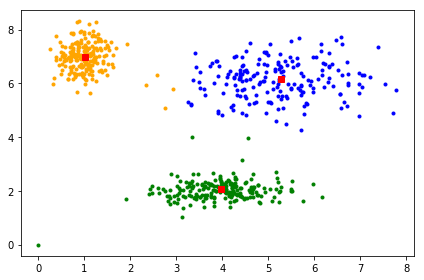

In [5]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Set up the loop and plot
alldata = np.vstack((xpts, ypts))

fpcs = []
ncenters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    alldata, 
    ncenters, 
    2, 
    error=0.005, 
    maxiter=1000, 
    init=None
)

# Store fpc values for later
fpcs.append(fpc)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    plt.plot(xpts[cluster_membership == j],
             ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs')

#plt.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
#plt.axis('off')

plt.tight_layout()

## General Functions

In [6]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [7]:
def plot_data(som, full_complet_data, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    data = full_complet_data.values
    group_0_10 = data[:30]
    group_10_19 = data[30:60]
    group_20_29 = data[60:90]
    group_30_39 = data[90:120]
    group_40_49 = data[120:150]
    group_over_50 = data[150:]

    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.plot(coord[:, 1], coord[:, 0], marker='.', linestyle='--', color='r')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.plot(coord[:, 1], coord[:, 0], c='black', linestyle='--',
                                marker='.')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.plot(coord[:, 1], coord[:, 0], c='brown',
                                marker='.', linestyle='--',)
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.plot(coord[:, 1], coord[:, 0], c='blue',
                                marker='.', linestyle='--',)
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.plot(coord[:, 1], coord[:, 0], c='green',
                                marker='.', linestyle='--',)
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.plot(coord[:, 1], coord[:, 0], c='orange', marker='.', linestyle='--',)

In [8]:
def plot_dots(som, full_complet_data, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    data = full_complet_data.values
    group_0_10 = data[:30]
    group_10_19 = data[30:60]
    group_20_29 = data[60:90]
    group_30_39 = data[90:120]
    group_40_49 = data[120:150]
    group_over_50 = data[150:]
    
    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='Gray',
                                marker='o', cmap='jet', linewidths=3, edgecolor='Gray')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='black',
                                marker='o', cmap='jet', linewidths=3, edgecolor='black')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='brown',
                                marker='o', cmap='jet', linewidths=3, edgecolor='brown')
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='blue',
                                marker='o', cmap='jet', linewidths=3, edgecolor='blue')
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='green',
                                marker='o', cmap='jet', linewidths=3, edgecolor='green')
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='red',
                                marker='o', cmap='jet', linewidths=3, edgecolor='red')

In [9]:
def get_prediction_vs_real(som, data, complet_data, cmeans_fc, num_classes):
    from skfuzzy.cluster import cmeans_predict
    
    normalized_data = som._normalizer.normalize_by(som.data_raw, data)
    normalized_data = normalized_data.T

    # Predict new cluster membership with `cmeans_predict` as well as `cntr`
    u, u0, d, jm, p, fpc = cmeans_predict(normalized_data, cmeans_fc, 2, 
                                          error=0.005, maxiter=1000)
    # Plot the classified uniform data. Note for visualization the maximum
    # membership value has been taken at each point (i.e. these are hardened,
    # not fuzzy results visualized) but the full fuzzy result is the output
    # from cmeans_predict.
    # cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization
    # fig3, ax3 = plt.subplots()
    # ax3.set_title('Random points classifed according to known centers')
    # for j in range(num_classes):
    #     ax3.plot(normalized_data[cluster_membership == j, 0],
    #              normalized_data[cluster_membership == j, 1], 'o',
    #              label='series ' + str(j))
    # ax3.legend()
    # plt.show()
    complet_data['Cluster'] = np.argmax(u, axis=0)
    return complet_data

def get_false_positives(conf_matrix, num_classes=6):
    false_positive = []
    for i in range(num_classes):
        false_positive.append(sum(conf_matrix[:,i]) - conf_matrix[i,i])
    return false_positive

def get_false_negatives(conf_matrix, num_classes=6):
    false_negative = []
    for i in range(num_classes):
        false_negative.append(sum(conf_matrix[i,:]) - conf_matrix[i,i])
    return false_negative

def generate_confusion_matrix(complet_data, classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    from sklearn import metrics
    conf_matrix = metrics.confusion_matrix(complet_data['Age'], complet_data['Cluster'])
    plt.figure()
    plot_confusion_matrix(conf_matrix, classes=classes_name,
                          title='Confusion matrix, without normalization')
    return conf_matrix

def get_metrics(conf_matrix, num_classes=6):
    true_positives = np.diag(conf_matrix)
    false_positives = get_false_positives(conf_matrix, num_classes)
    false_negatives = get_false_negatives(conf_matrix, num_classes)

    true_positives = sum(true_positives)
    false_positives = sum(false_positives)
    false_negatives = sum(false_negatives)

    print()
    print('true_positives total:', true_positives)
    print('false_positives total:', false_positives)
    print('false_negatives total:', false_negatives)
    
def get_precision_recal_f1_score_and_accuracy(complet_data):
    precision = metrics.precision_score(complet_data['Age'], complet_data['Cluster'], average='macro')
    recal = metrics.recall_score(complet_data['Age'], complet_data['Cluster'], average='micro')
    f1_score = metrics.f1_score(complet_data['Age'], complet_data['Cluster'], average='weighted')
    accuracy = metrics.accuracy_score(complet_data['Age'], complet_data['Cluster'])
    
    print()
    print('Precision: ', precision)
    print('Recal: ', recal)
    print('F1-Score: ', f1_score)
    print('Accuracy: ', accuracy)

In [10]:
from sklearn import metrics

def evaluate_som(som, data, complet_data, cmeans_fc, n_clusters=6, 
                 classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    # define which cluster number represents each Age group.
    complet_data = get_prediction_vs_real(som, data, complet_data, cmeans_fc, 
                                          num_classes=len(classes_name))

    # Plot confusion matrix
    conf_matrix = generate_confusion_matrix(complet_data, classes_name)
    
    # Show true positives, false negatives, false positives
    get_metrics(conf_matrix, num_classes=len(classes_name))
    
    # Show metrics
    get_precision_recal_f1_score_and_accuracy(complet_data)
    return complet_data

In [11]:
def analyse_cluster_per_group(complet_data):
    complet_data[complet_data.Age.values == complet_data.Cluster.values]
    complet_data['Cluster'].value_counts()
    return complet_data.groupby('Age')['Cluster'].value_counts()

In [12]:
def evaluate_group_1_and_3(som, complet_data, test_dataframe, group_1_and_3, 
                           group_1_and_3_test, cmeans_fc):
    print('-------------------------------------------------------------------------------------------------')
    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)


    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 4].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 5].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
    new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0

    new_test_dataframe.loc[new_test_dataframe['Age'] == 0, 'Age'] = 1
    new_test_dataframe.loc[new_test_dataframe['Age'] == 2, 'Age'] = 0

    evaluate_som(som, group_1_and_3, new_complet_data, cmeans_fc, 
                 classes_name=['0~10', '20~29'])
    
    print('-------------------TEST DATASET EVALUATION----------------------')
    complet_data = evaluate_som(som, group_1_and_3_test, new_test_dataframe, cmeans_fc, 
                                classes_name=['0~10', '20~29']) 
    
    analyse_cluster_per_group(complet_data)

In [13]:
def evaluate_group_1_and_3_inverse(som, complet_data, test_dataframe, group_1_and_3, 
                                   group_1_and_3_test, cmeans_fc):
    print('-------------------------------------------------------------------------------------------------')

    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)


    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 4].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 5].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
    new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1

    new_test_dataframe.loc[new_test_dataframe['Age'] == 0, 'Age'] = 0
    new_test_dataframe.loc[new_test_dataframe['Age'] == 2, 'Age'] = 1

    evaluate_som(som, group_1_and_3, new_complet_data, cmeans_fc, 
                 classes_name=['0~10', '20~29'])

    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(som, group_1_and_3_test, new_test_dataframe, cmeans_fc, 
                 classes_name=['0~10', '20~29'])

In [14]:
def evaluate_group_5_and_6(som, complet_data, test_dataframe, group_5_and_6, 
                           group_5_and_6_test, cmeans_fc):
    print('-------------------------------------------------------------------------------------------------')
    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 2].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 0].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
    new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0

    new_test_dataframe.loc[new_test_dataframe['Age'] == 5, 'Age'] = 1
    new_test_dataframe.loc[new_test_dataframe['Age'] == 4, 'Age'] = 0

    evaluate_som(som, group_5_and_6, new_complet_data, cmeans_fc, 
                 classes_name=['40~49', '>50'])
    print('-------------------TEST DATASET EVALUATION----------------------')
    complet_data = evaluate_som(som, group_5_and_6_test, new_test_dataframe, cmeans_fc, 
                                classes_name=['40~49', '>50'])
    analyse_cluster_per_group(complet_data)

In [15]:
def evaluate_group_5_and_6_inverse(som, complet_data, test_dataframe, group_5_and_6, 
                                   group_5_and_6_test, cmeans_fc):
    print('-------------------------------------------------------------------------------------------------')
    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 2].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 0].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
    new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1

    new_test_dataframe.loc[new_test_dataframe['Age'] == 5, 'Age'] = 0
    new_test_dataframe.loc[new_test_dataframe['Age'] == 4, 'Age'] = 1

    evaluate_som(som, group_5_and_6, new_complet_data, cmeans_fc, 
                 classes_name=['40~49', '>50'])

    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(som, group_5_and_6_test, new_test_dataframe, cmeans_fc,
                 classes_name=['40~49', '>50'])

## SOM + FCMEANS

## Set up  general data information

### Import the data

In [16]:
all_features = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
data_location = '/home/sarai/Documents/UPE/tcc/hybrid-approach/5_gait_symmetry_ratios_and_2_kinematic_features_from_180_samples2.csv'

In [17]:
mapsize = [50,50]
data_c = pd.read_csv(data_location)

complet_train_data = data_c.copy()
complet_train_data = complet_train_data.drop(complet_train_data.index[25:30])
complet_train_data = complet_train_data.drop(complet_train_data.index[55:60])
complet_train_data = complet_train_data.drop(complet_train_data.index[85:90])
complet_train_data = complet_train_data.drop(complet_train_data.index[115:120])
complet_train_data = complet_train_data.drop(complet_train_data.index[145:150])
complet_train_data = complet_train_data.drop(complet_train_data.index[175:])

test_dataframe = data_c.copy()
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

In [26]:
def generate_experiment(full_complet_data, combinations_to_be_analysed, complet_train_data, 
                        test_dataframe, iterations=2000, groups_to_classify=0):
    from skfuzzy.cluster import cmeans
    from sompy.visualization.hitmap import HitMapView

    drop = set(all_features) - set(combinations_to_be_analysed)
    drop = list(drop)
    
    test_dataframe = test_dataframe.drop(drop, axis=1)
    full_complet_data = full_complet_data.drop(drop, axis=1)
    
    data = full_complet_data
    data = data.values
    
    group_0_10 = data[:25]
    group_10_19 = data[30:55]
    group_20_29 = data[60:85]
    group_30_39 = data[90:115]
    group_40_49 = data[120:145]
    group_over_50 = data[150:175]

    group_0_10_test = data[25:30]
    group_10_19_test = data[55:60]
    group_20_29_test = data[85:90]
    group_30_39_test = data[115:120]
    group_40_49_test = data[145:150]
    group_over_50_test = data[175:]
    
    if groups_to_classify == 0:
        # Group 1 and 3
        group_1_and_3 = np.concatenate((group_0_10, group_20_29))
        group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))
        data = group_1_and_3
        clusters_number = 2
    elif groups_to_classify == 1:
        # Groupo 5 and 6
        group_5_and_6 = np.concatenate((group_40_49, group_over_50))
        group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))
        data = group_5_and_6
        clusters_number = 2
    else:
        data = data
        clusters_number = 6

    som = sompy.SOMFactory.build(
        data, mapsize, mask=None, mapshape='planar', 
        normalization='var', initialization='pca', 
        neighborhood='gaussian', training='batch', 
        name='sompy', lattice='hexa')
    som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=iterations)
    
    c_means_input = som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    c_means_input = c_means_input.transpose()
    cmeans_fc, u_orig, _, _, _, _, pc = cmeans(
        c_means_input,  c=clusters_number, m=1.25, error=1e-6, maxiter=10000, seed=1000)
    
    print("The fuzzy partition coefficient (FPC) {}".format(pc))
    
    # Visualization Plots
    vis  = sompy.mapview.View2DPacked(5, 5, 'Cluster',text_size=12)  
    som.cluster_labels = u_orig.argmax(axis=0)
    vis.show(som, what='cluster')
    
    hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
    a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
    plt.show()
    
    from sompy.visualization.hitmap import HitMapView
    hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
    a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="jet")
    plt.show()
    
    # Plot Data Projection
    if groups_to_classify == 0:
        # Group 1 and 3
        plot_data(som, full_complet_data, plot2=False, plot4=False, plot5=False, plot6=False)
    elif groups_to_classify == 1:
        # Group 5 and 6
        plot_data(som, full_complet_data, plot1=False, plot2=False, plot3=False, plot4=False)
    else:
        plot_data(som, full_complet_data)
        
    # Patterns learned by the neural network which are used to determine 
    # the winning neuron of each training instance

    som.component_names = combinations_to_be_analysed
    v = sompy.mapview.View2D(10, 10, "", text_size=9)  
    v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

    # Evaluate groups
    if groups_to_classify == 0:
        evaluate_group_1_and_3(som, complet_train_data, test_dataframe, 
                               group_1_and_3, group_1_and_3_test, cmeans_fc)
        evaluate_group_1_and_3_inverse(som, complet_train_data, test_dataframe, 
                                       group_1_and_3, group_1_and_3_test, cmeans_fc)
    elif groups_to_classify == 1:
        evaluate_group_5_and_6(som, complet_train_data, test_dataframe, 
                               group_5_and_6, group_5_and_6_test, cmeans_fc)
        evaluate_group_5_and_6_inverse(som, complet_train_data, test_dataframe, 
                                       group_5_and_6, group_5_and_6_test, cmeans_fc)
    else:
        evaluate_som(som, data, complet_data, cmeans_fc)

## All combinations

- ACT[s] Cadence Rs   - OK
- ACT[s] Cadence RssL   - OK
- ACT[s] Cadence RssR
- ACT[s] Cadence Rst   - OK
- ACT[s] Cadence Rsw   - OK
- ACT[s] Rs RssL      - OK
- ACT[s] Rs RssR
- ACT[s] Rs Rst   - OK
- ACT[s] Rs Rsw
- ACT[s] RssL RssR   - OK
- ACT[s] RssL Rst
- ACT[s] RssL Rsw
- ACT[s] RssR Rst   - OK
- ACT[s] RssR Rsw
- ACT[s] Rst Rsw
- Cadence Rs RssL   - OK
- Cadence Rs RssR
- Cadence Rs Rst   -    OK
- Cadence Rs Rsw
- Cadence RssL RssR
- Cadence RssL Rst    - OK
- Cadence RssL Rsw   -OK
- Cadence RssR Rst
- Cadence RssR Rsw
- Cadence Rst Rsw   - OK
- Rs RssL RssR
- Rs RssL Rst     -  OK
- Rs RssL Rsw
- Rs RssR Rst  - OK
- Rs RssR Rsw  - OK
- Rs Rst Rsw
- RssL RssR Rst
- RssL RssR Rsw
- RssL Rst Rsw   - OK
- RssR Rst Rsw   - OK 

## [ACT[s] Cadence Rs] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [17]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rs']

The fuzzy partition coefficient (FPC) 0.9602887481586678


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


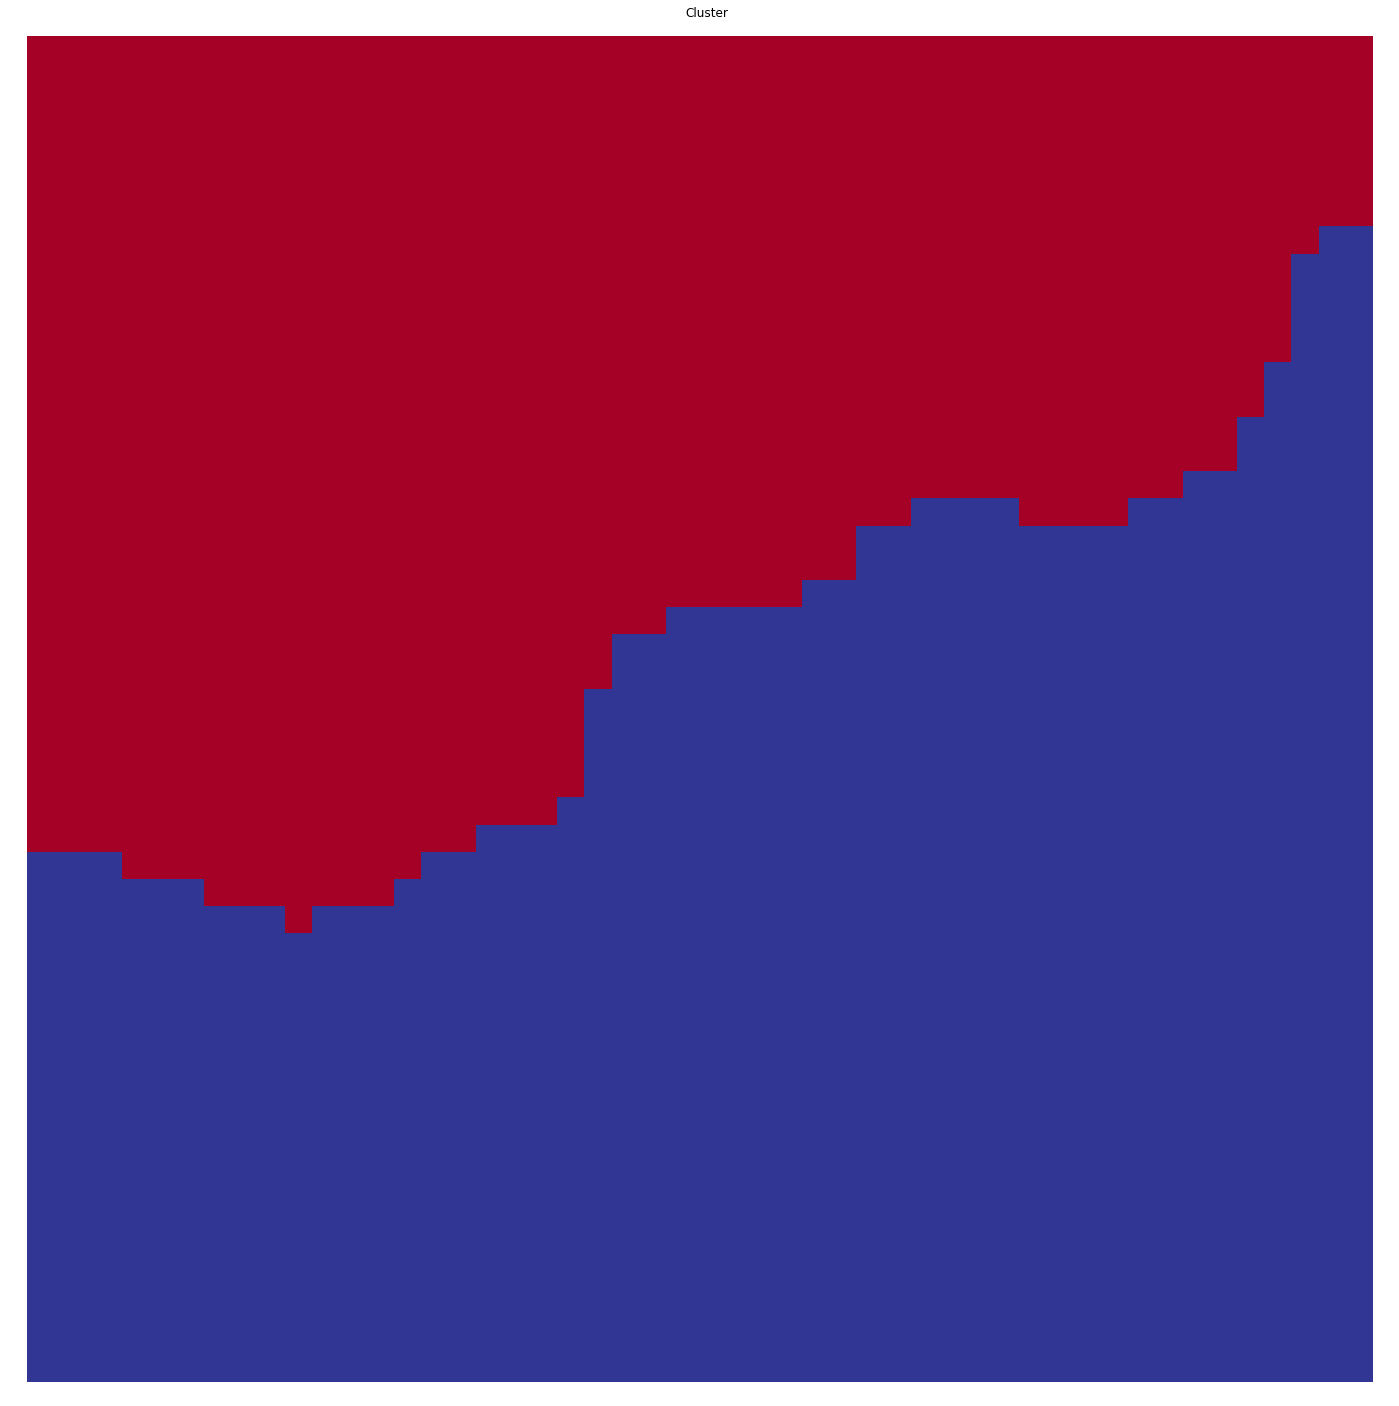

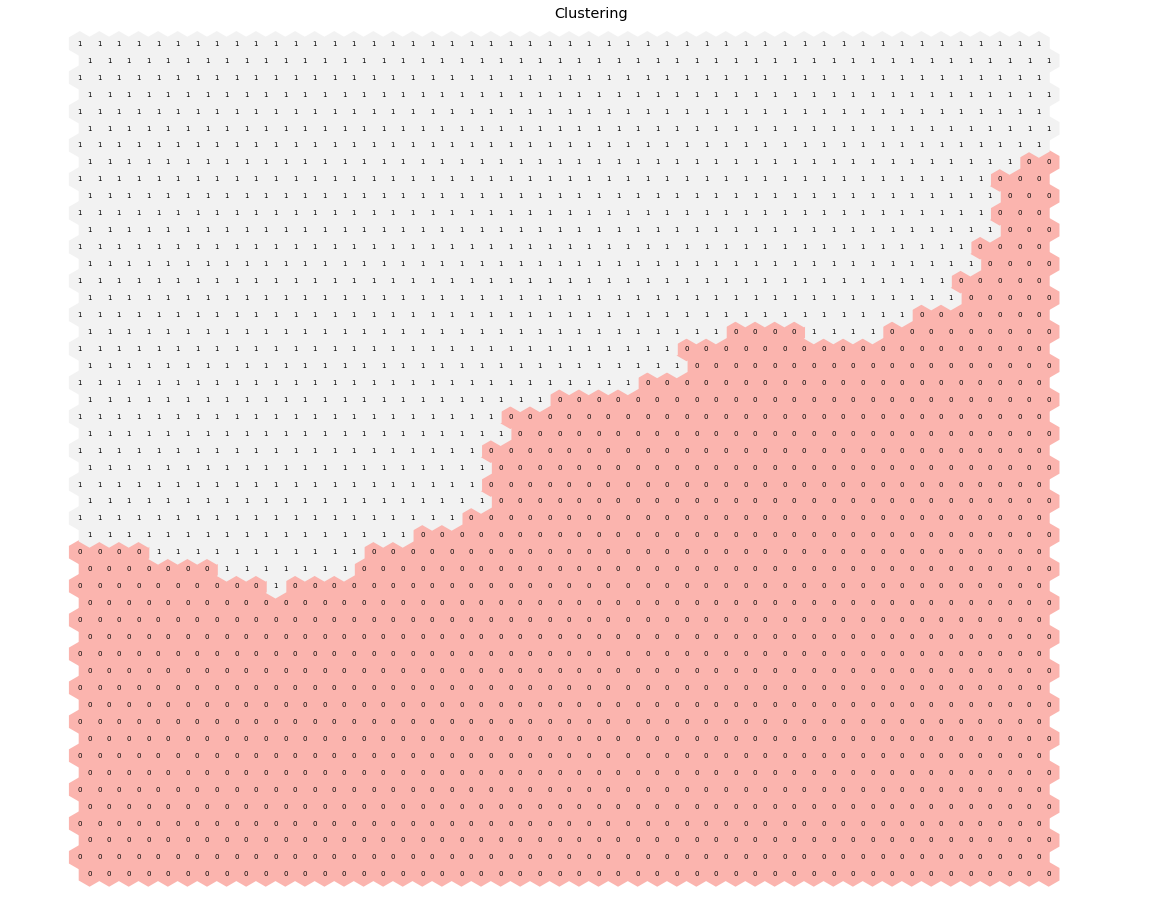

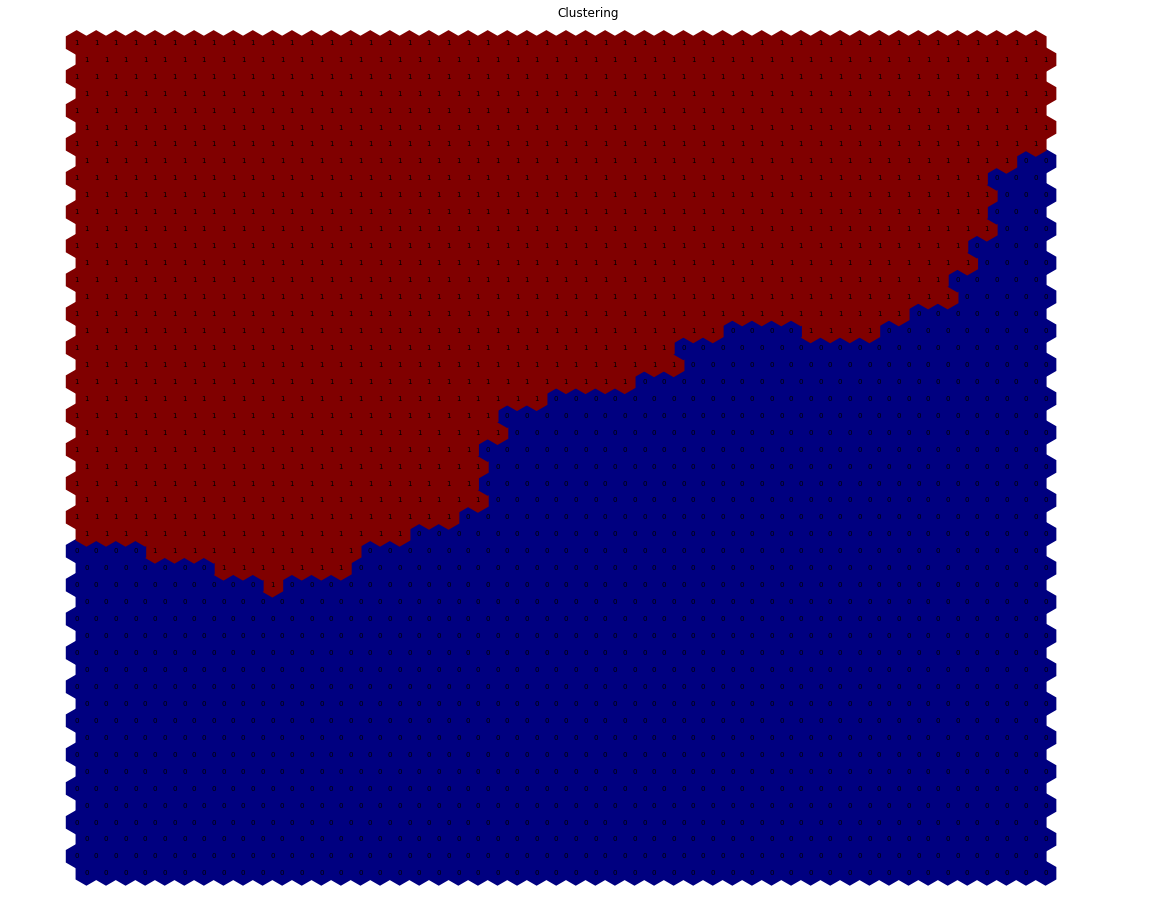

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 0 25]
 [ 3 22]]

true_positives total: 22
false_positives total: 28
false_negatives total: 28

Precision:  0.23404255319148937
Recal:  0.44
F1-Score:  0.3055555555555556
Accuracy:  0.44
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 3 22]
 [ 0 25]]

true_positives total: 28
false_positives total: 22
false_negatives total: 22

Precision:  0.7659574468085106
Recal:  0.56
F1-Score:  0.45436507936507936
Accuracy:  0.56
-------------------TEST DATASET EVALUATION----------------------
Confusion m

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


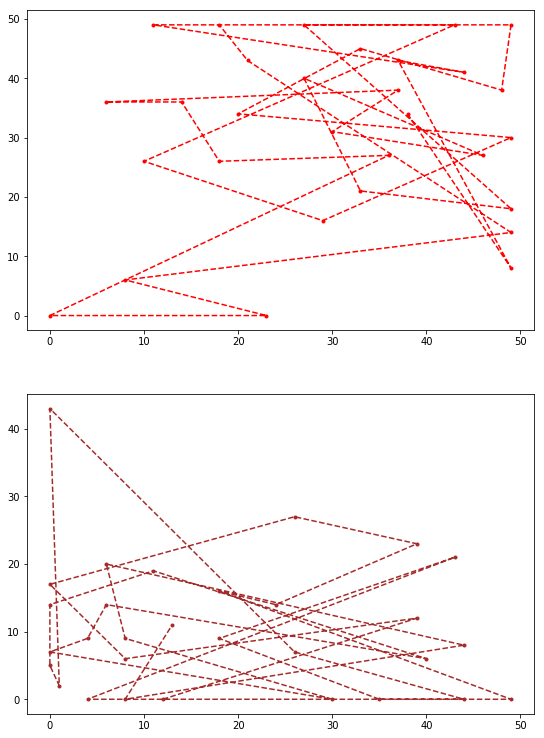

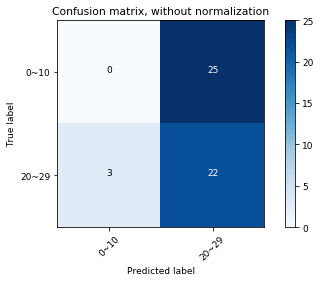

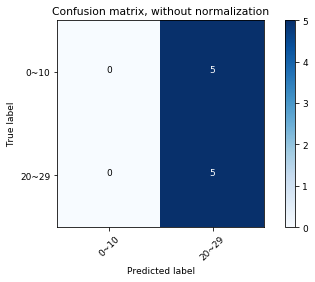

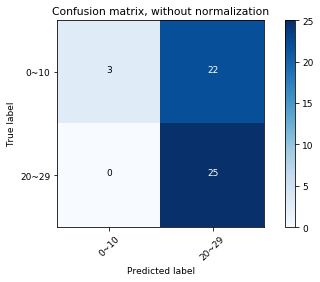

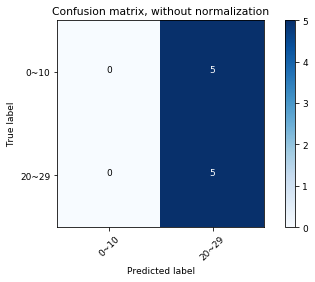

In [18]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Cadence Rs] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [19]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rs']

The fuzzy partition coefficient (FPC) 0.9245810747857722


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


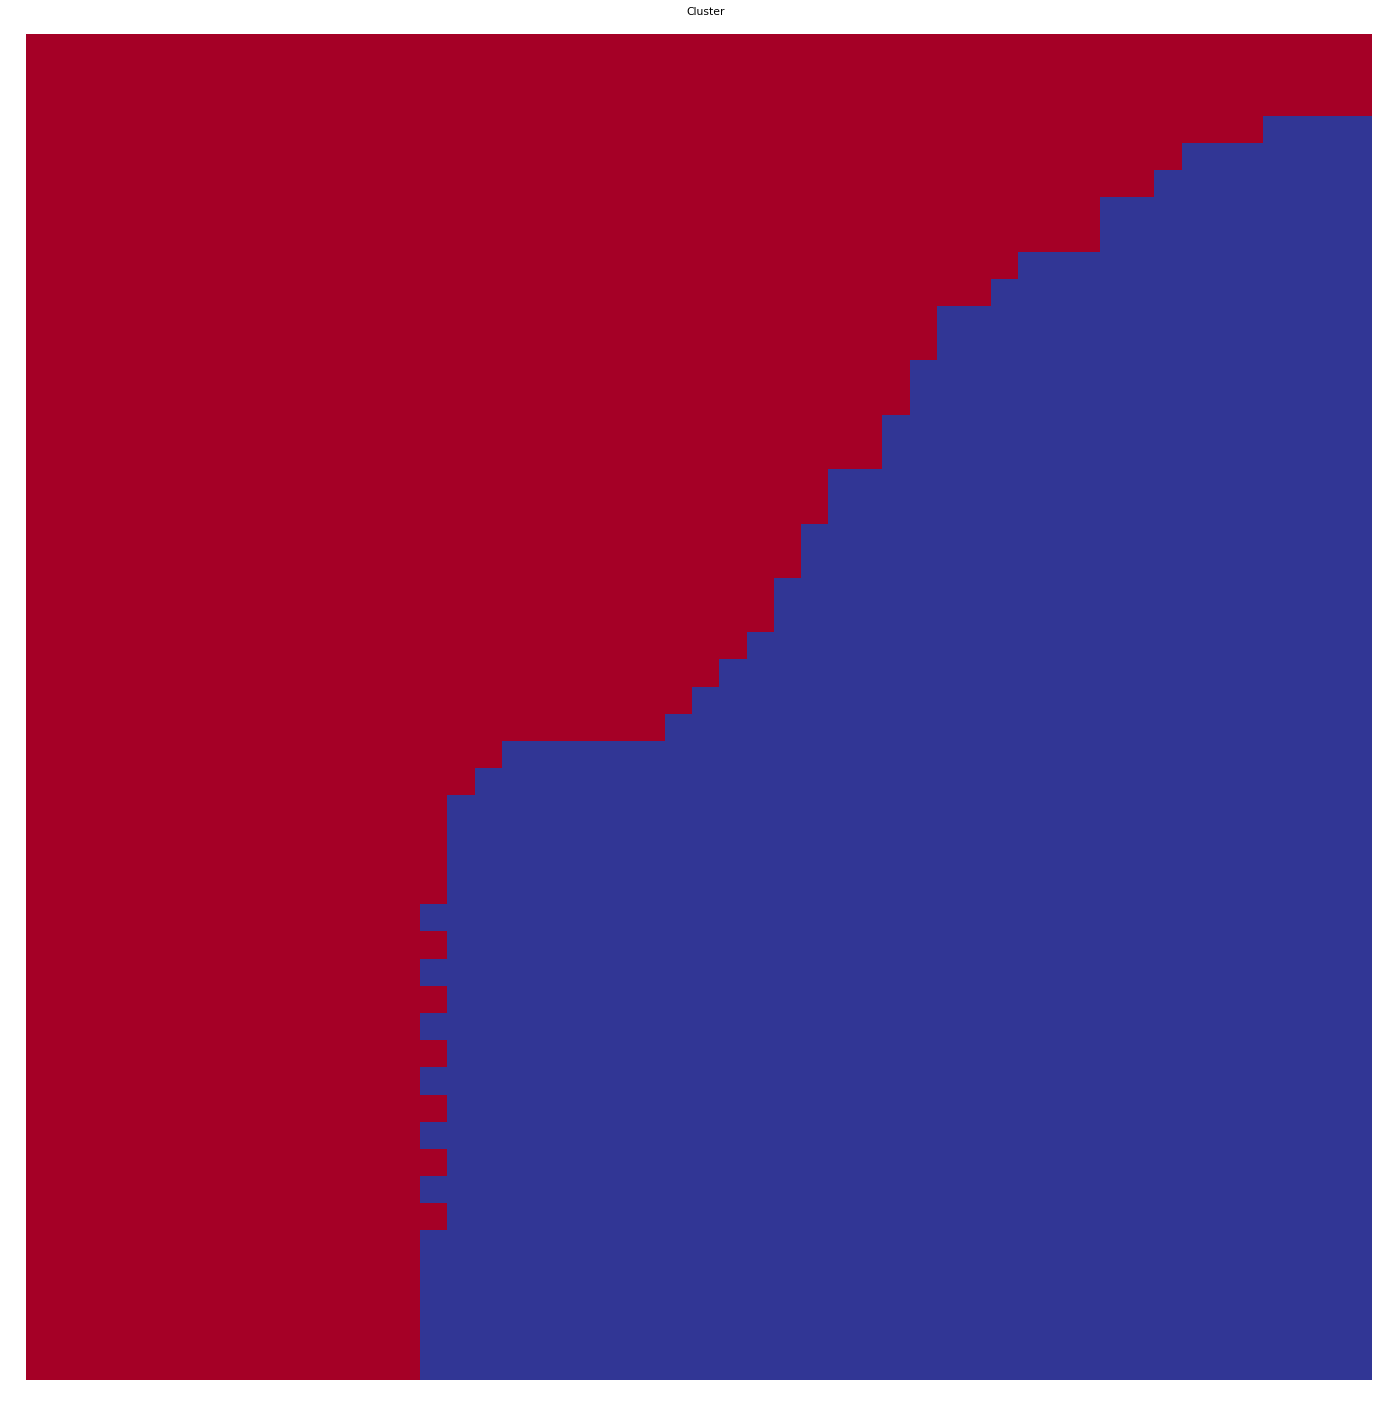

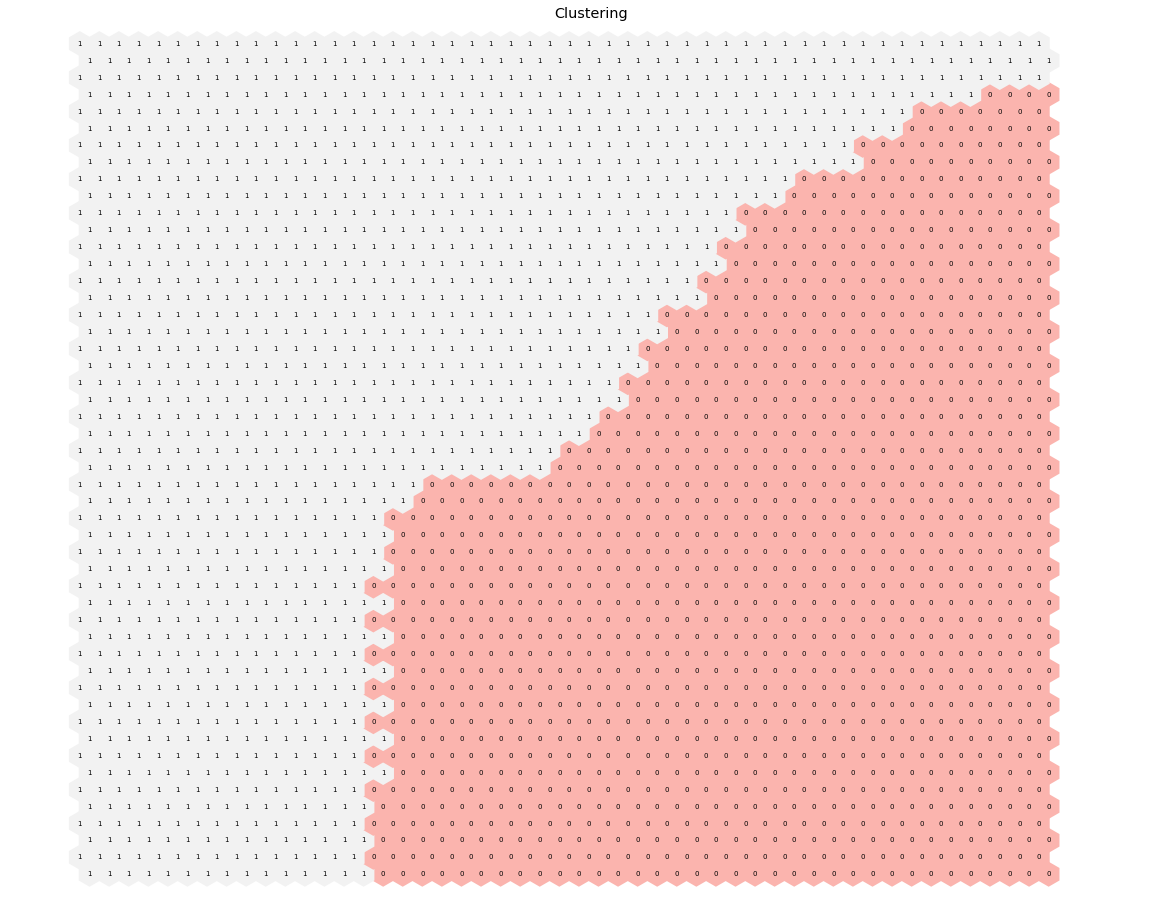

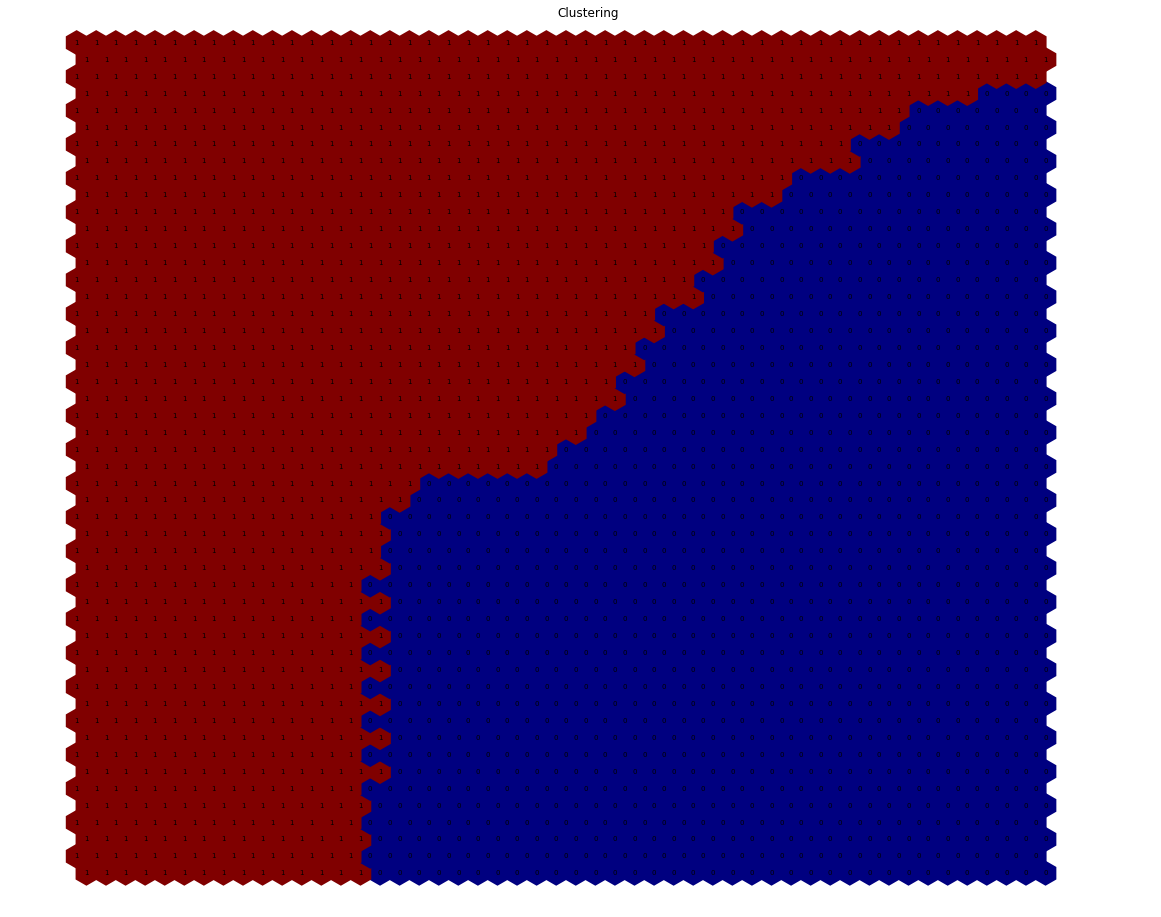

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 2 23]
 [ 0 25]]

true_positives total: 27
false_positives total: 23
false_negatives total: 23

Precision:  0.7604166666666667
Recal:  0.54
F1-Score:  0.4165398274987316
Accuracy:  0.54
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[[ 0 25]
 [ 2 23]]

true_positives total: 23
false_positives total: 27
false_negatives total: 27

Precision:  0.23958333333333334
Recal:  0.46
F1-Score:  0.31506849315068497
Accuracy:  0.46
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


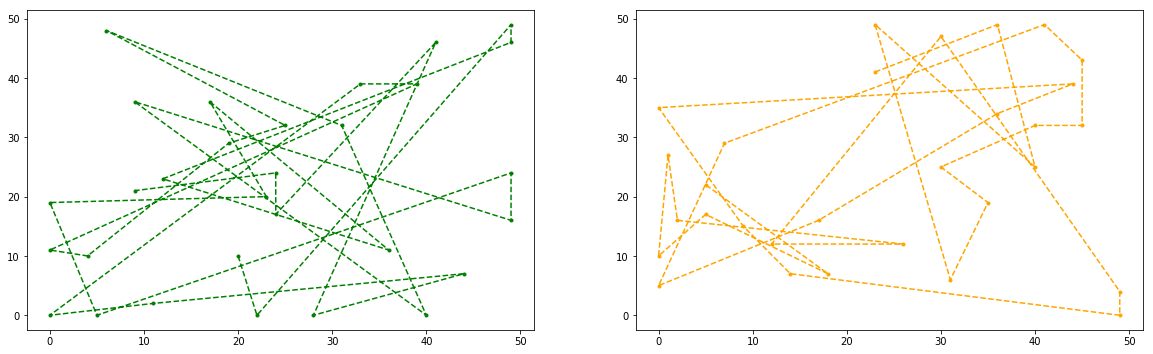

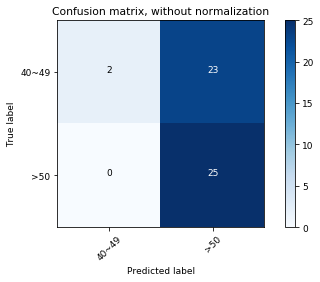

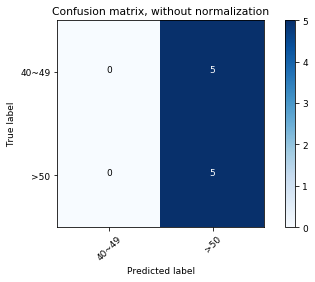

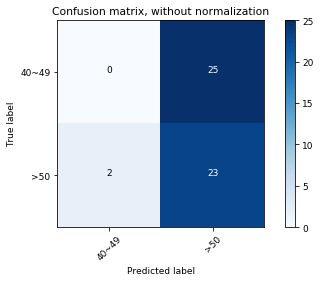

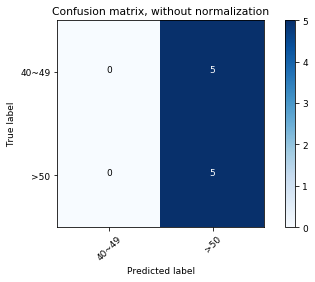

In [20]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, iterations=100, groups_to_classify=1
)

## [Cadence Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [21]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Cadence', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9388859569858928


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


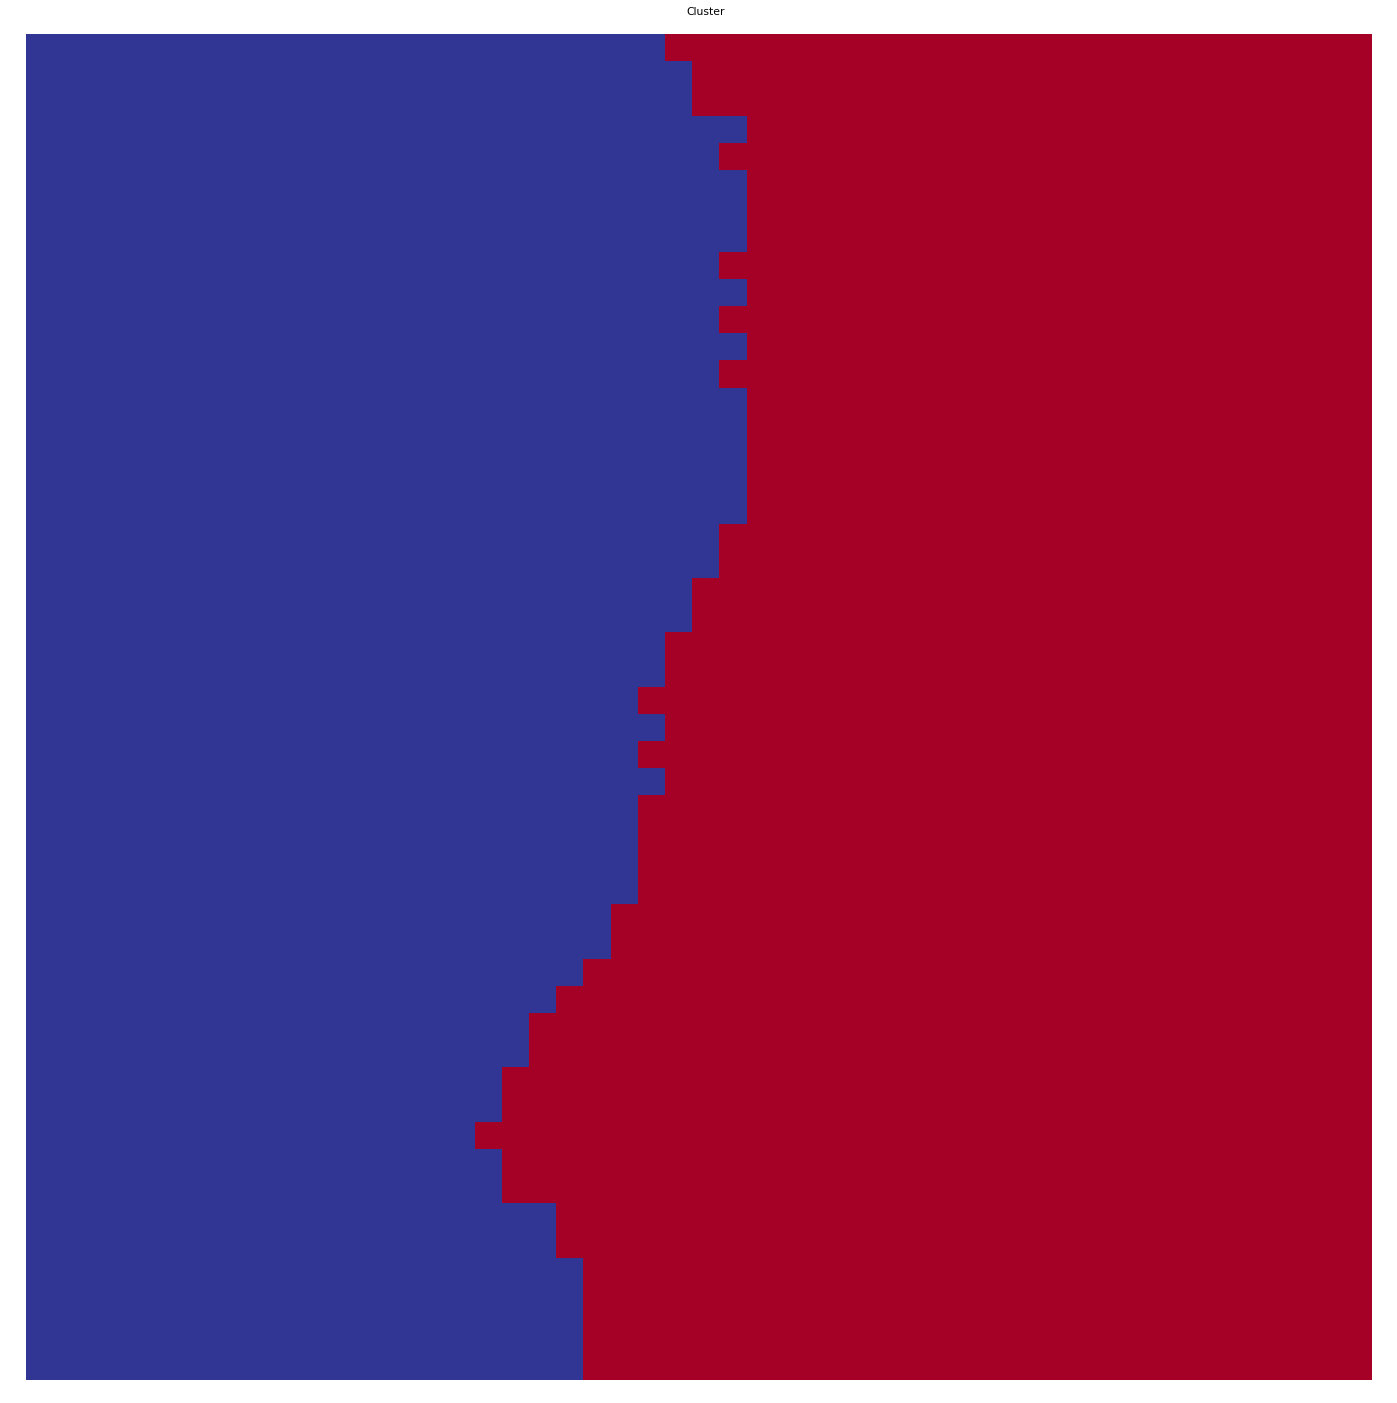

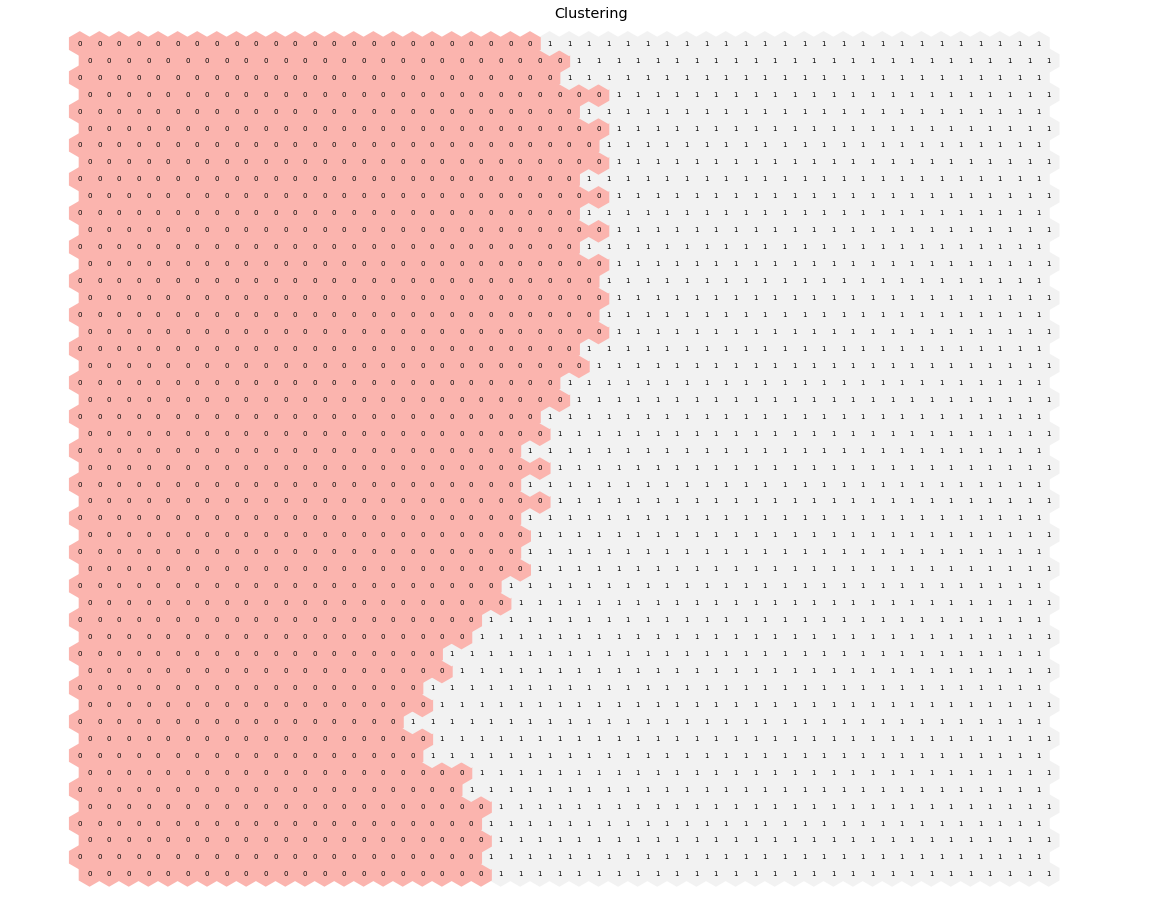

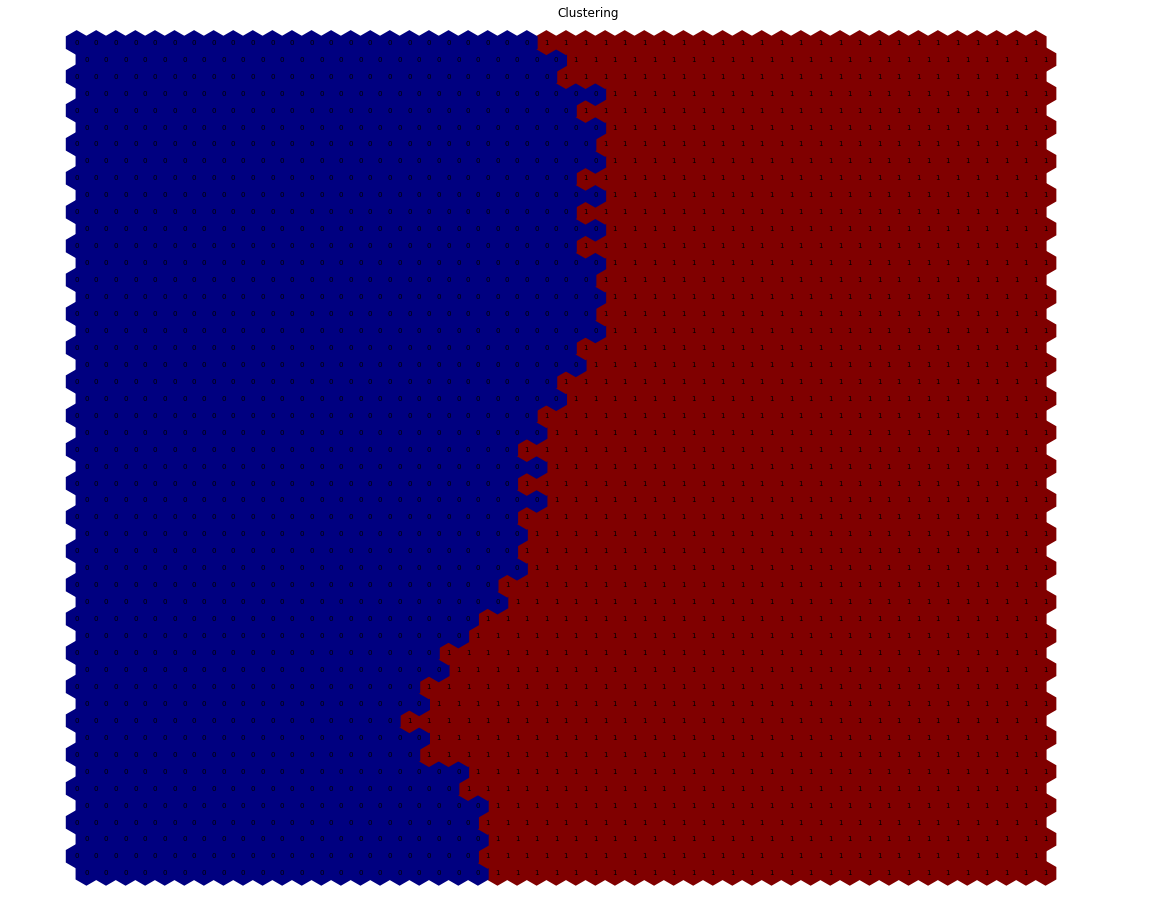

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[25  0]
 [25  0]]

true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.25
Recal:  0.5
F1-Score:  0.33333333333333326
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[25  0]
 [25  0]]

true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.25
Recal:  0.5
F1-Score:  0.33333333333333326
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


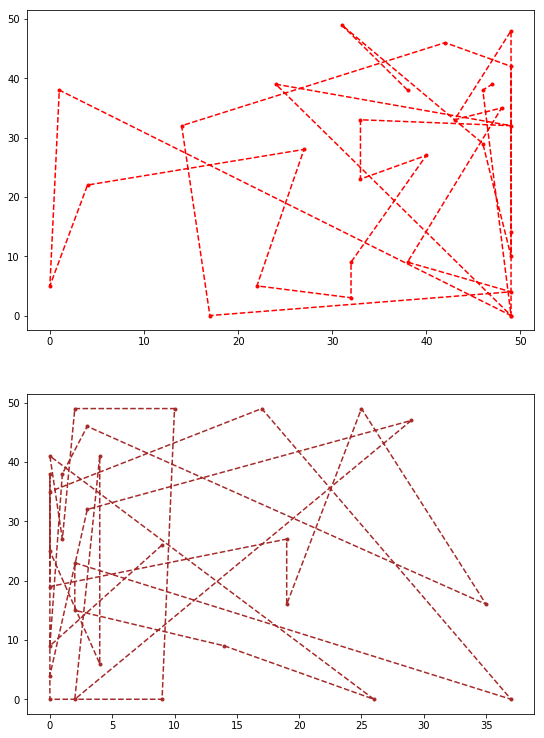

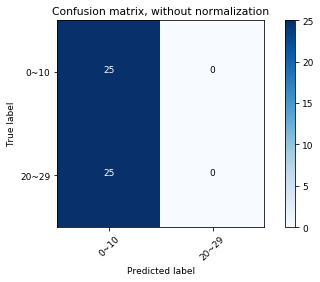

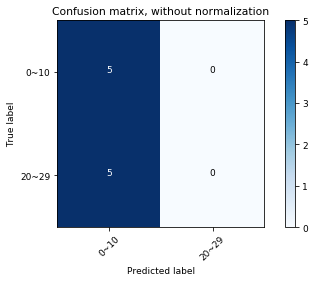

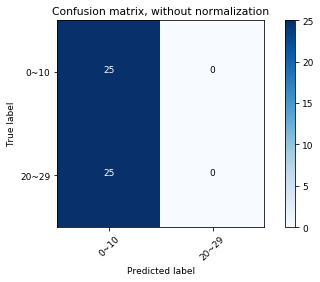

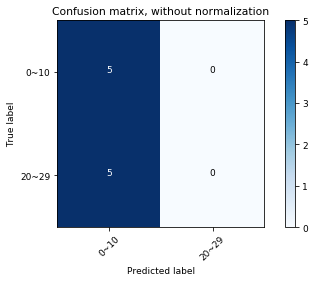

In [22]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Cadence Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [23]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Cadence', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9435487051910397


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


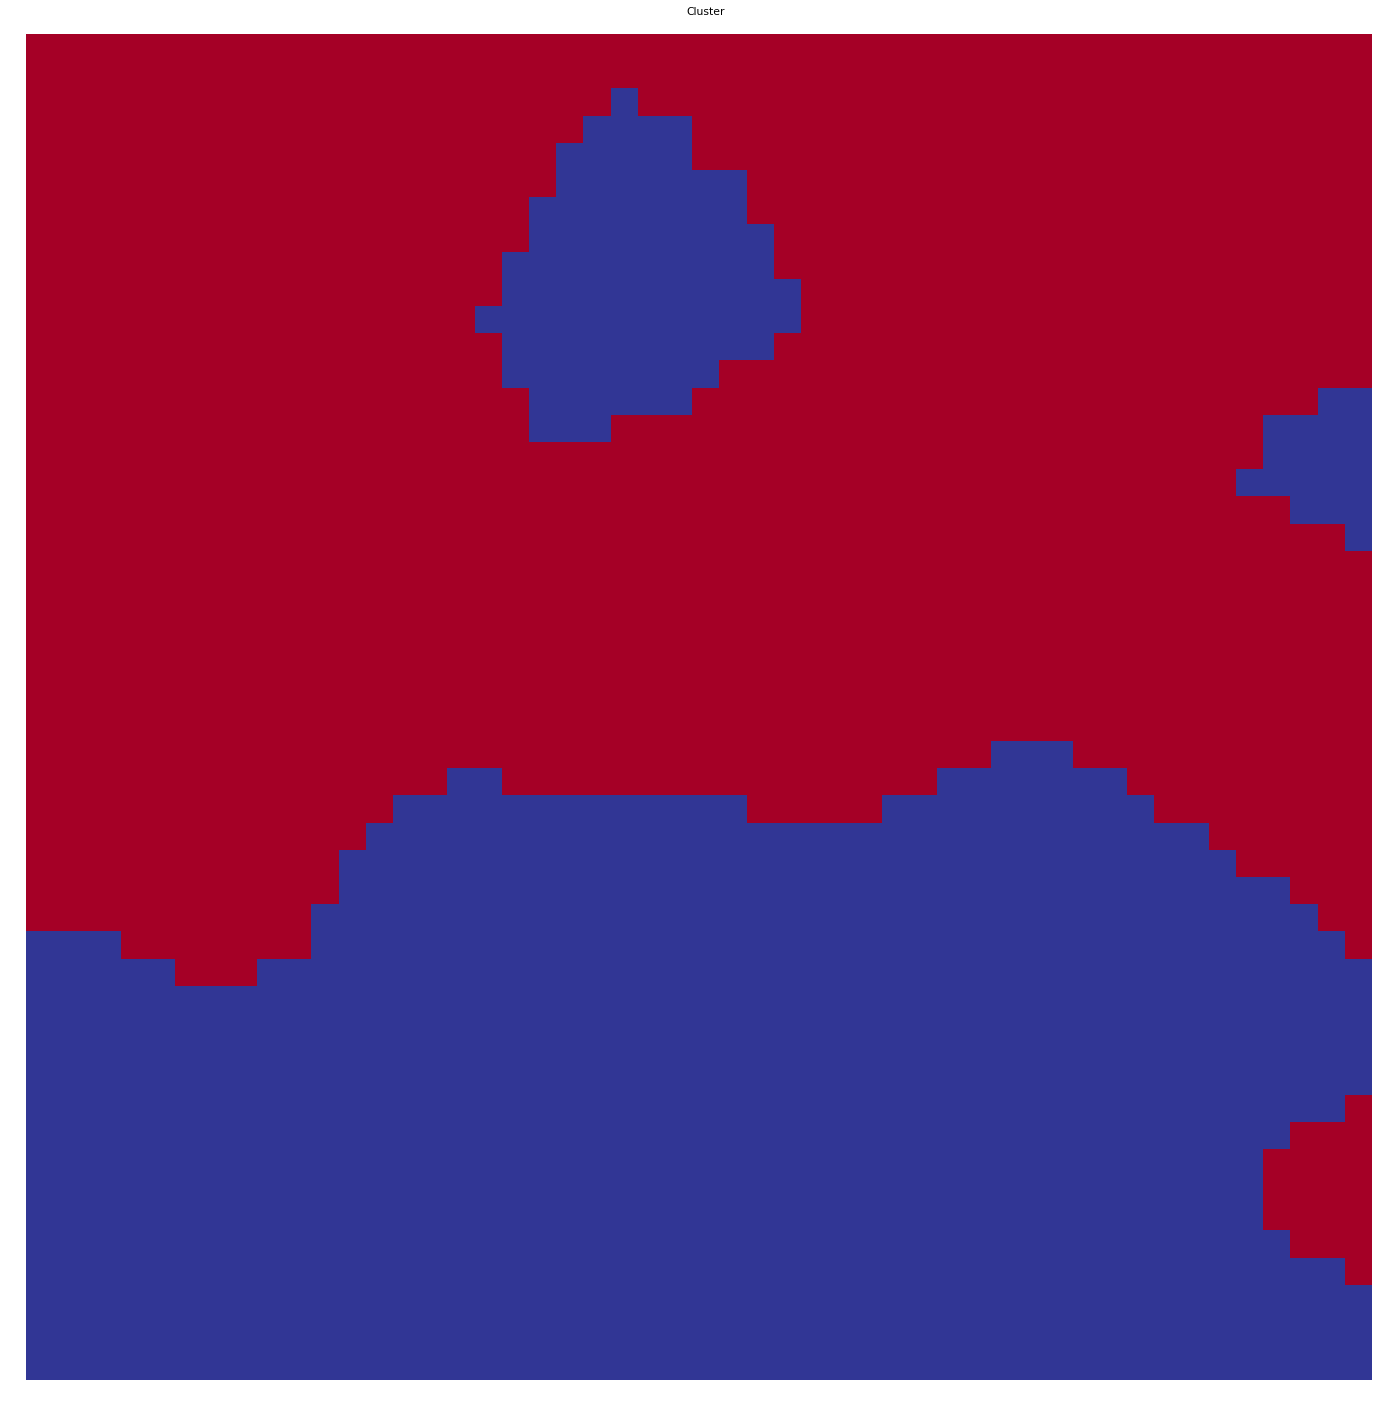

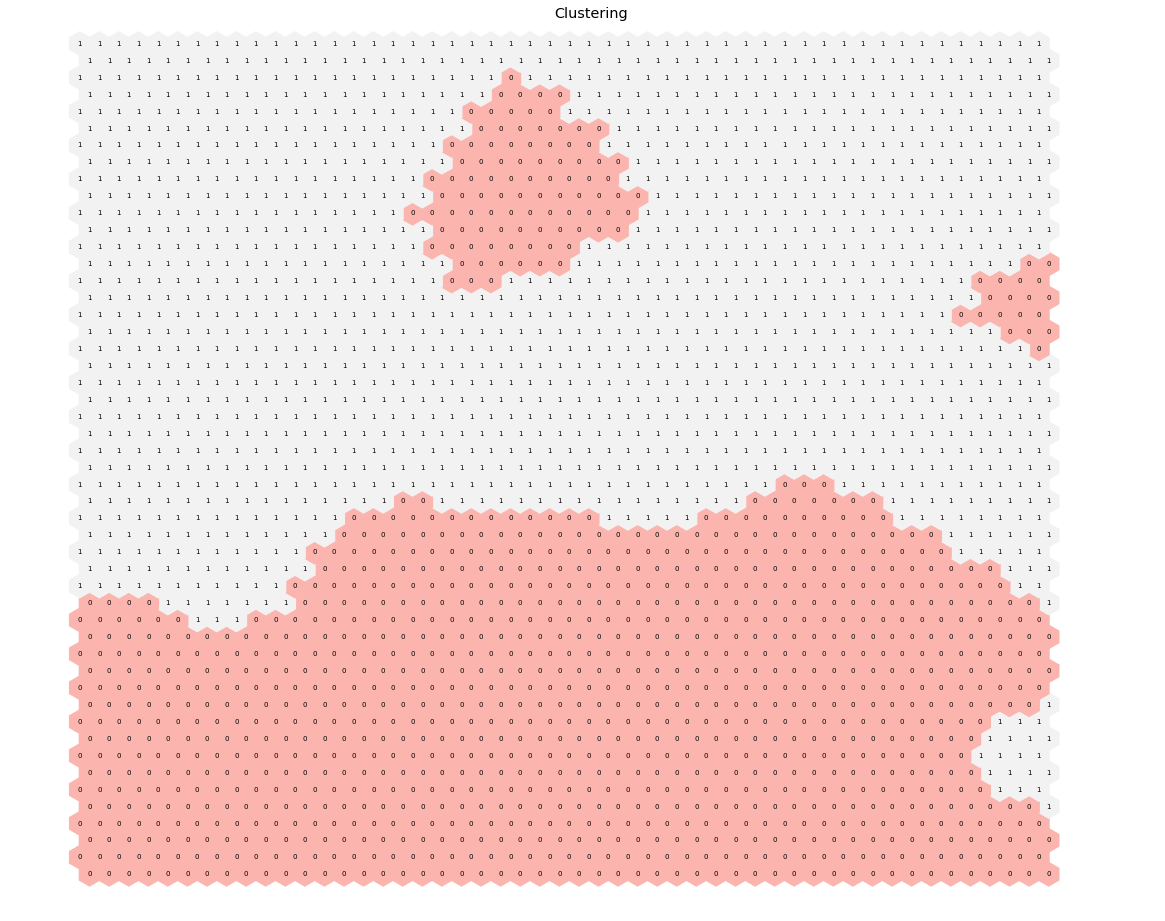

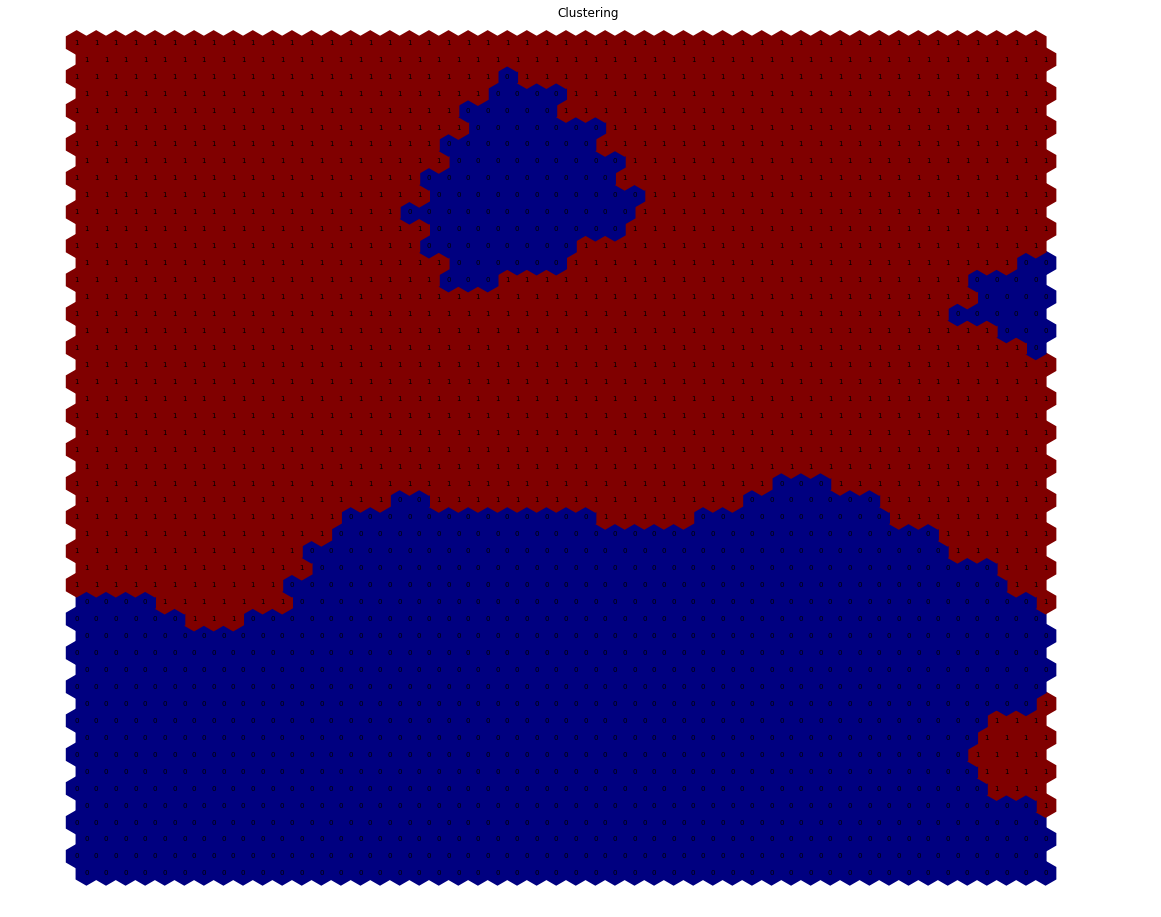

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 1 24]
 [ 0 25]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.7551020408163265
Recal:  0.52
F1-Score:  0.3762993762993764
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 0 25]
 [ 1 24]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.24489795918367346
Recal:  0.48
F1-Score:  0.3243243243243243
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


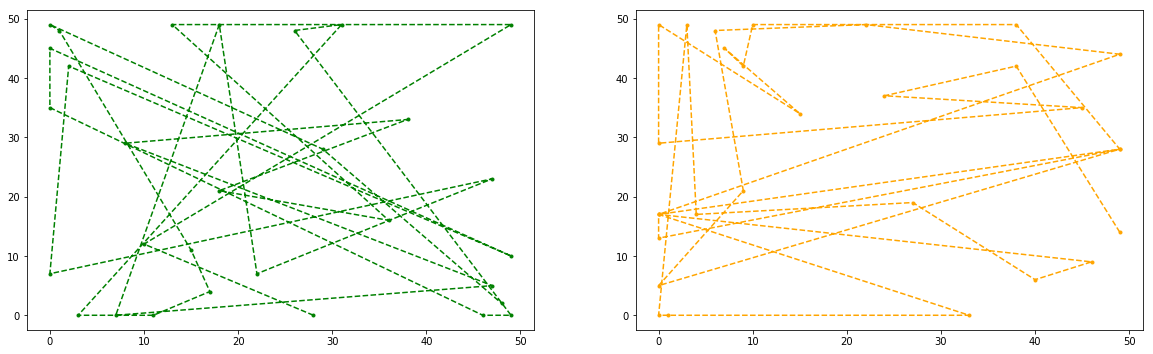

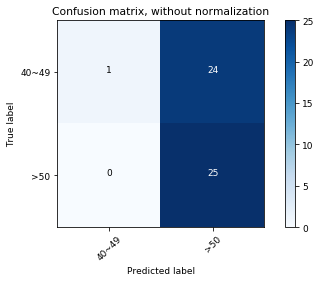

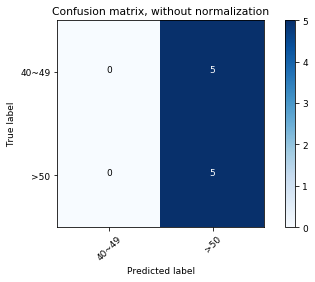

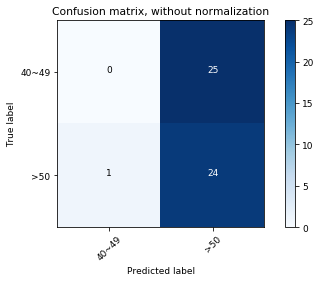

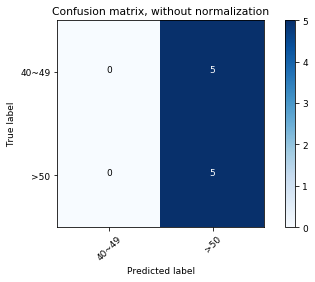

In [24]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [RssR Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [25]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.933426767305444


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


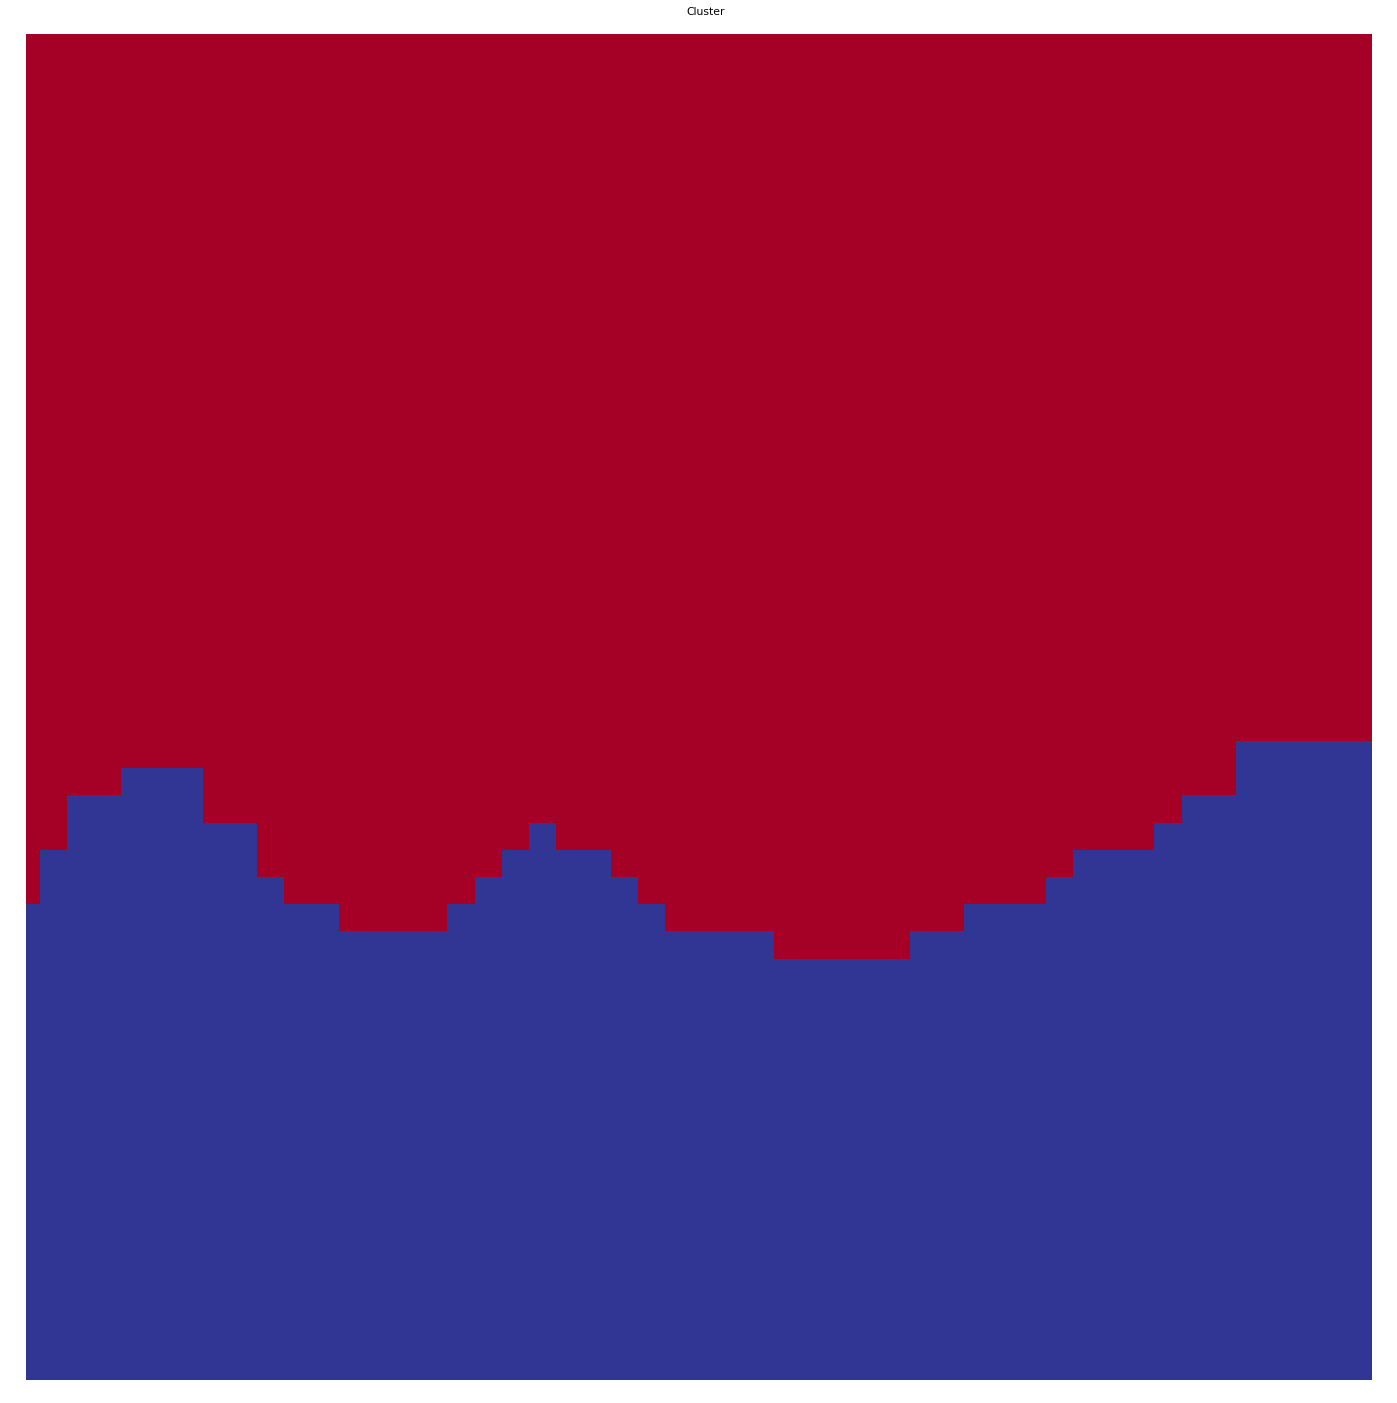

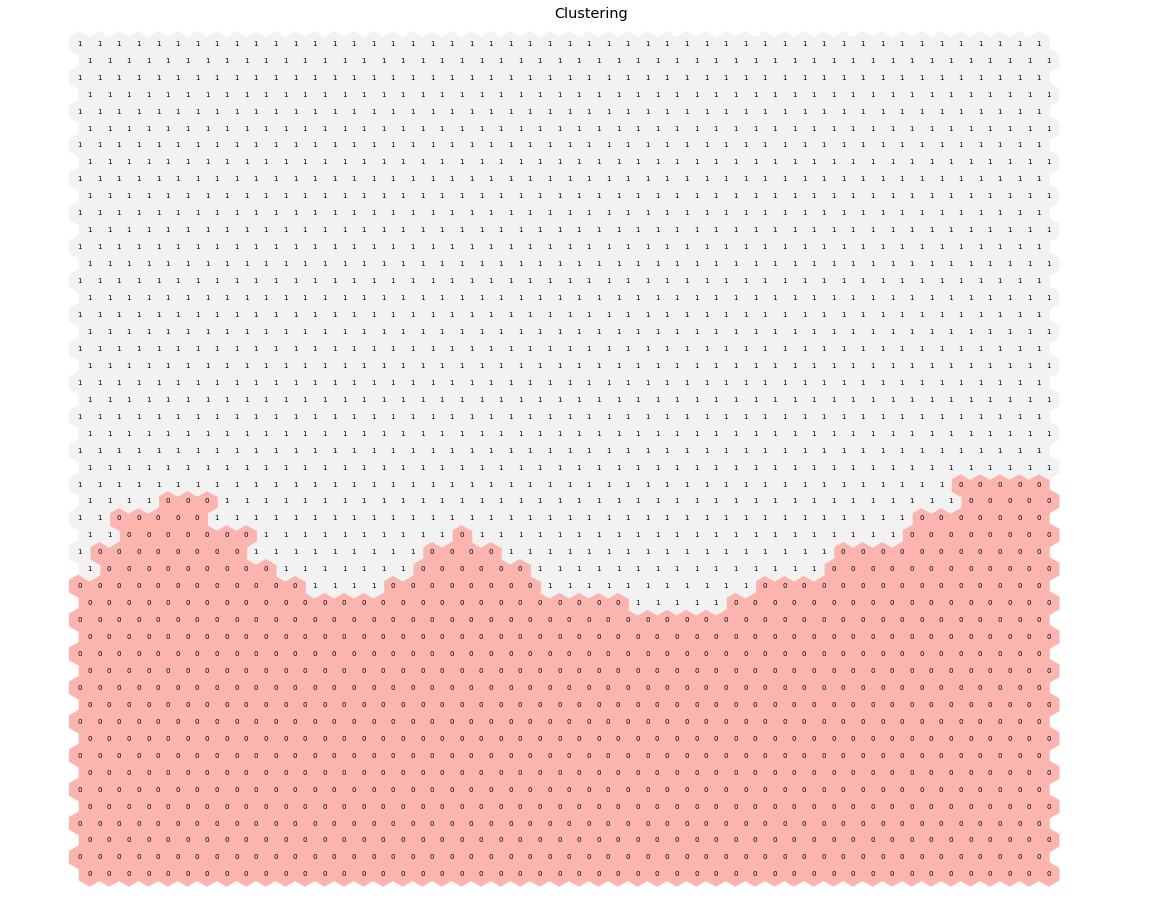

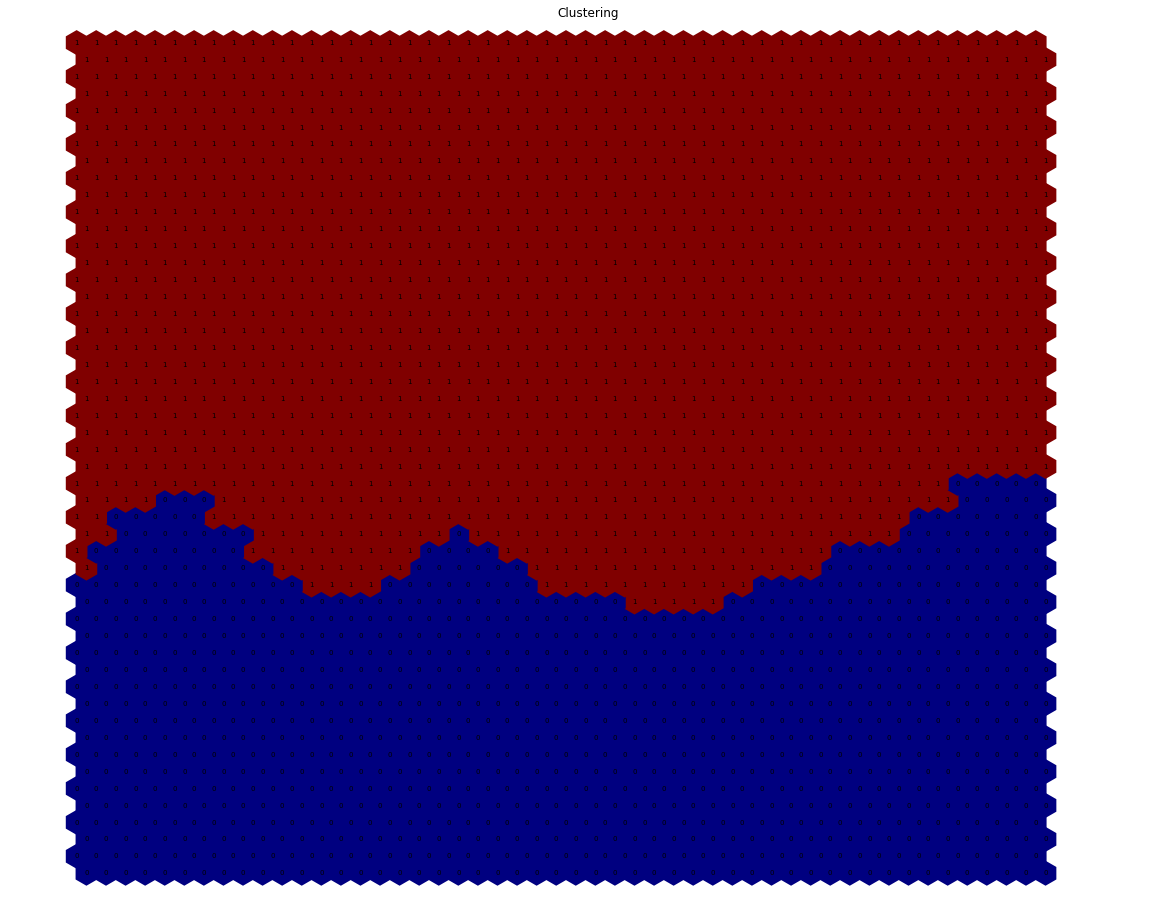

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 9 16]
 [ 5 20]]

true_positives total: 29
false_positives total: 21
false_negatives total: 21

Precision:  0.5992063492063493
Recal:  0.58
F1-Score:  0.5586380832282473
Accuracy:  0.58
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [3 2]]

true_positives total: 3
false_positives total: 7
false_negatives total: 7

Precision:  0.29166666666666663
Recal:  0.3
F1-Score:  0.29292929292929293
Accuracy:  0.3
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 5 20]
 [ 9 16]]

true_positives total: 21
false_positives total: 29
false_negatives total: 29

Precision:  0.4007936507936508
Recal:  0.42
F1-Score:  0.3905002101723414
Accuracy:  0.42
-------------------TEST DATASET EVALUATION--------------------

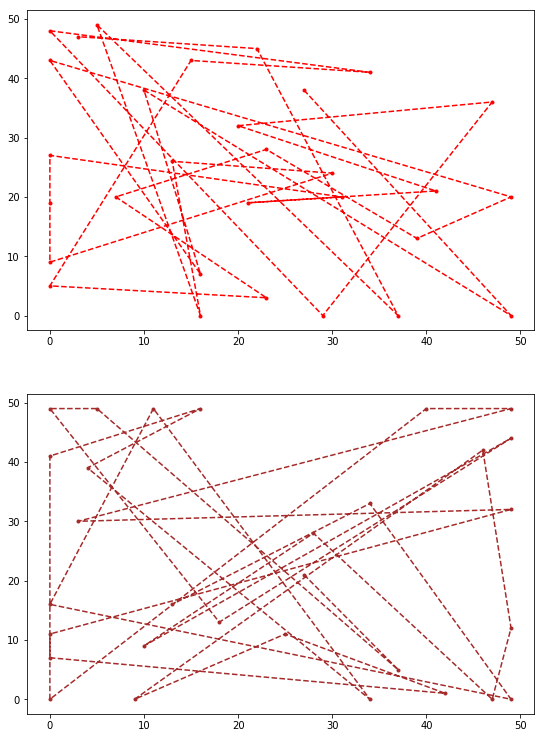

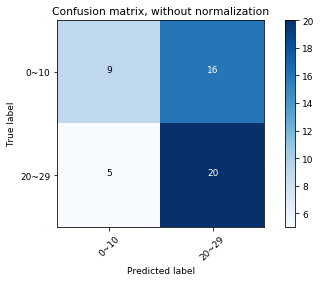

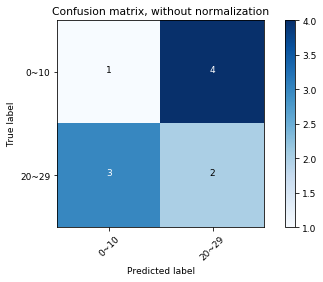

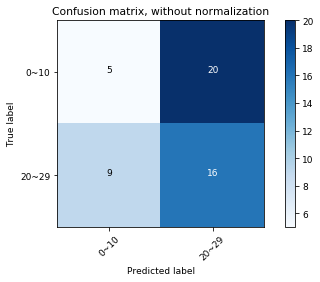

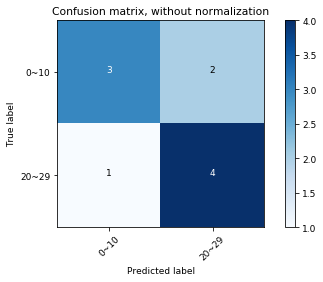

In [26]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [RssR Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [27]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9253664628226379


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


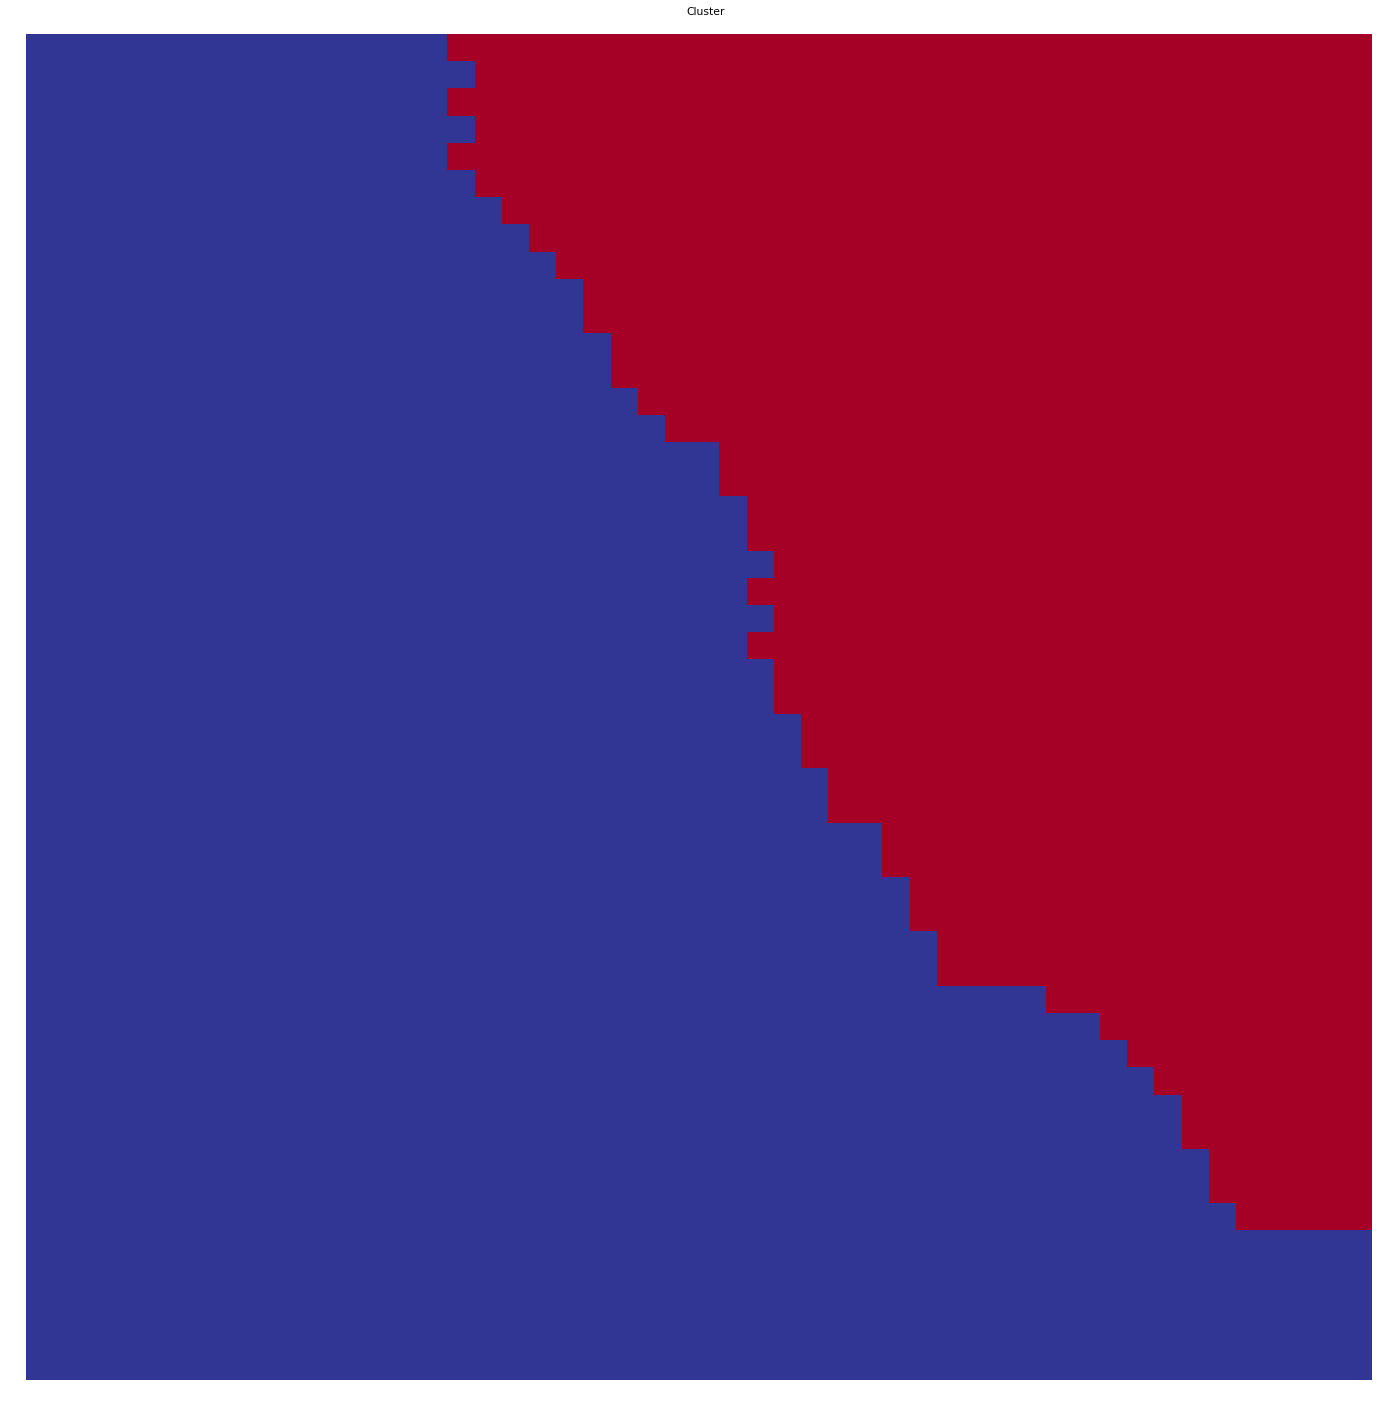

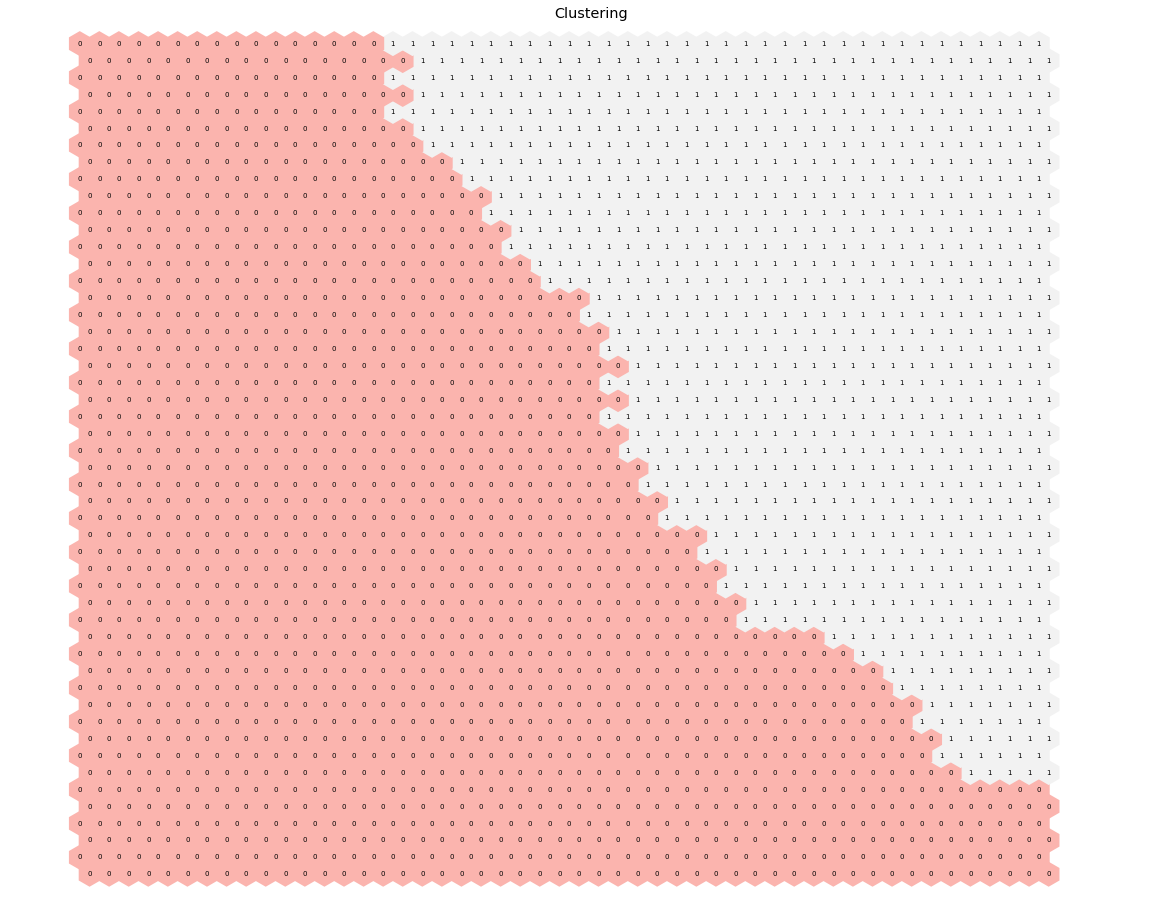

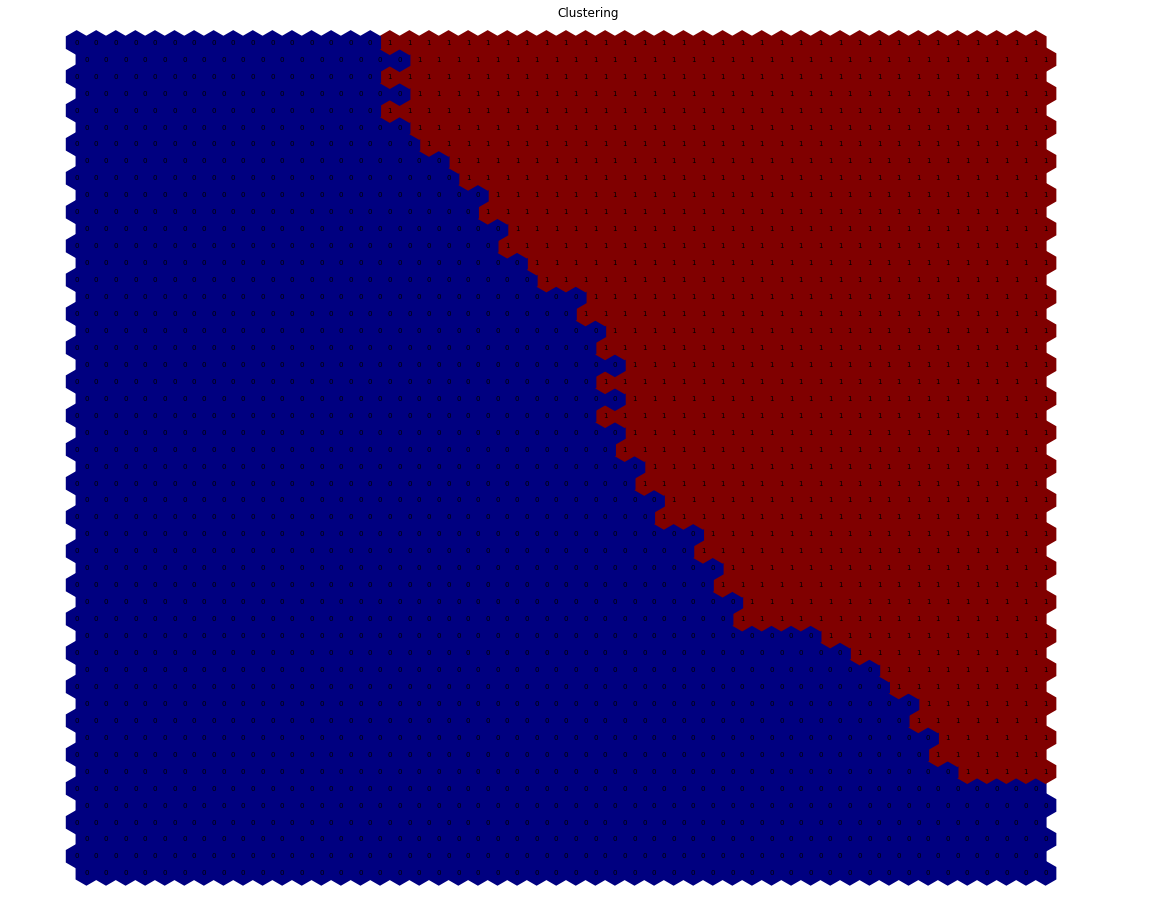

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[17  8]
 [23  2]]

true_positives total: 19
false_positives total: 31
false_negatives total: 31

Precision:  0.3125
Recal:  0.38
F1-Score:  0.3186813186813187
Accuracy:  0.38
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[23  2]
 [17  8]]

true_positives total: 31
false_positives total: 19
false_negatives total: 19

Precision:  0.6875
Recal:  0.62
F1-Score:  0.5824175824175825
Accuracy:  0.62
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalizati

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


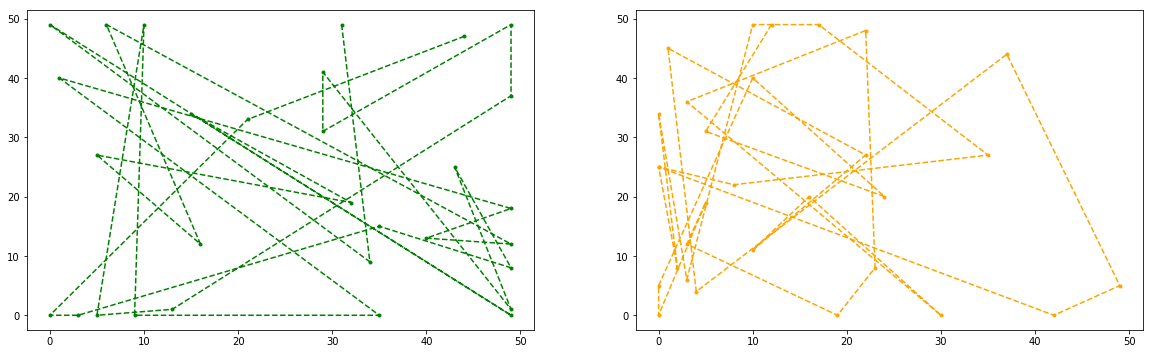

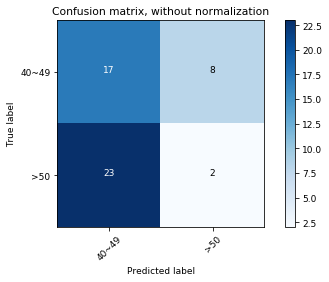

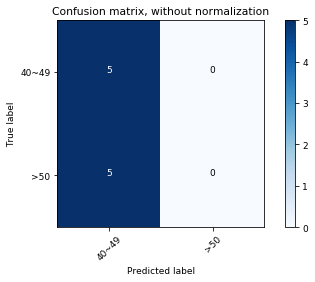

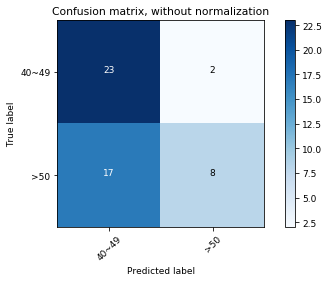

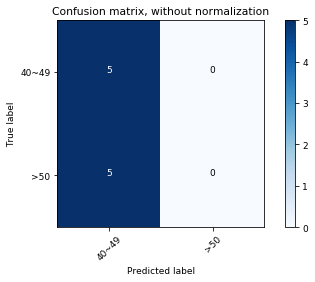

In [28]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] Cadence Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [29]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9640837789652822


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


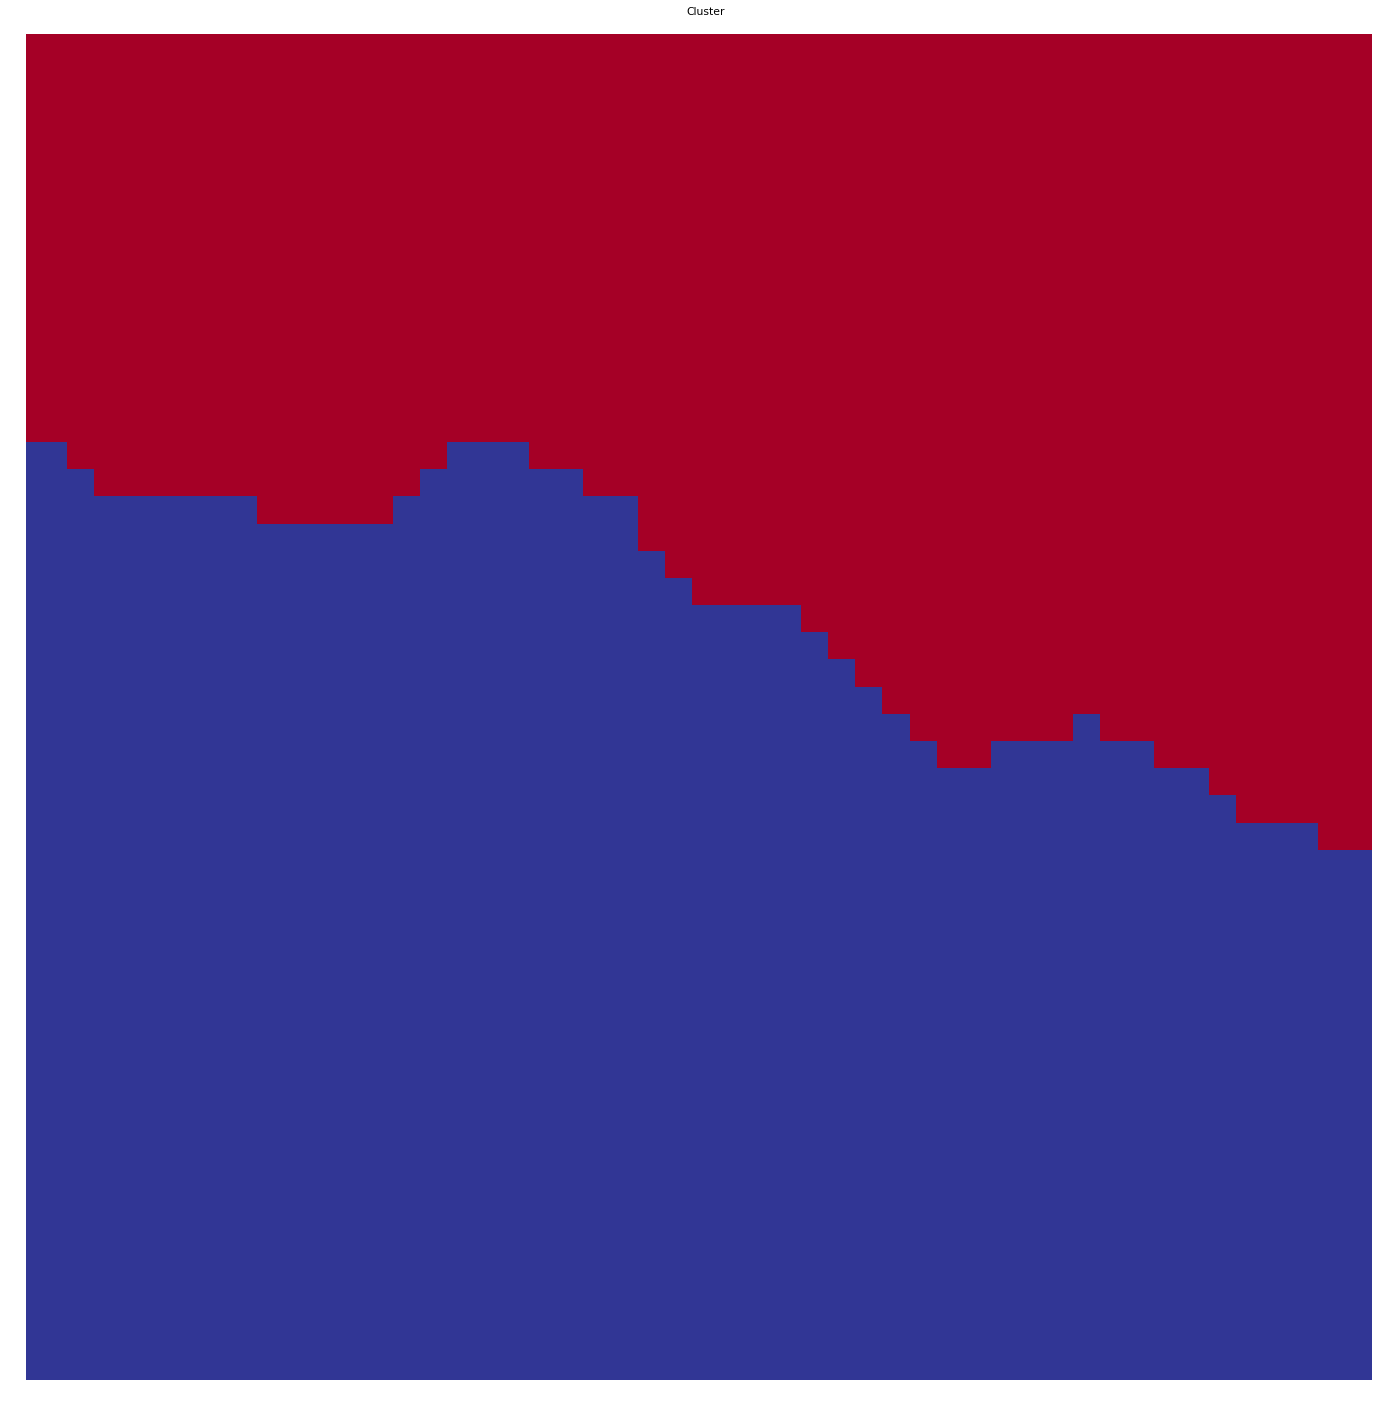

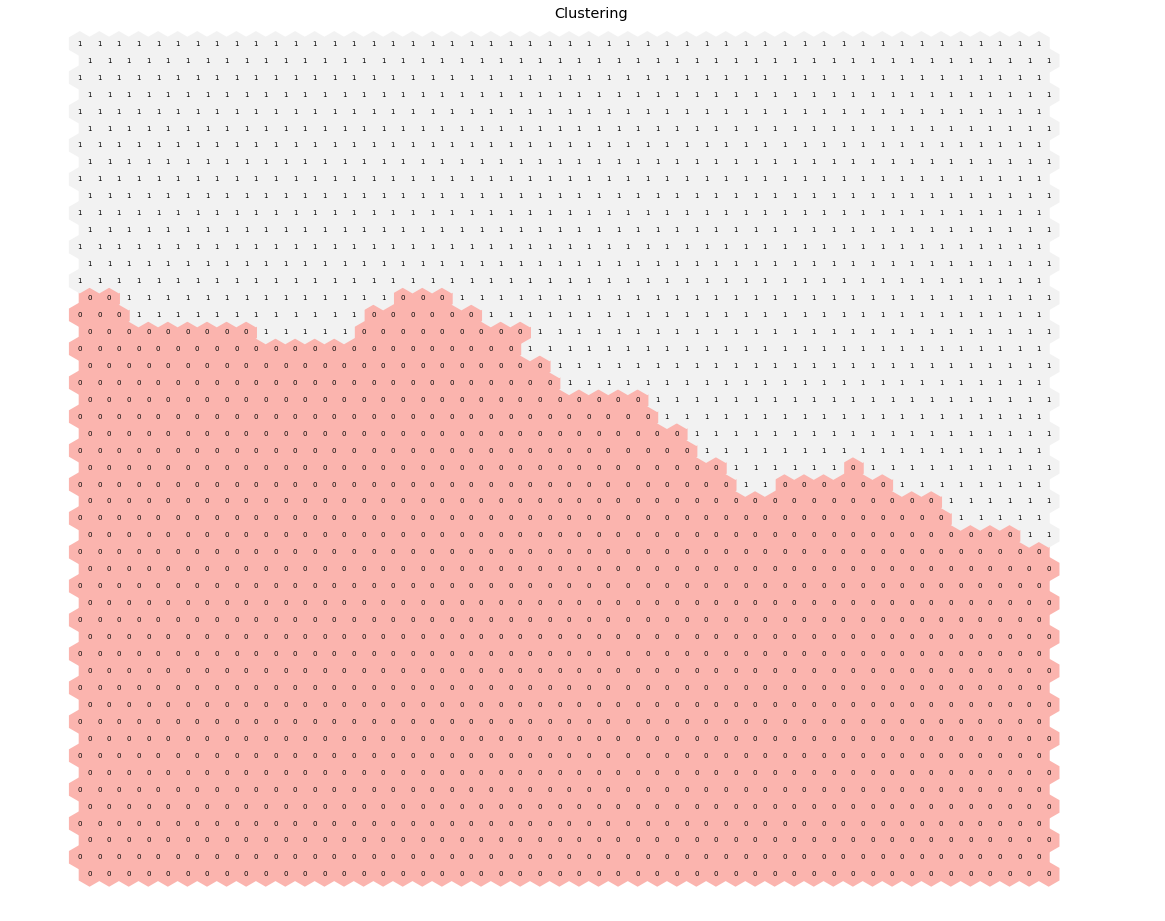

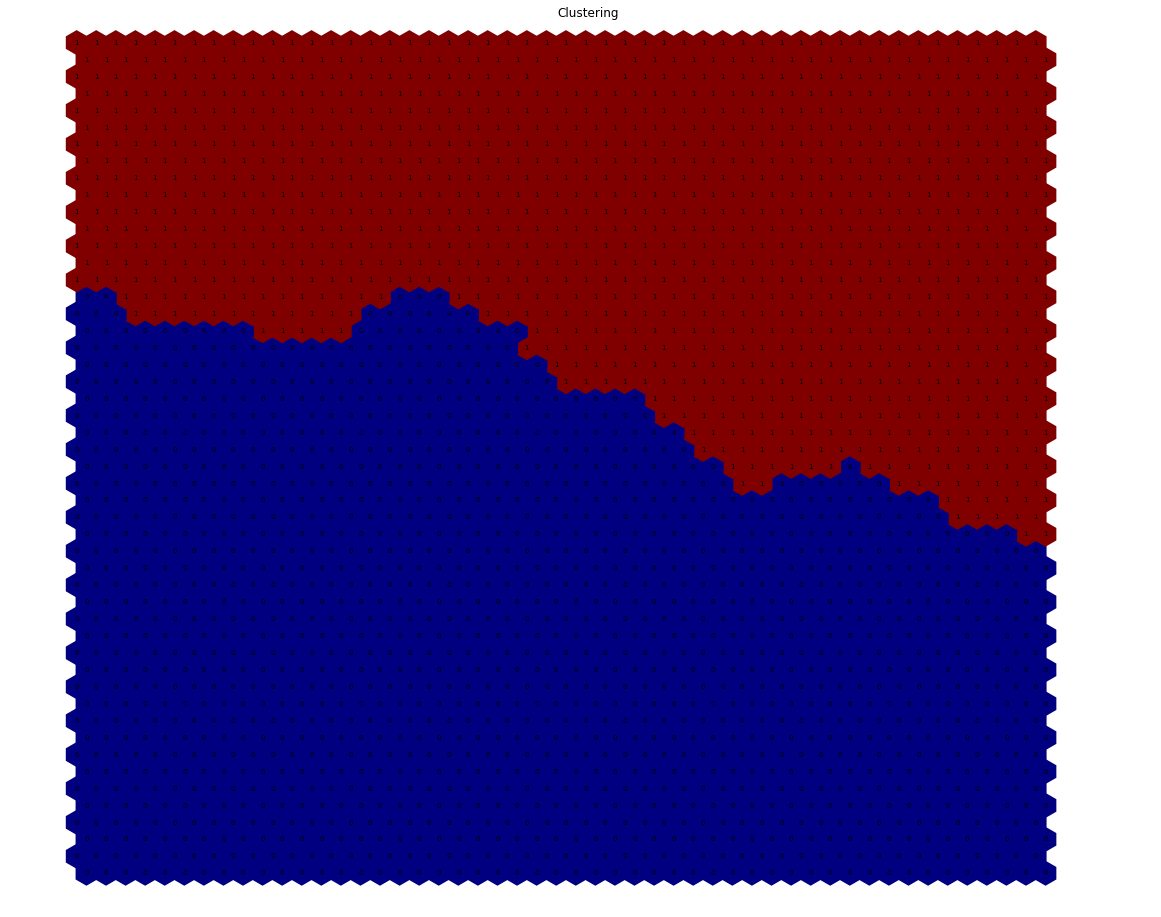

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 0 25]
 [ 3 22]]

true_positives total: 22
false_positives total: 28
false_negatives total: 28

Precision:  0.23404255319148937
Recal:  0.44
F1-Score:  0.3055555555555556
Accuracy:  0.44
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 3 22]
 [ 0 25]]


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



true_positives total: 28
false_positives total: 22
false_negatives total: 22

Precision:  0.7659574468085106
Recal:  0.56
F1-Score:  0.45436507936507936
Accuracy:  0.56
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


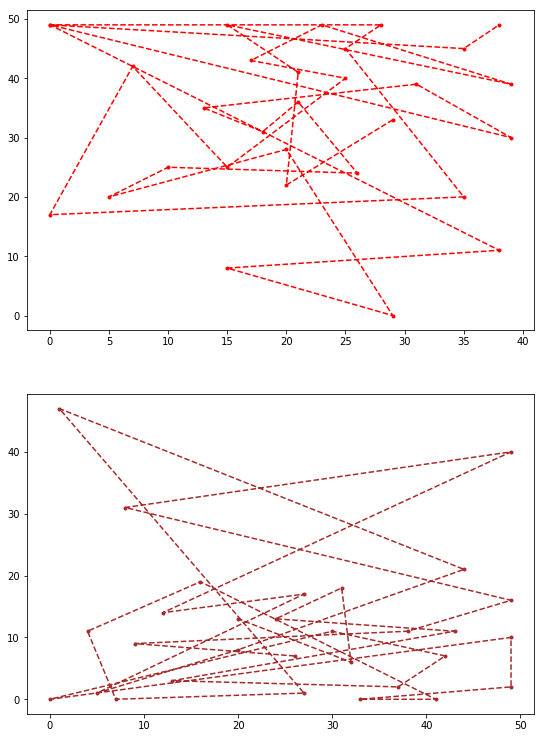

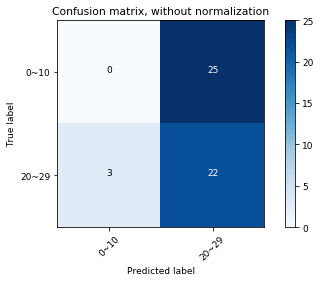

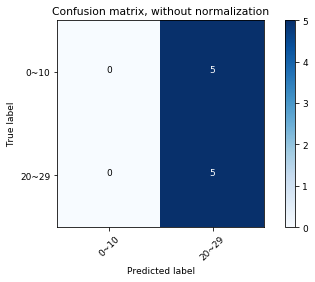

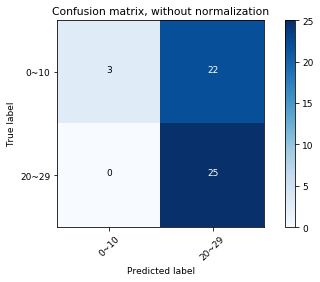

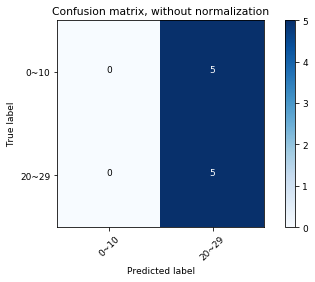

In [30]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Cadence Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [31]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9604240016246891


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


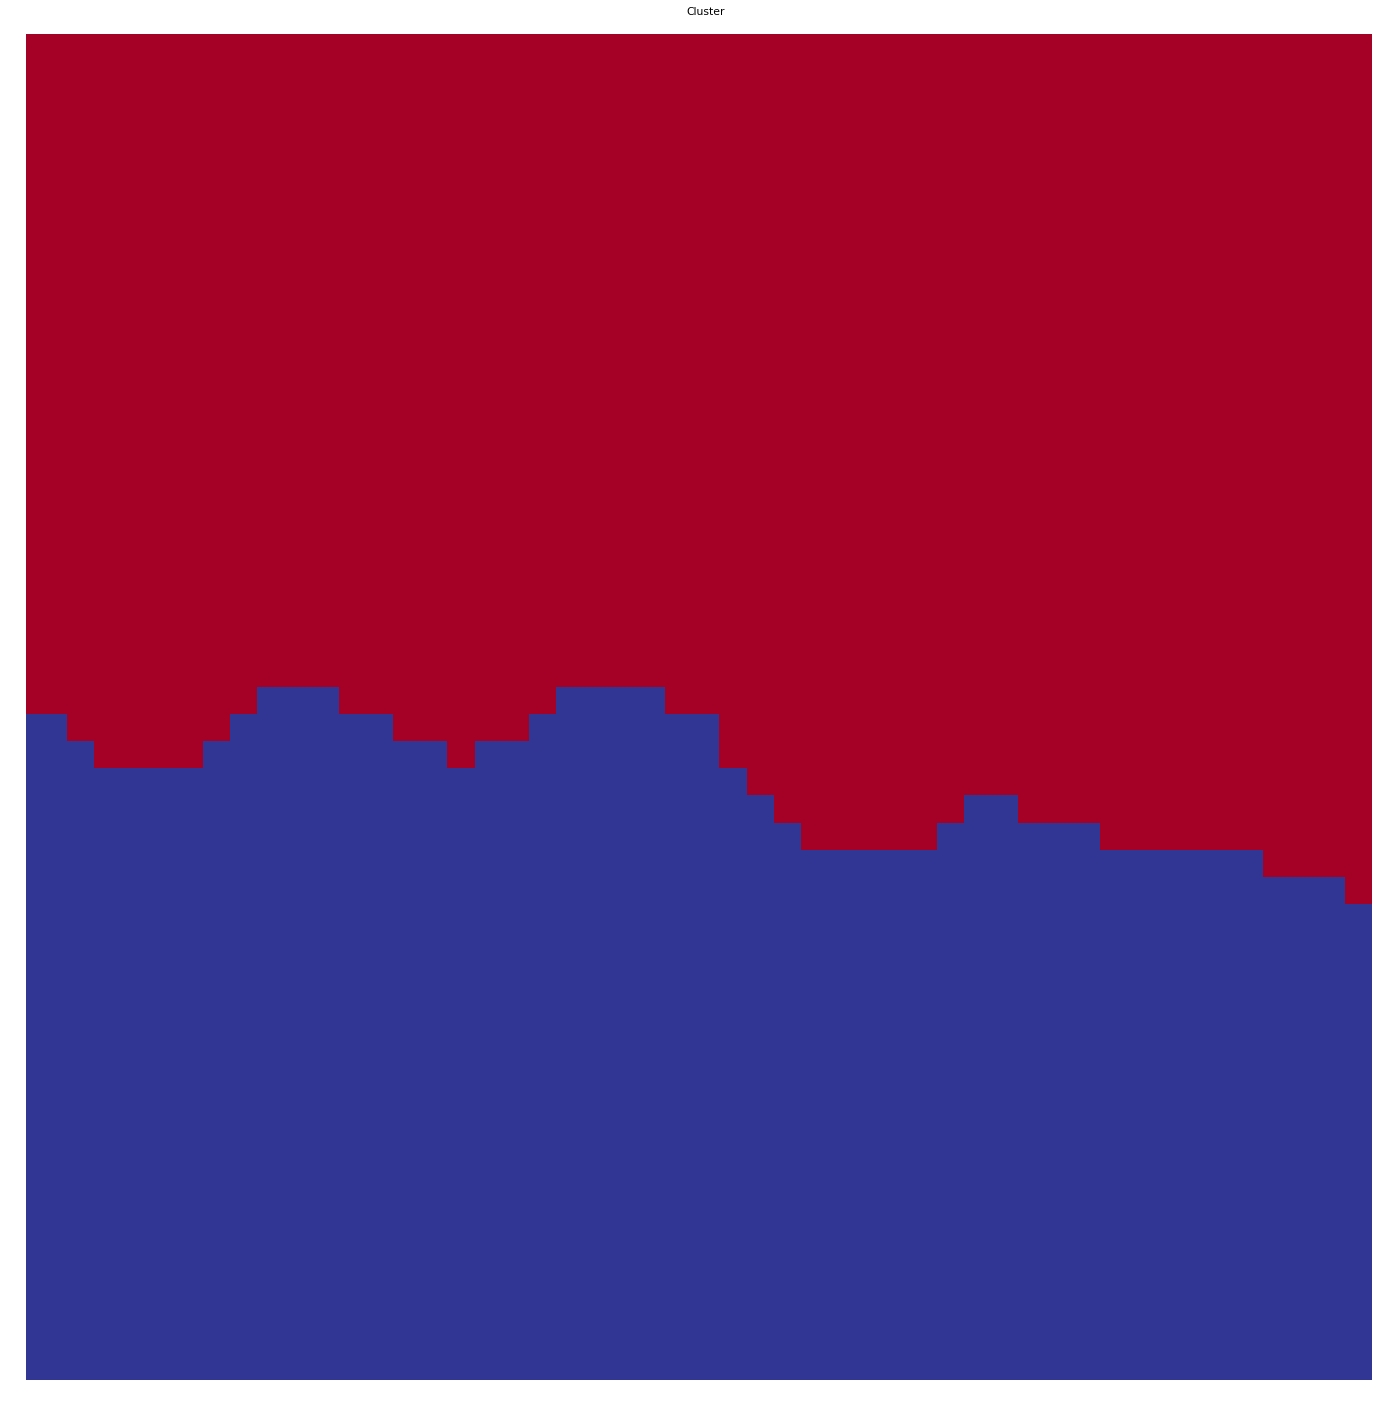

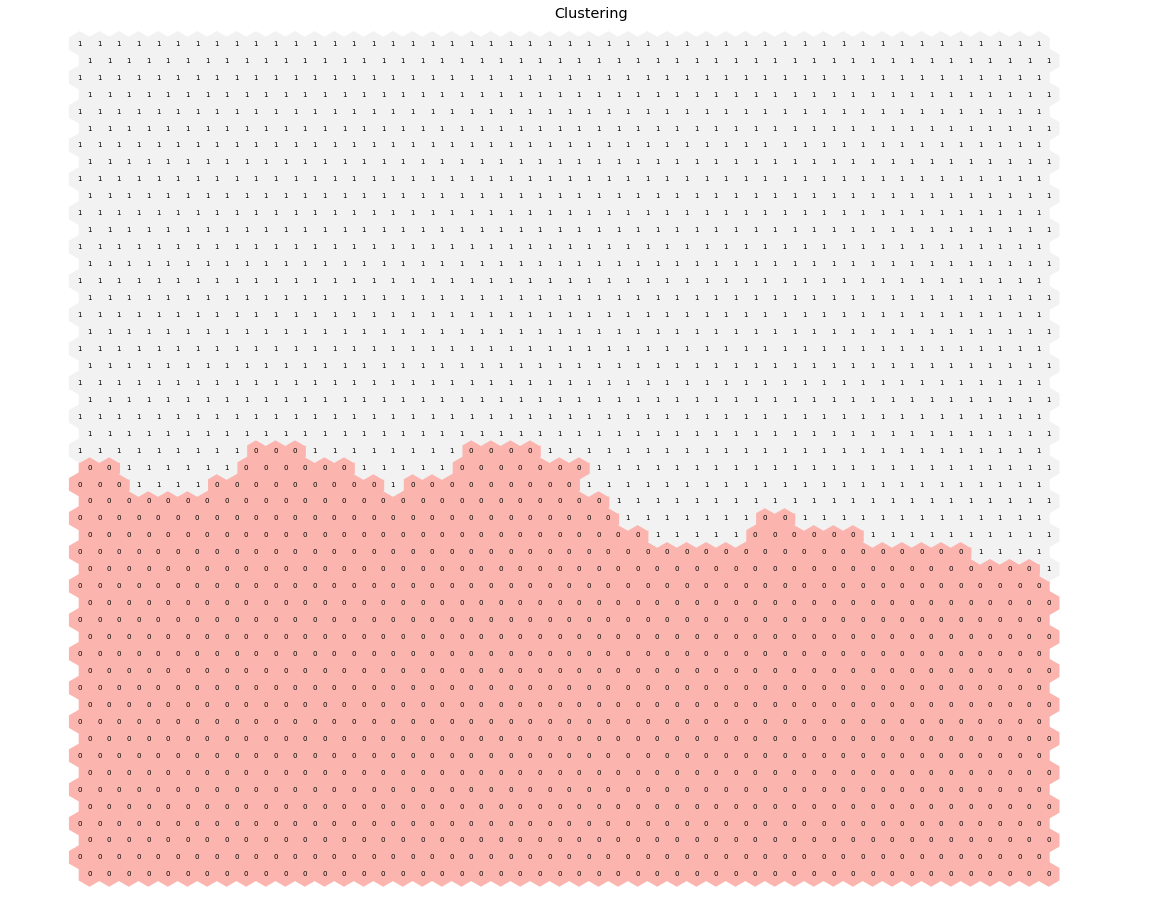

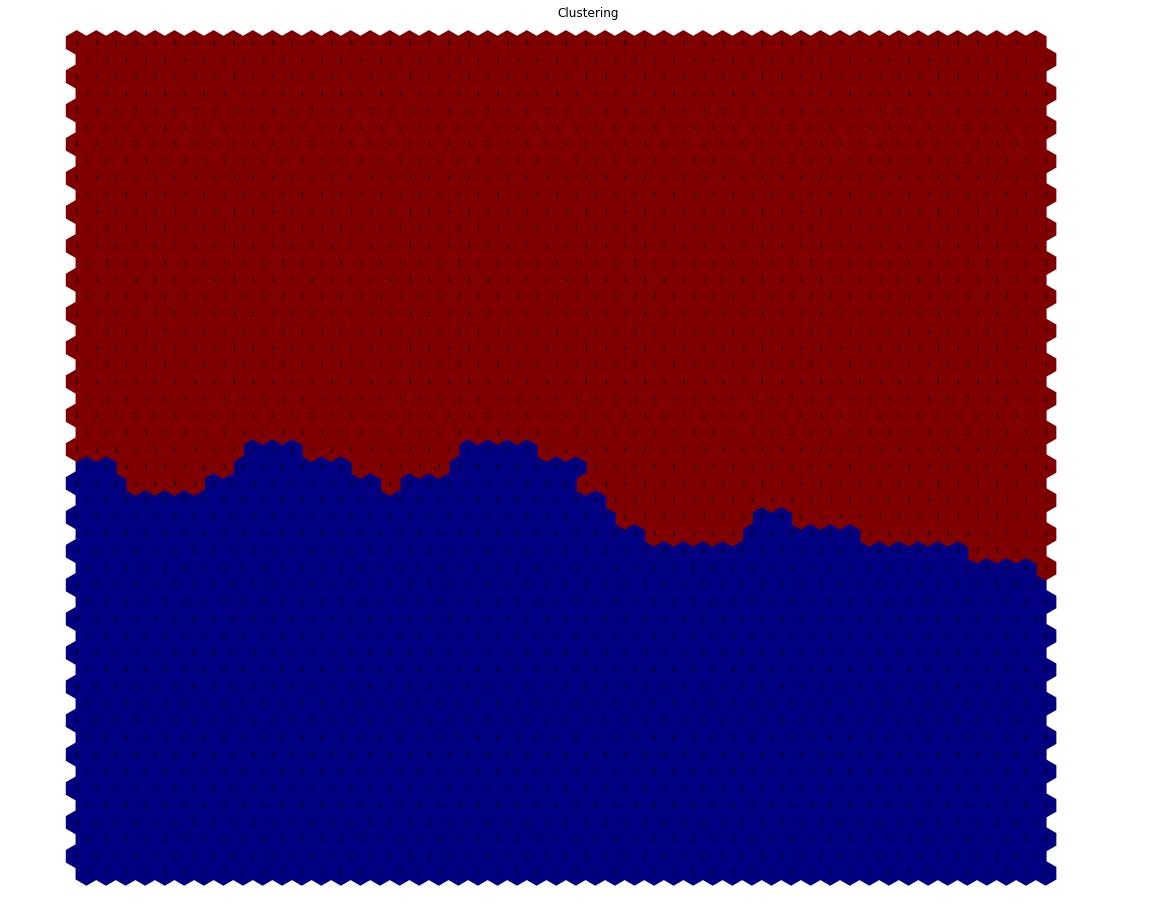

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 1 24]
 [ 0 25]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.7551020408163265
Recal:  0.52
F1-Score:  0.3762993762993764
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 0 25]
 [ 1 24]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.24489795918367346
Recal:  0.48
F1-Score:  0.3243243243243243
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


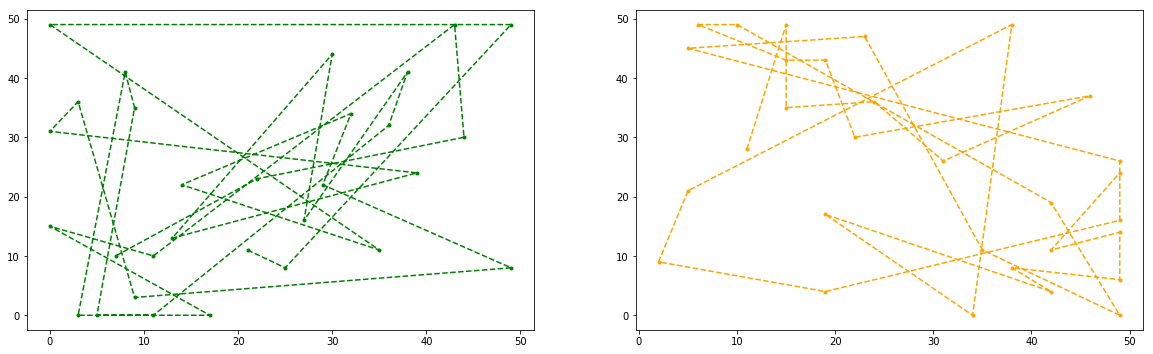

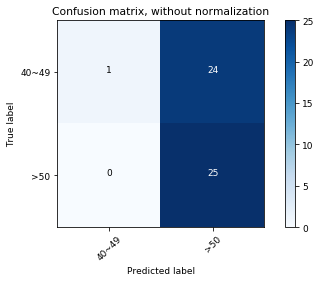

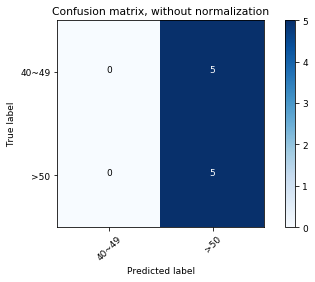

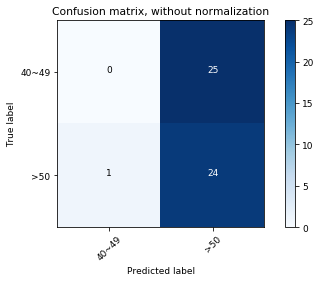

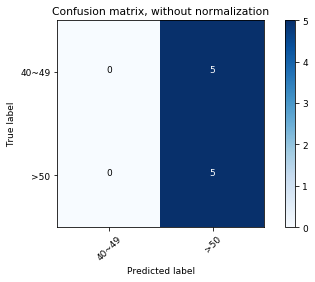

In [32]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Rs RssR Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [33]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'RssR', 'Rst']

The fuzzy partition coefficient (FPC) 0.9547431722819502


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


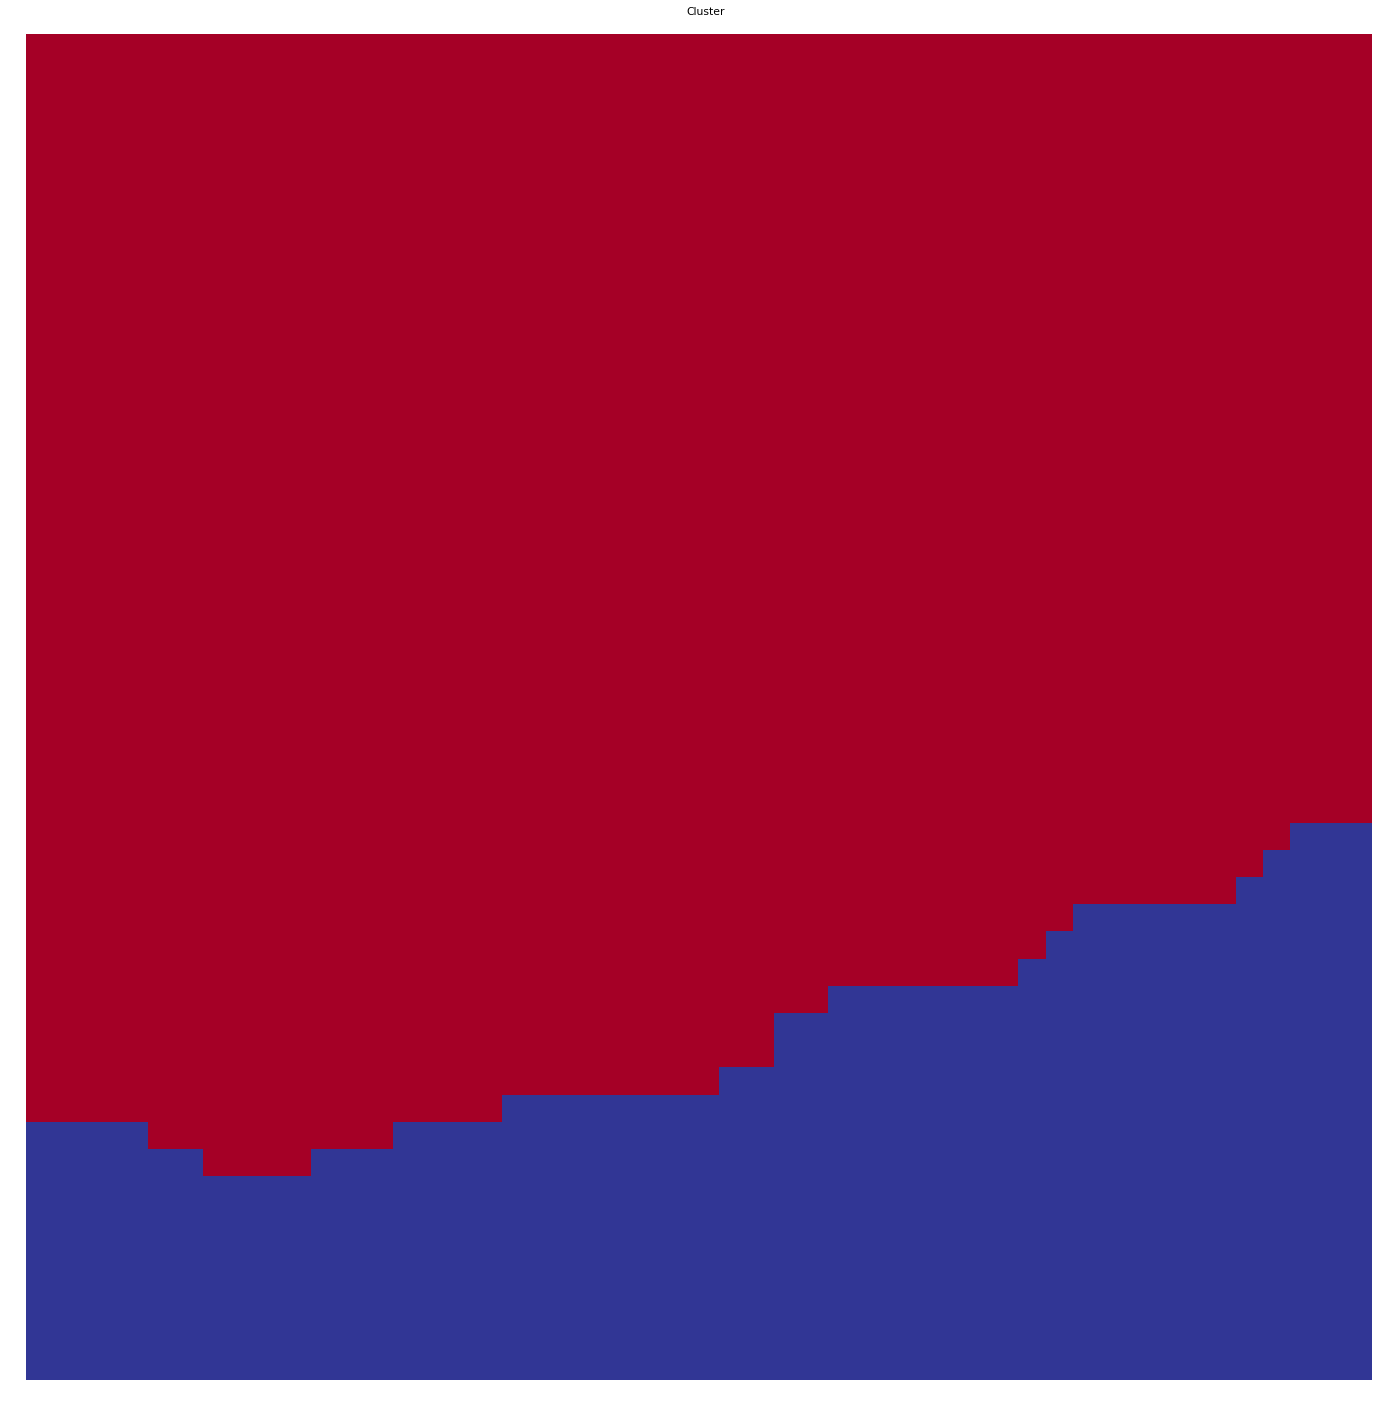

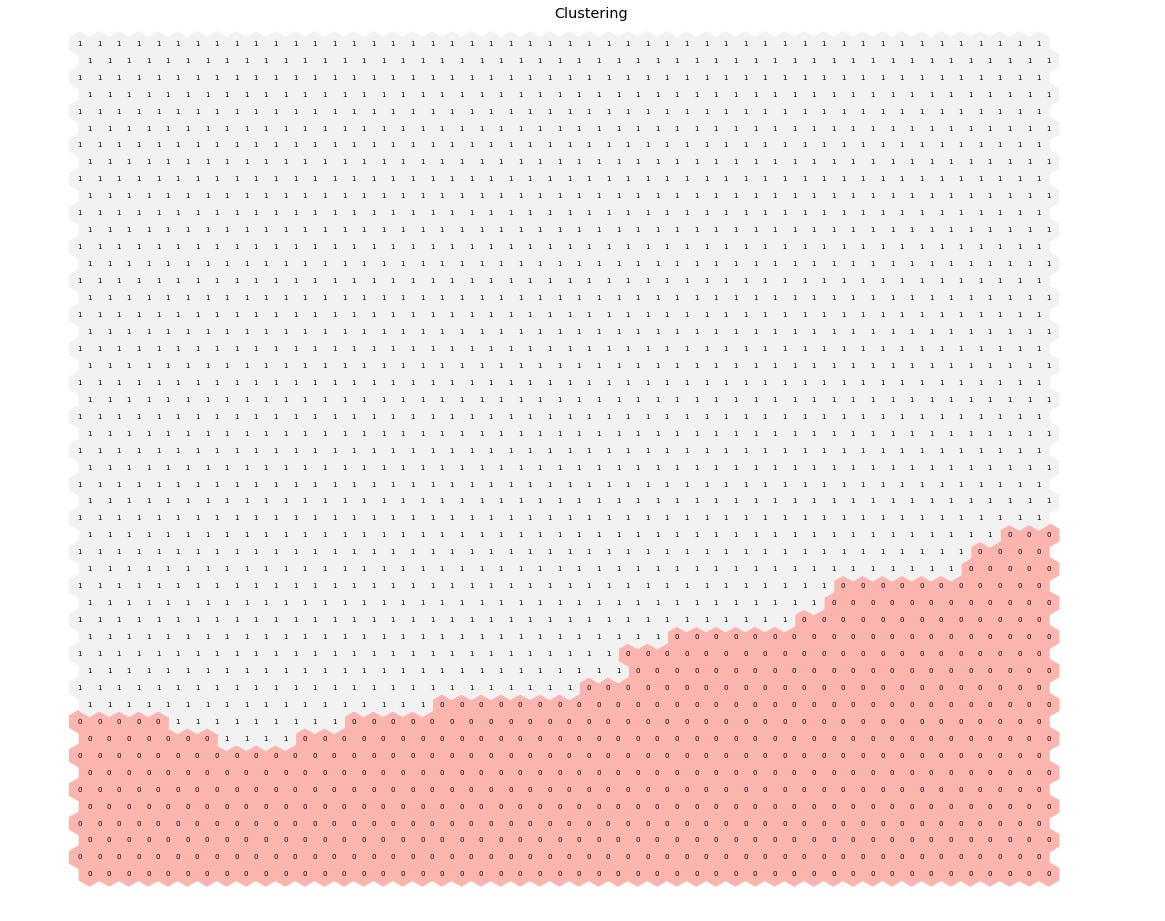

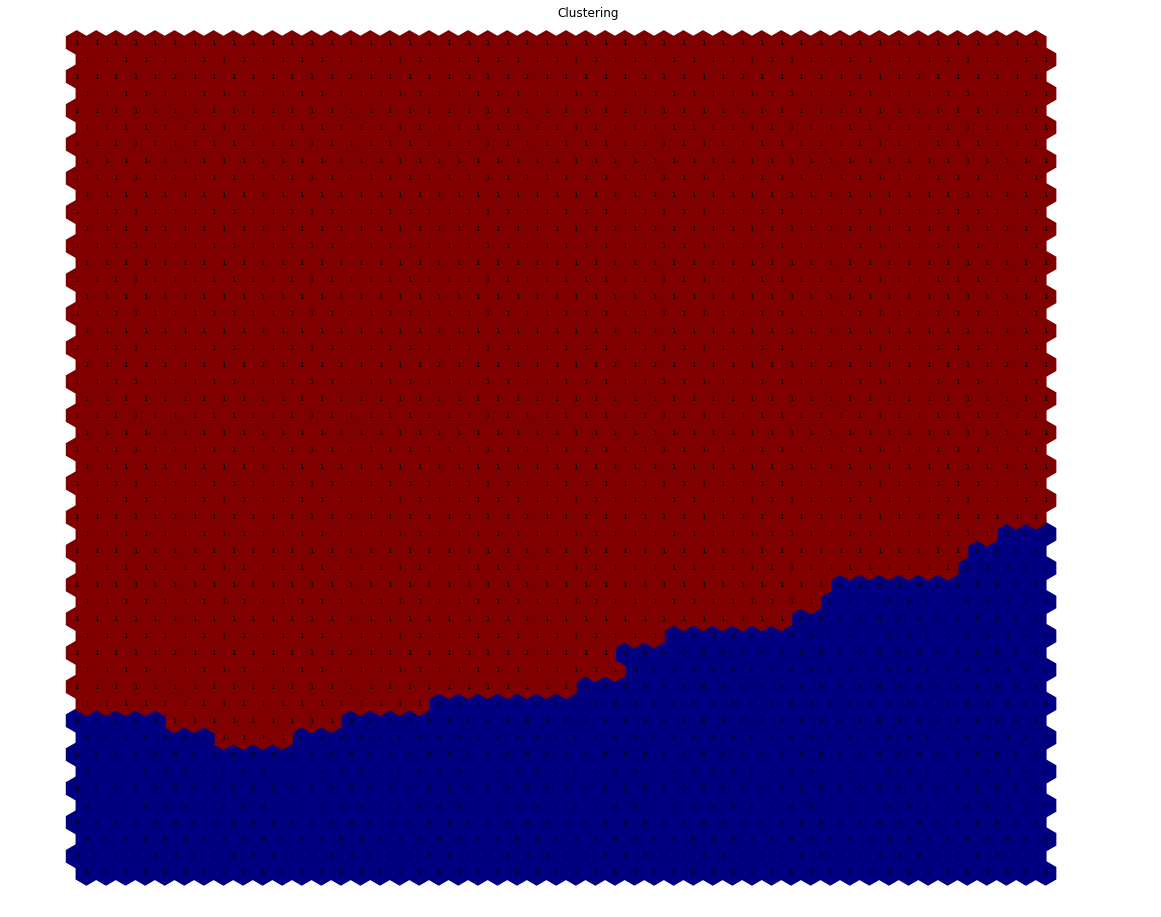

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 2 23]
 [ 1 24]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5886524822695035
Recal:  0.52
F1-Score:  0.40476190476190466
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [1 4]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.5
Recal:  0.5
F1-Score:  0.45054945054945056
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 1 24]
 [ 2 23]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.41134751773049644
Recal:  0.48
F1-Score:  0.3551587301587301
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion m

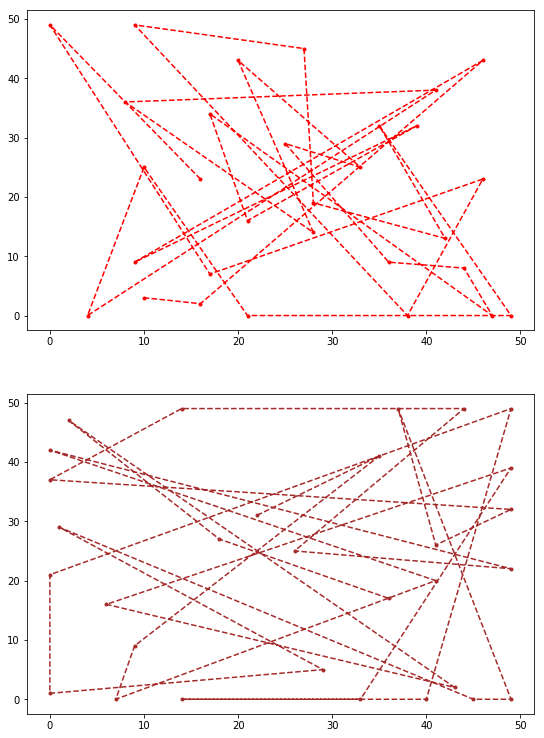

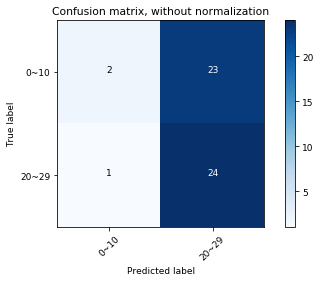

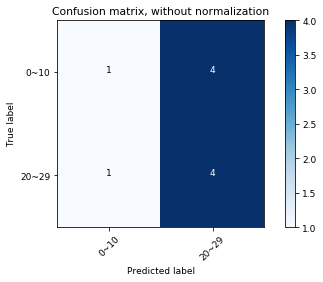

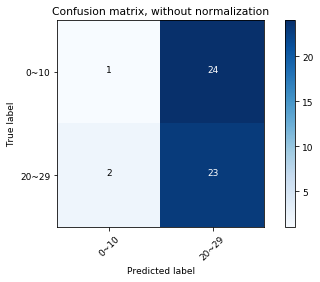

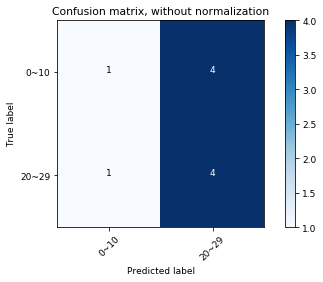

In [34]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Rs RssR Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [35]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'RssR', 'Rst']

The fuzzy partition coefficient (FPC) 0.966430355168552


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


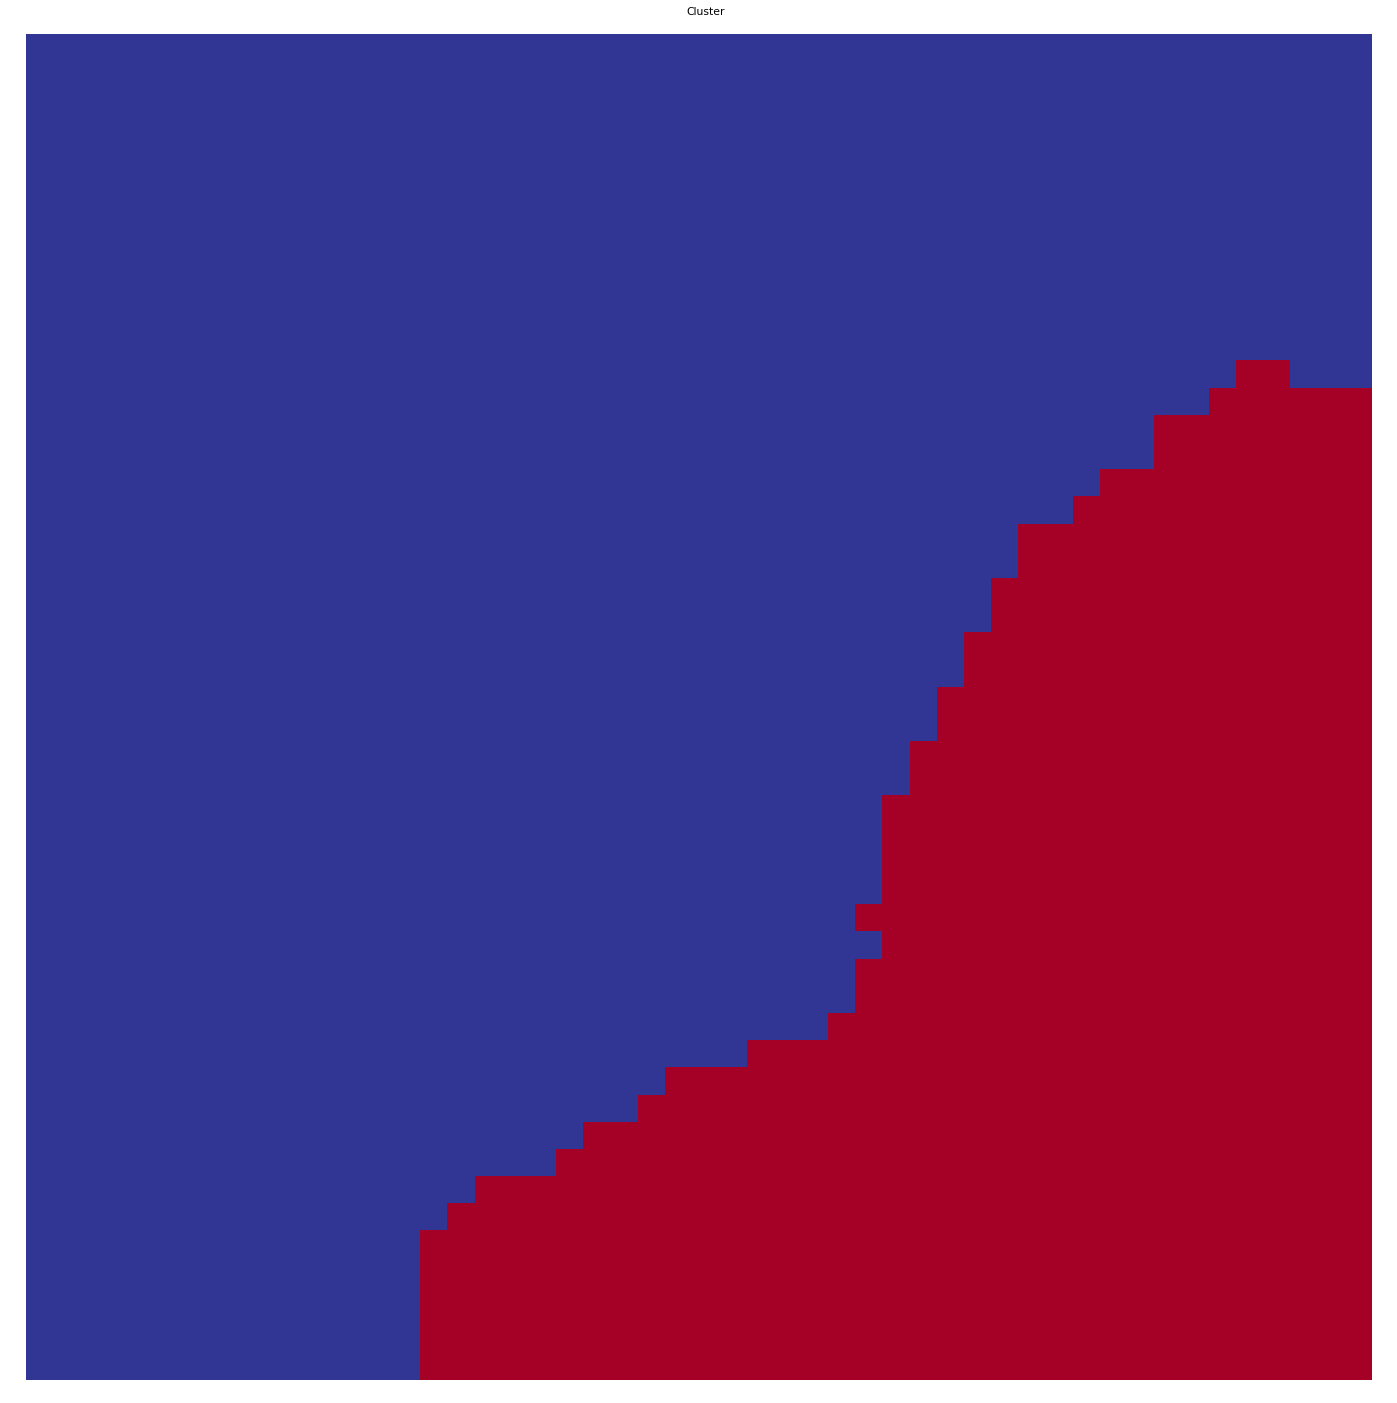

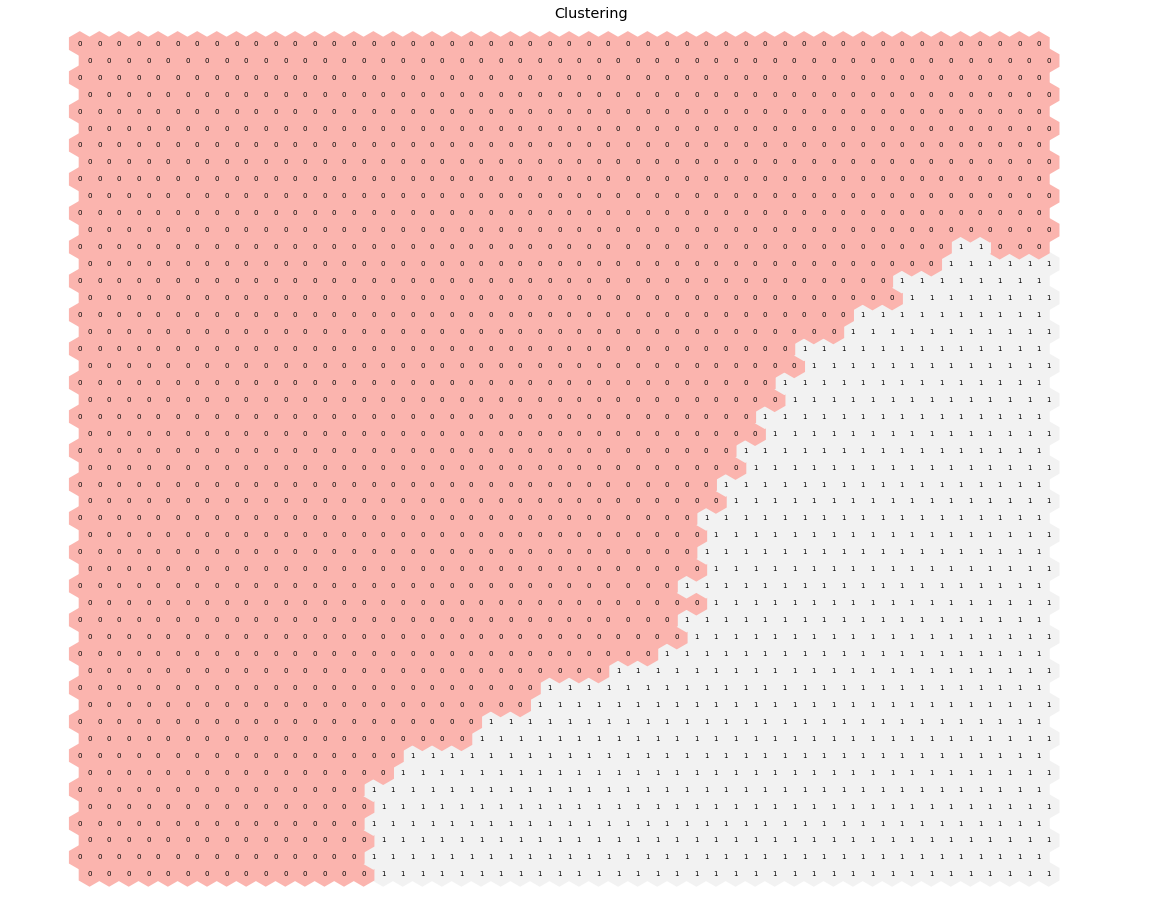

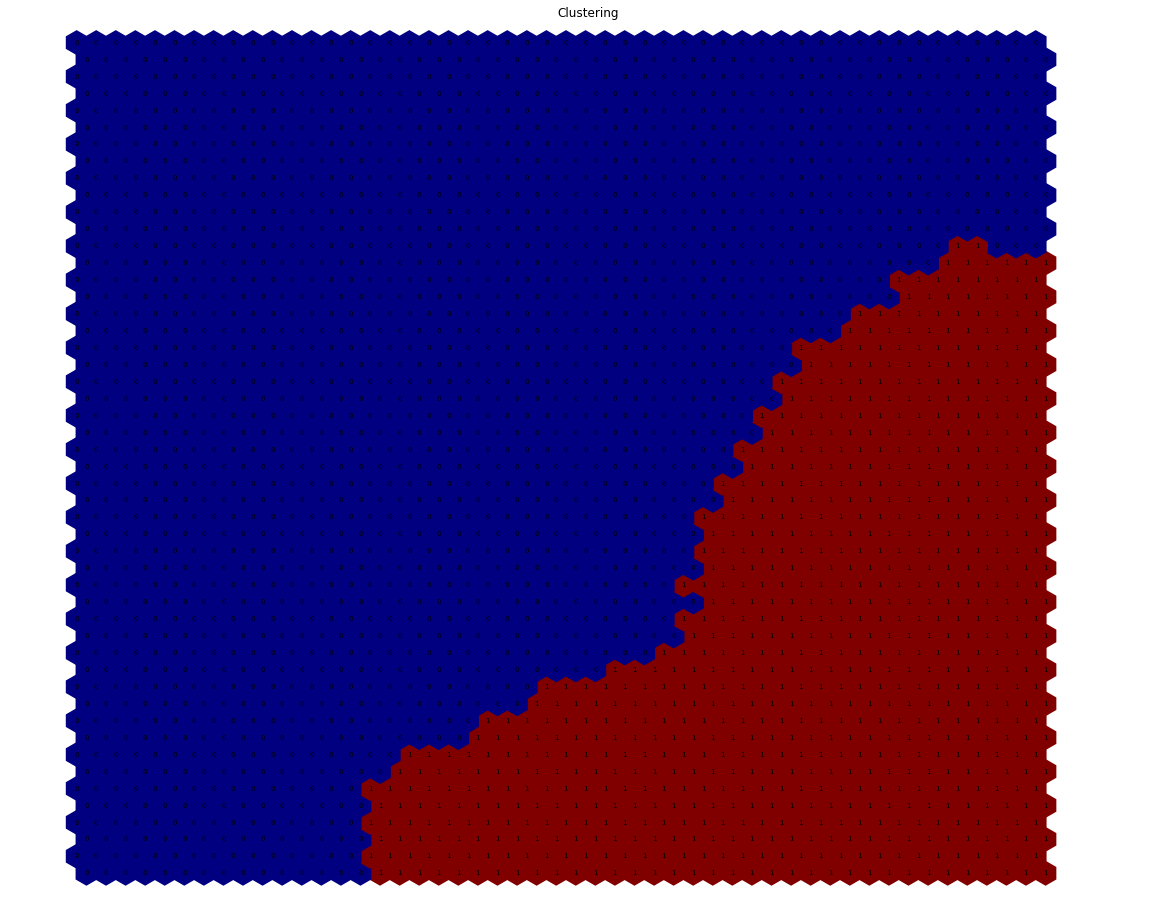

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 4 21]
 [ 2 23]]

true_positives total: 27
false_positives total: 23
false_negatives total: 23

Precision:  0.5946969696969697
Recal:  0.54
F1-Score:  0.46236559139784944
Accuracy:  0.54
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 2 23]
 [ 4 21]]

true_positives total: 23
false_positives total: 27
false_negatives total: 27

Precision:  0.4053030303030303
Recal:  0.46
F1-Score:  0.36886395511921466
Accuracy:  0.46
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


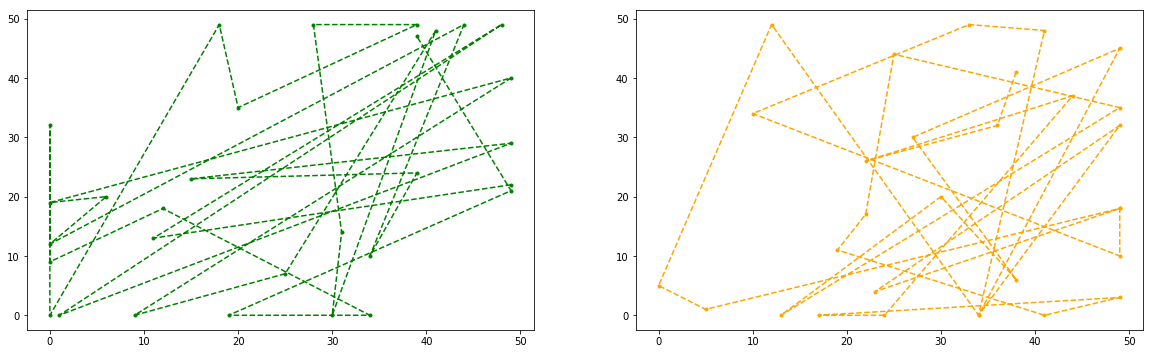

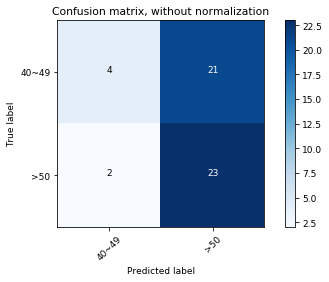

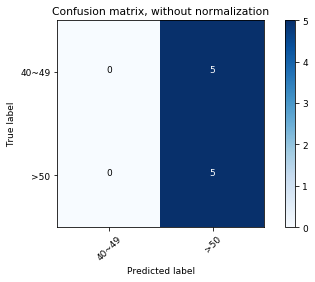

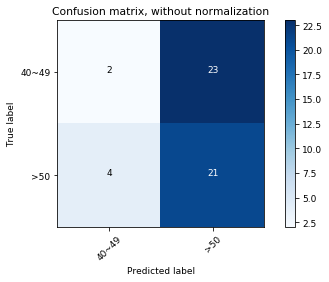

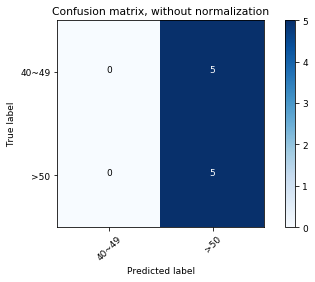

In [36]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Cadence Rs RssL] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [37]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Cadence', 'Rs', 'RssL']

The fuzzy partition coefficient (FPC) 0.9574979634805433


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


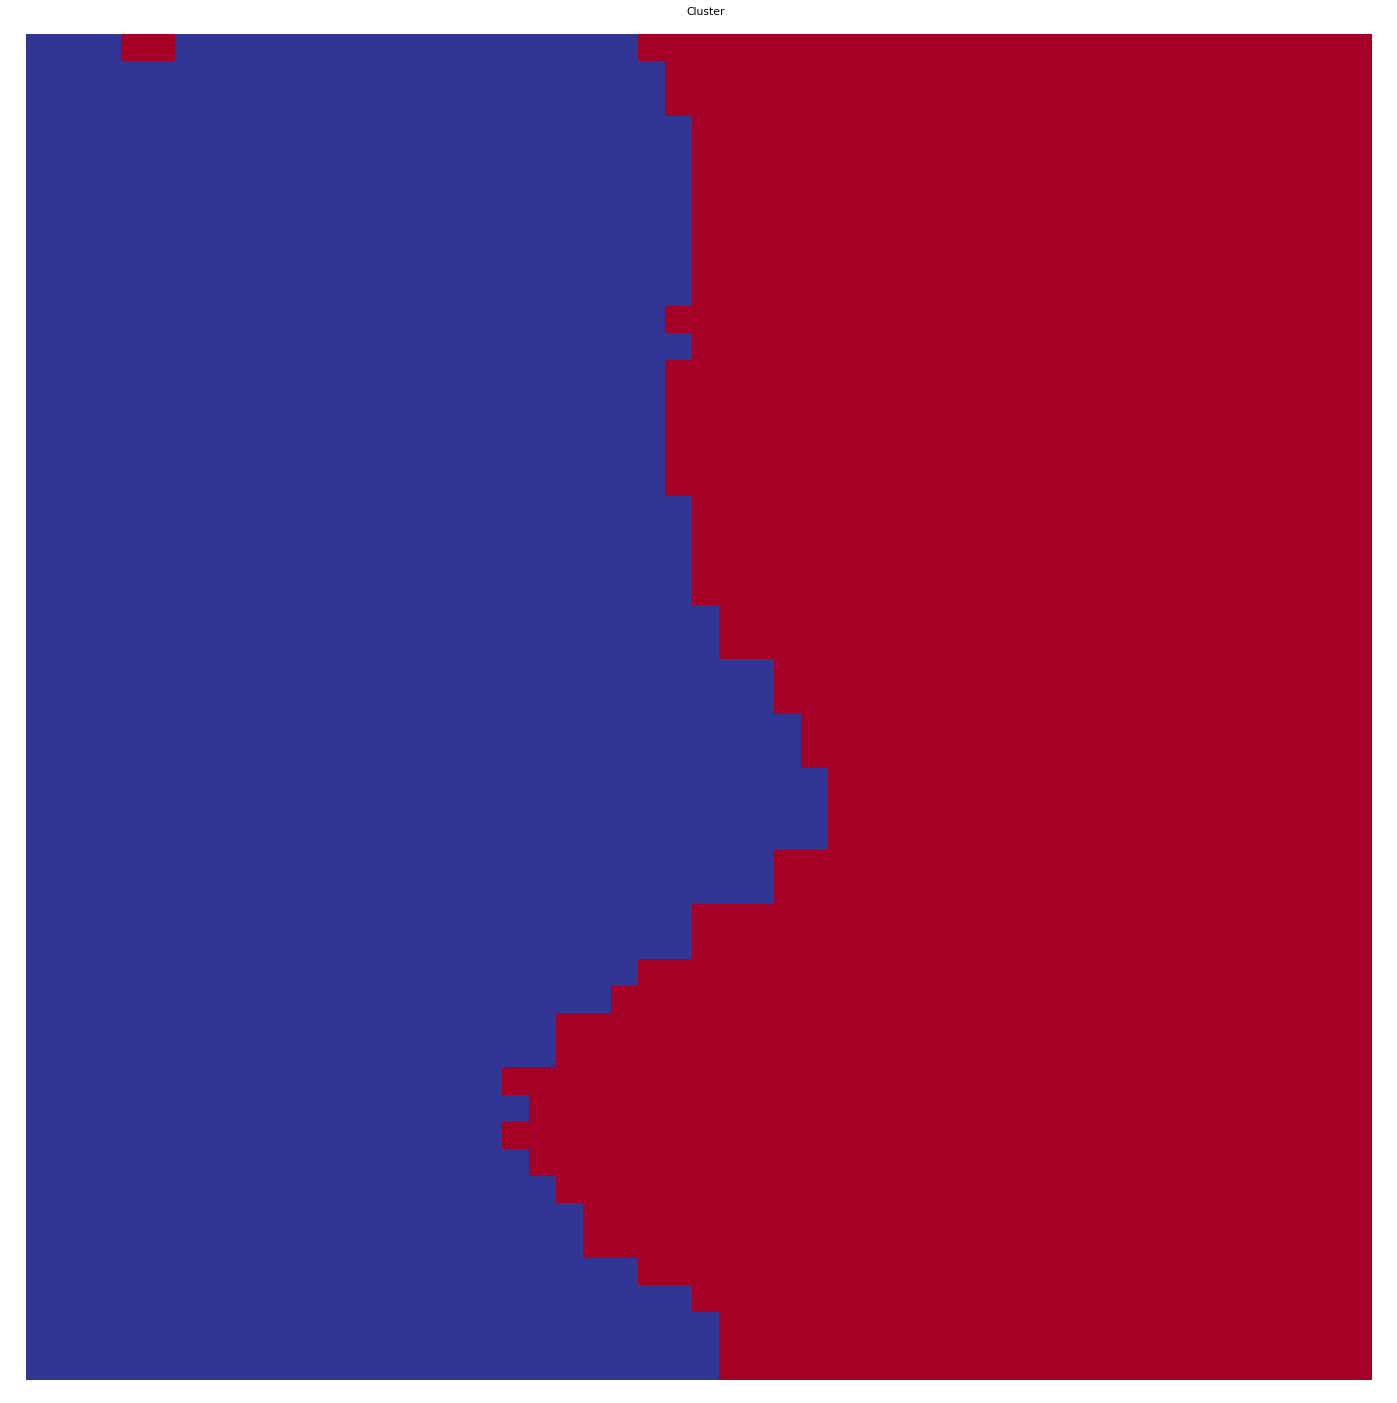

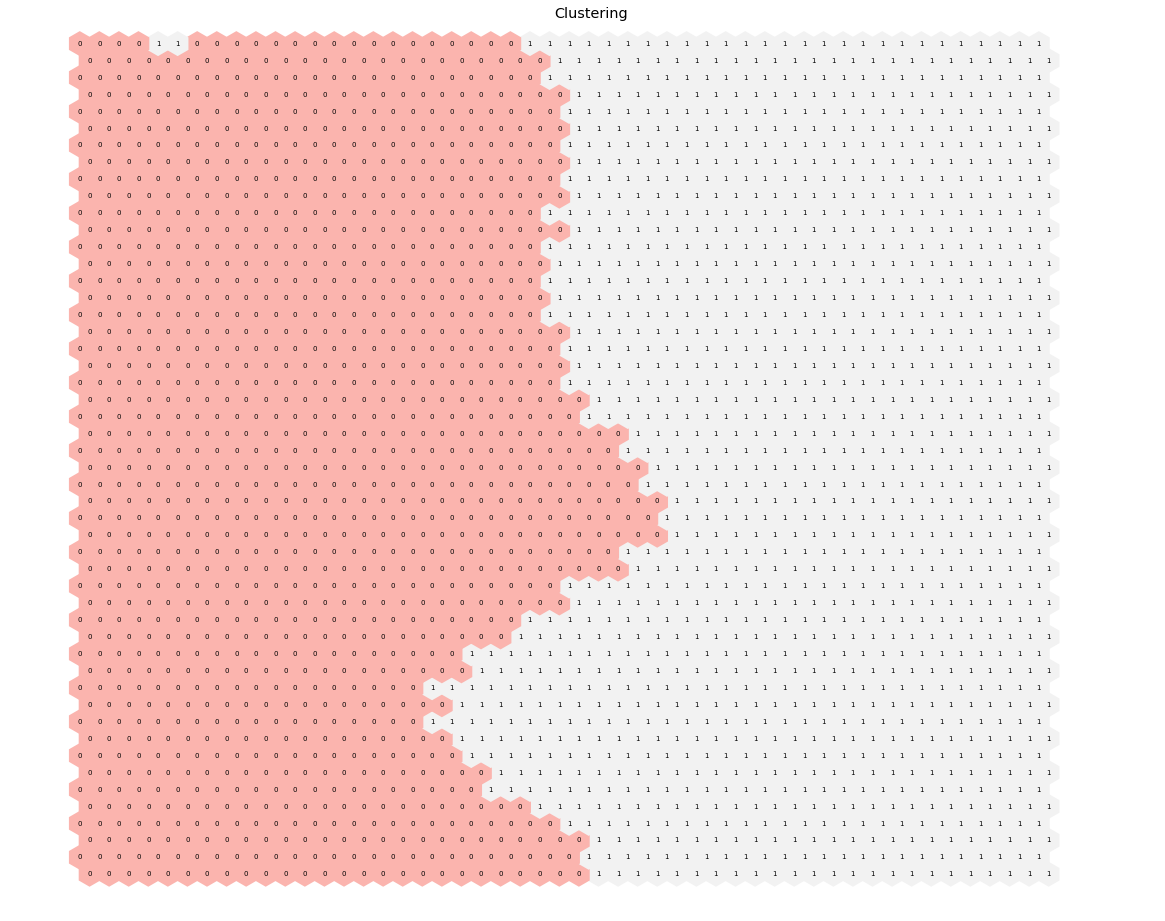

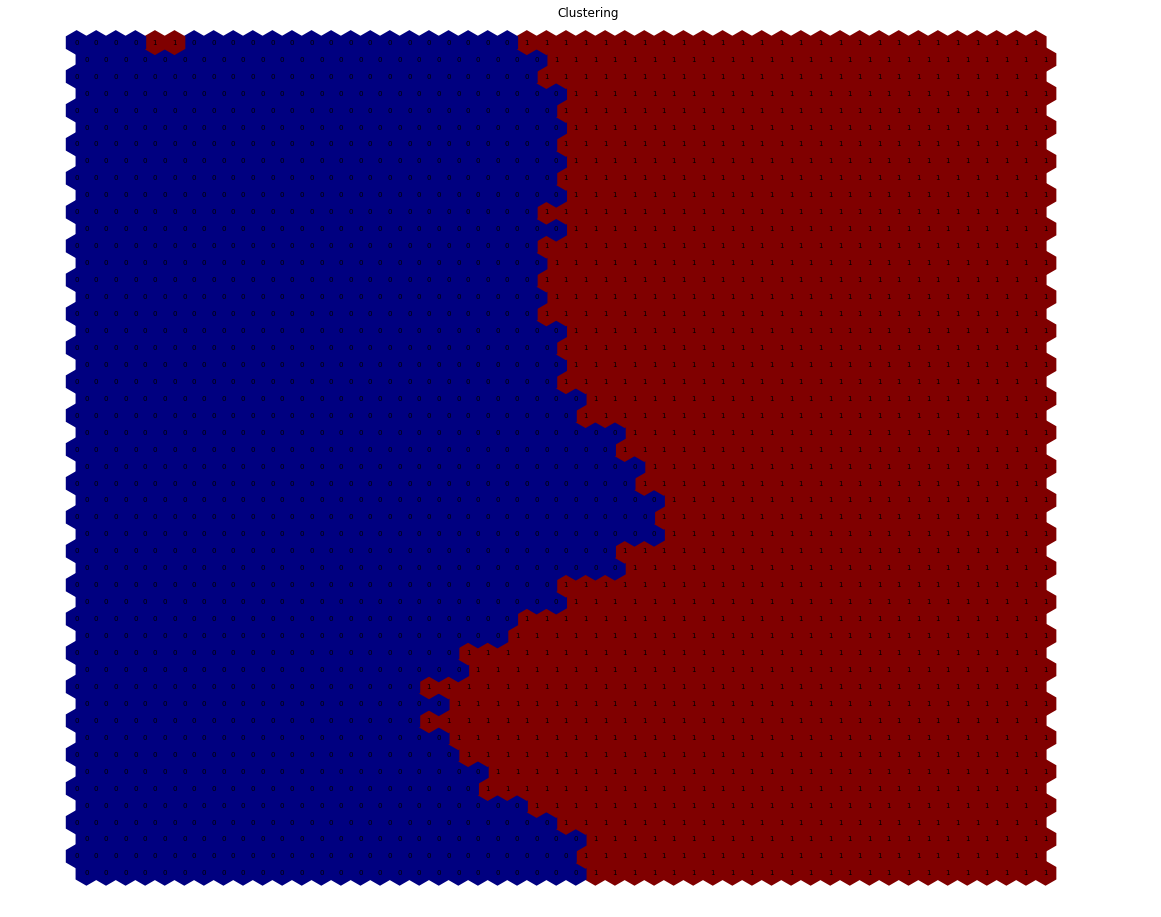

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[25  0]
 [25  0]]

true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.25
Recal:  0.5
F1-Score:  0.33333333333333326
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[25  0]
 [25  0]]

true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.25
Recal:  0.5
F1-Score:  0.33333333333333326
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


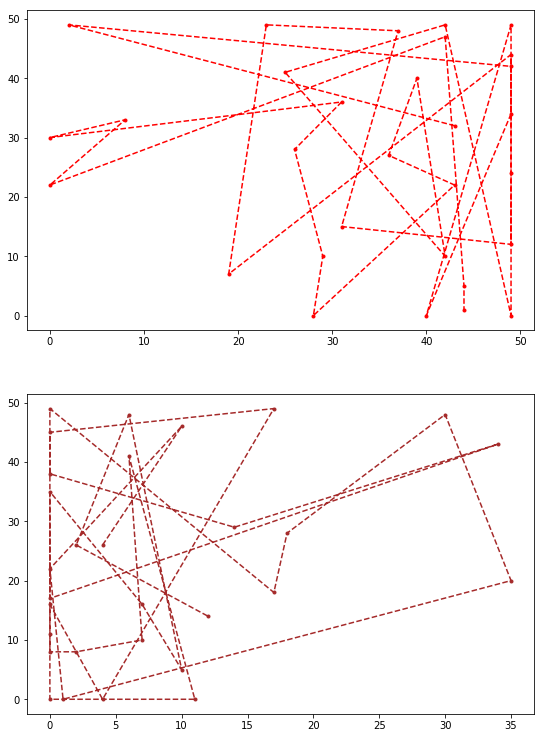

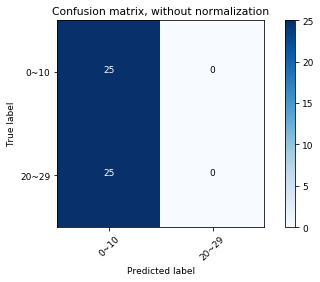

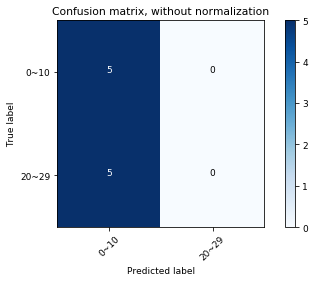

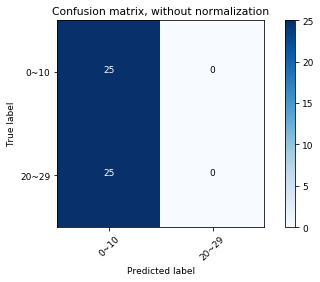

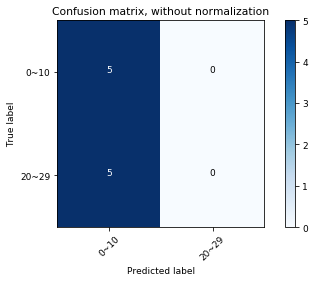

In [38]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Cadence Rs RssL] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [39]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Cadence', 'Rs', 'RssL']

The fuzzy partition coefficient (FPC) 0.9285311025042796


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


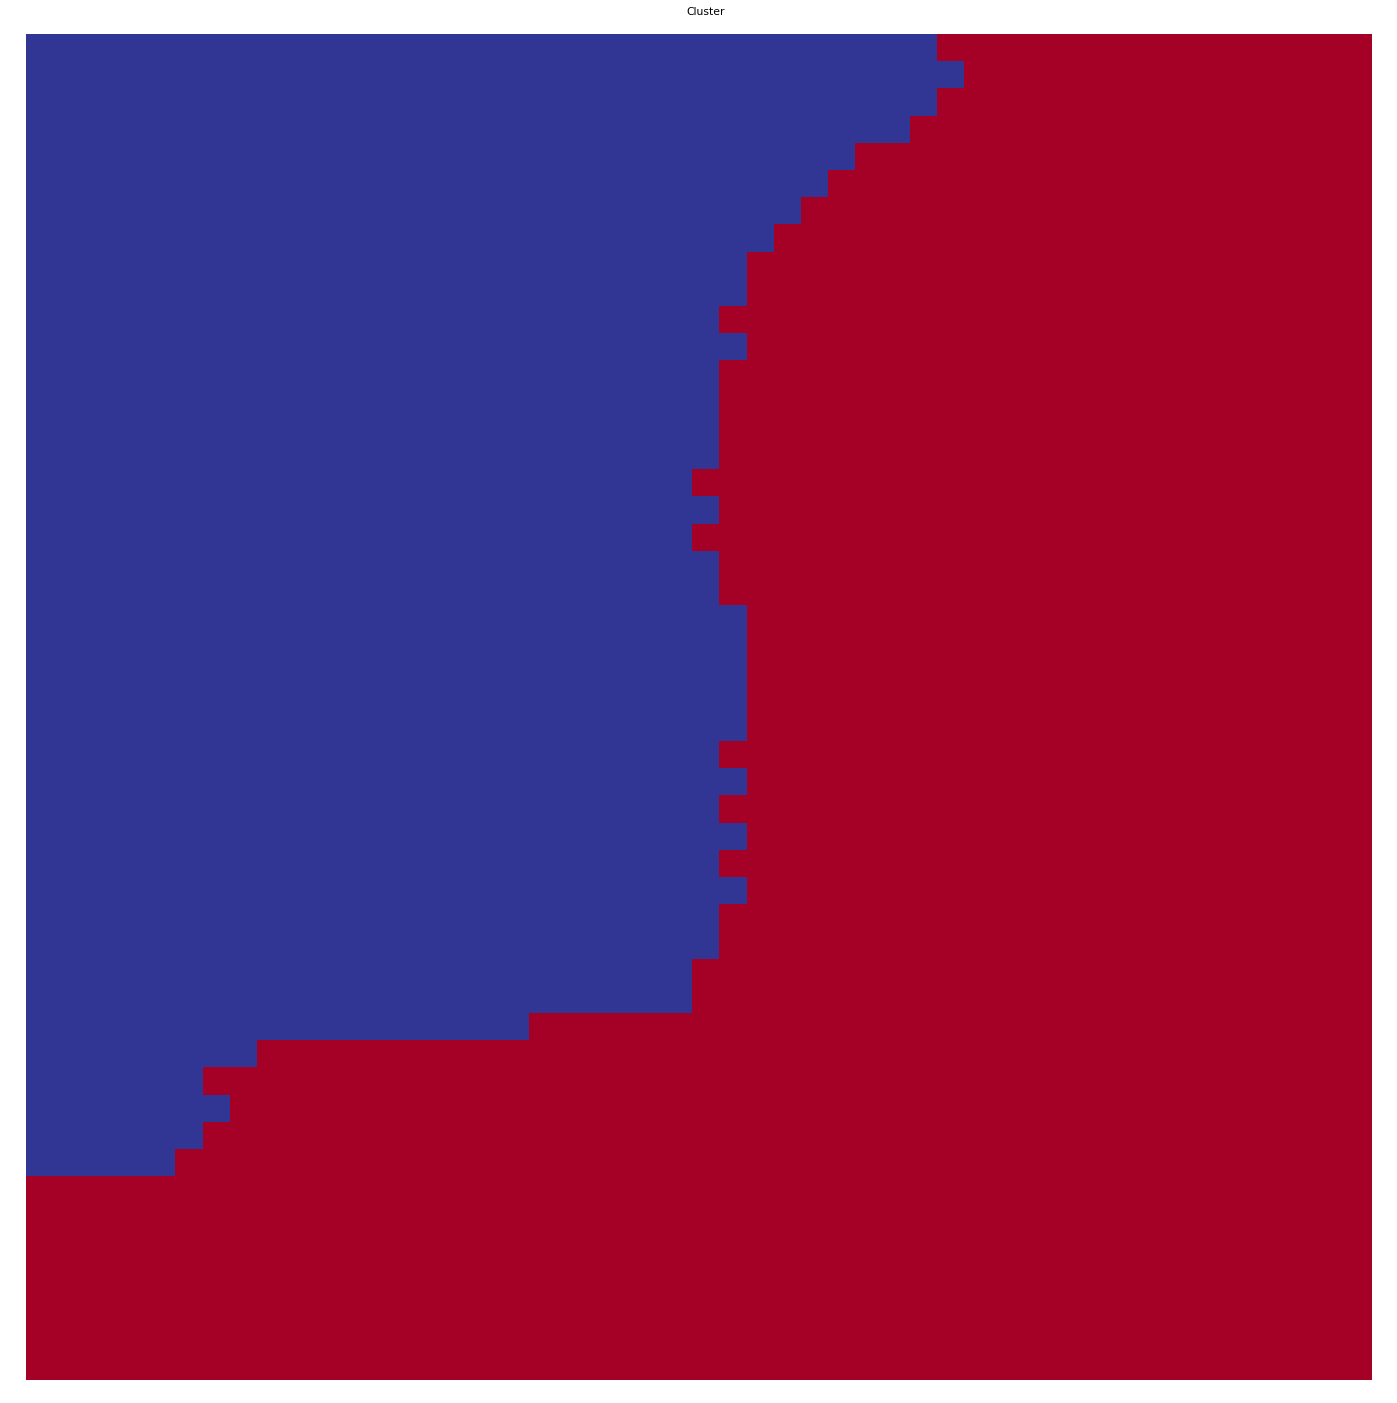

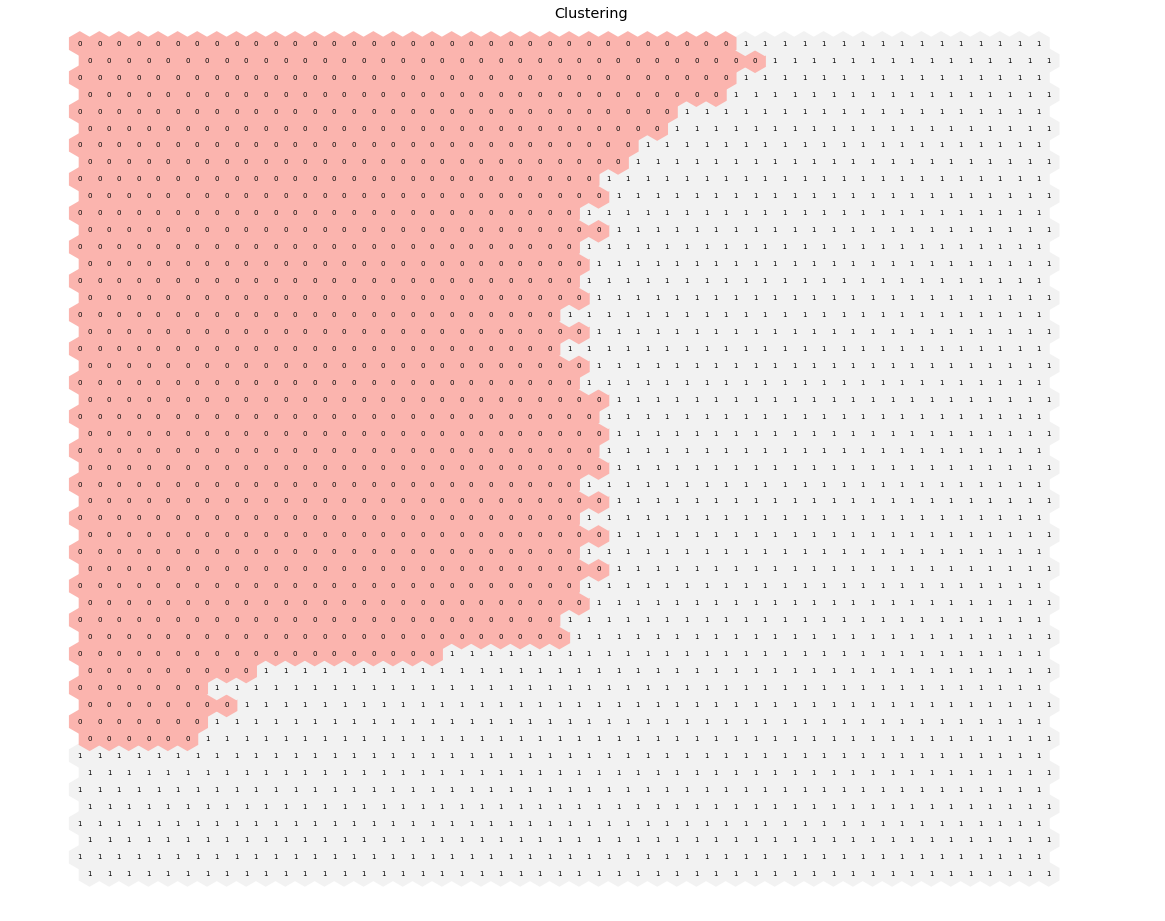

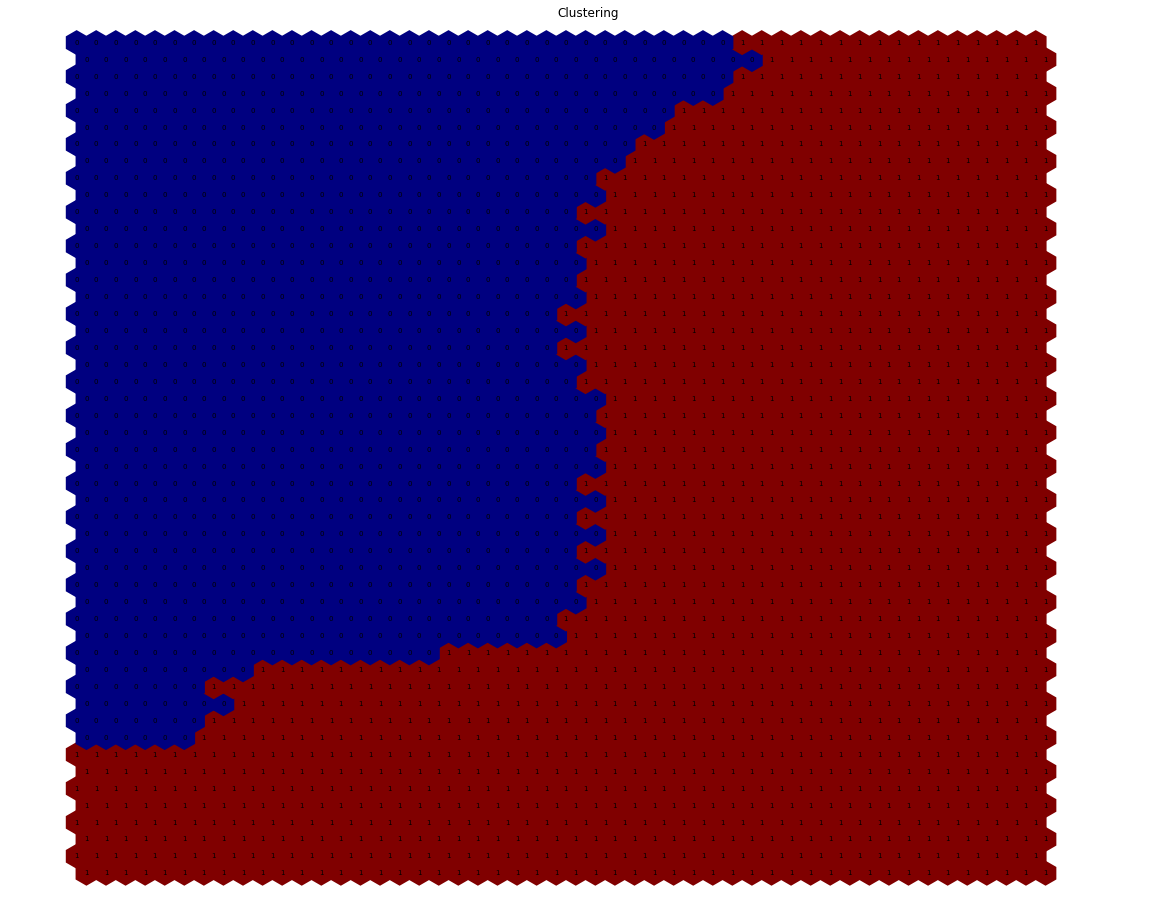

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[24  1]
 [25  0]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.24489795918367346
Recal:  0.48
F1-Score:  0.3243243243243243
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[25  0]
 [24  1]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.7551020408163265
Recal:  0.52
F1-Score:  0.3762993762993764
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [5 0]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


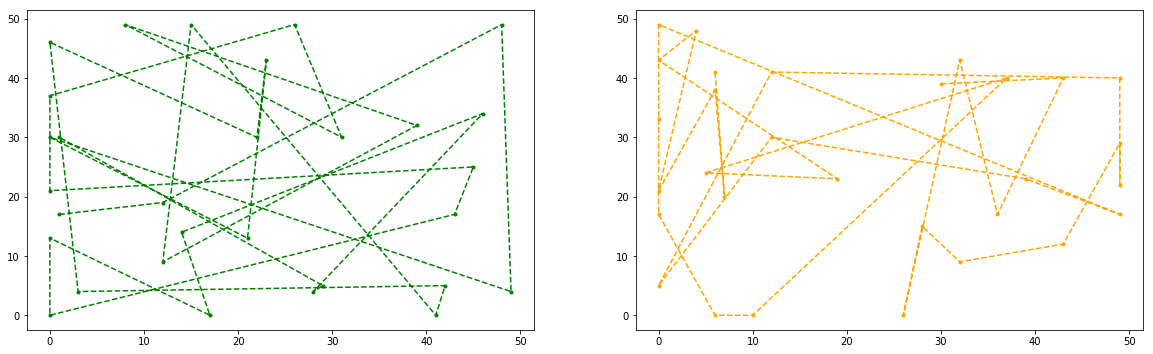

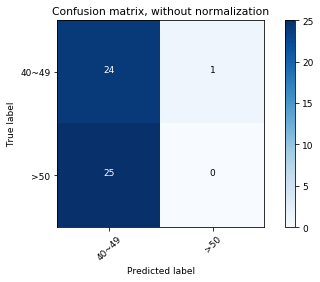

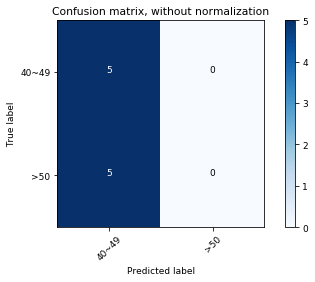

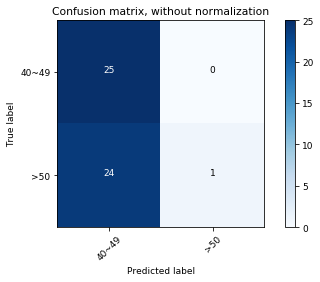

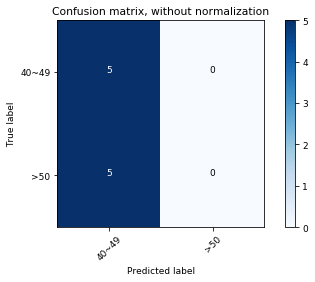

In [40]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] RssL RssR] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [41]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'RssL', 'RssR']

The fuzzy partition coefficient (FPC) 0.9721263434474681


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


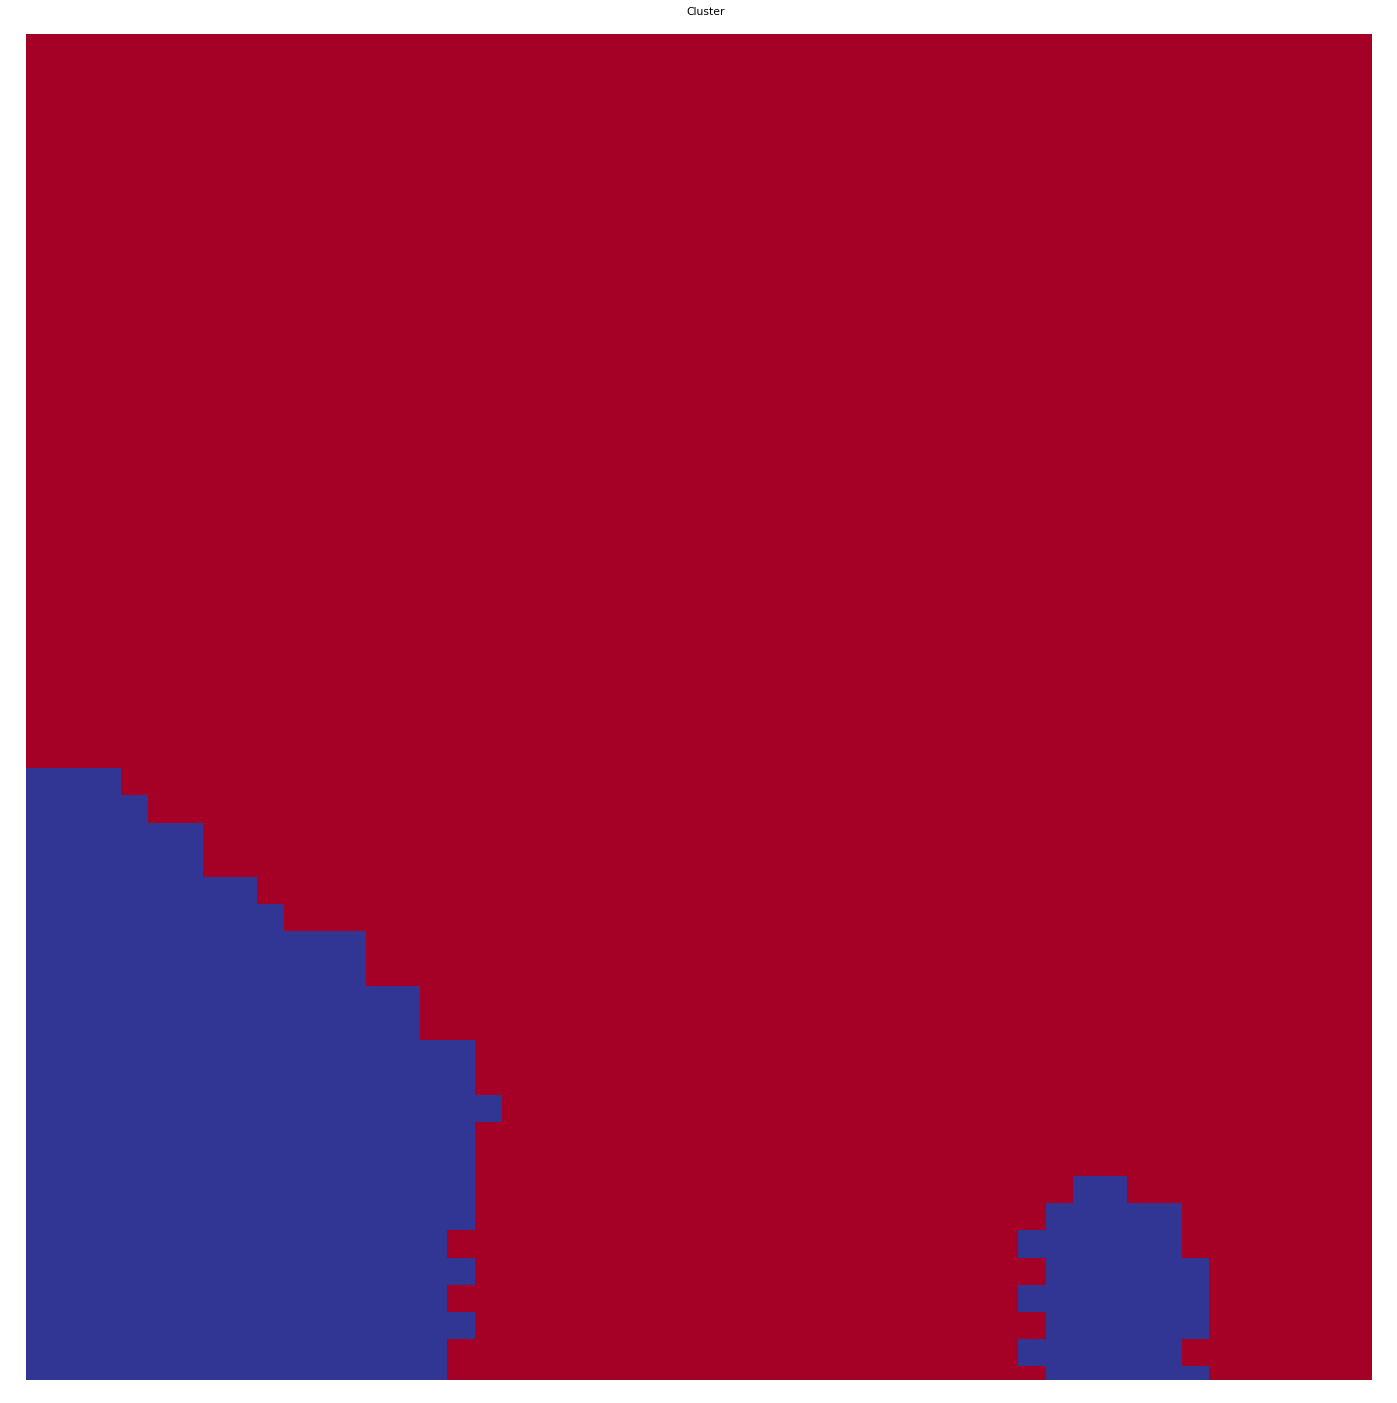

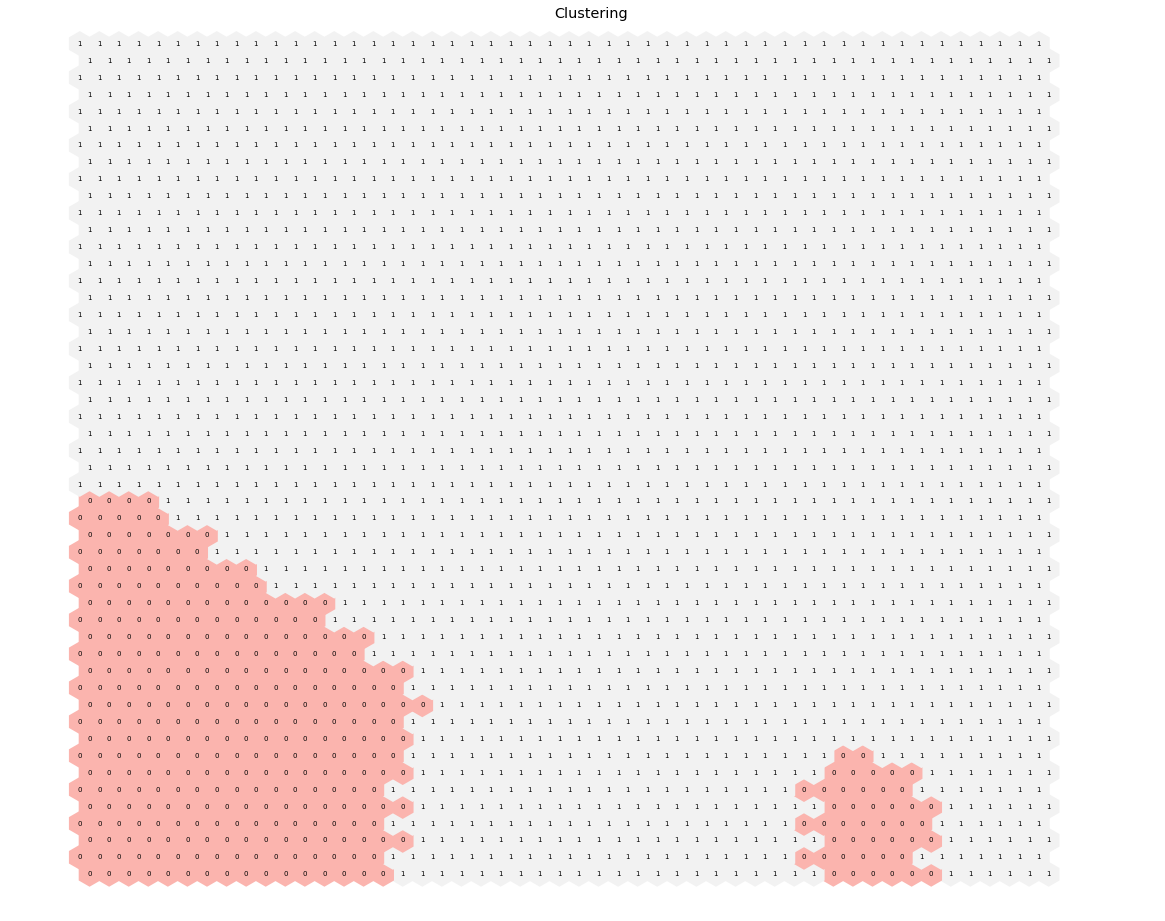

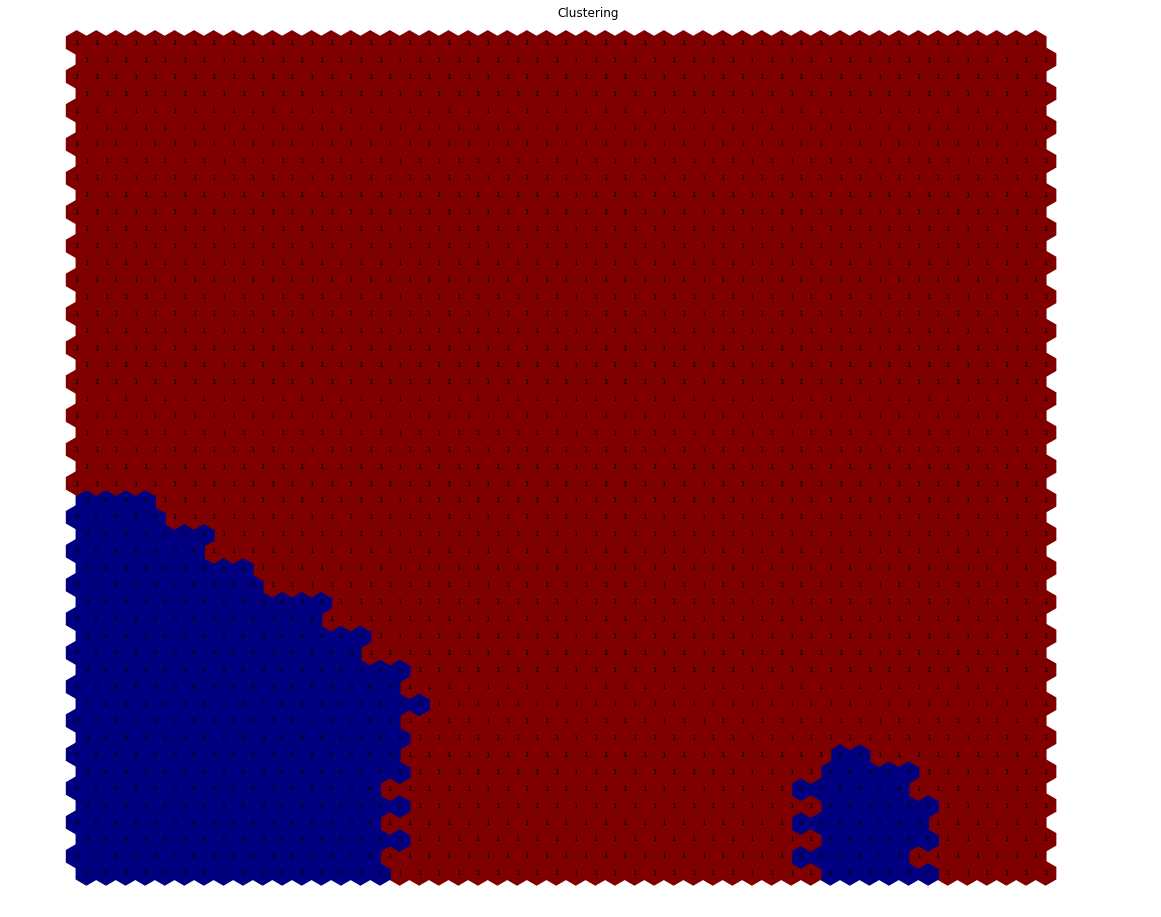

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 8 17]
 [ 4 21]]

true_positives total: 29
false_positives total: 21
false_negatives total: 21

Precision:  0.6096491228070176
Recal:  0.58
F1-Score:  0.5495495495495496
Accuracy:  0.58
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [2 3]]

true_positives total: 4
false_positives total: 6
false_negatives total: 6

Precision:  0.38095238095238093
Recal:  0.4
F1-Score:  0.375
Accuracy:  0.4
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 4 21]
 [ 8 17]]

true_positives total: 21
false_positives total: 29
false_negatives total: 29

Precision:  0.39035087719298245
Recal:  0.42
F1-Score:  0.37794937794937794
Accuracy:  0.42
-------------------TEST DATASET EVALUATION----------------------
Confusion

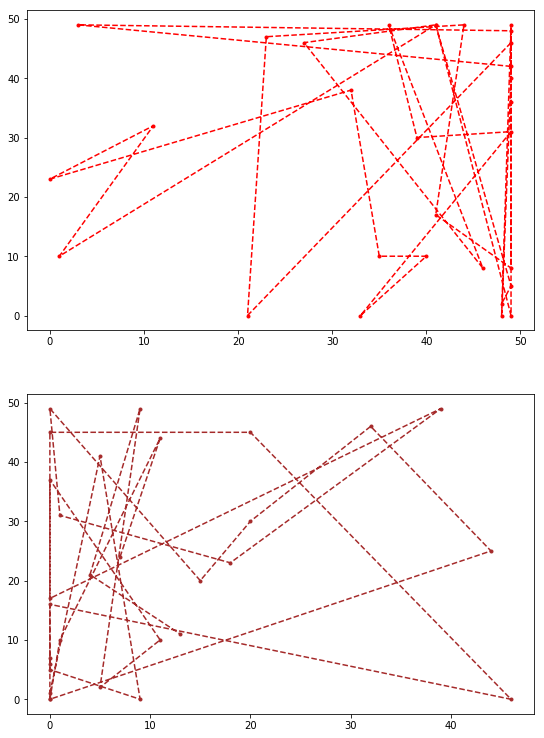

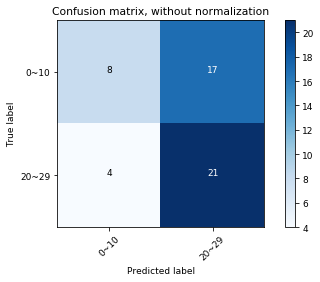

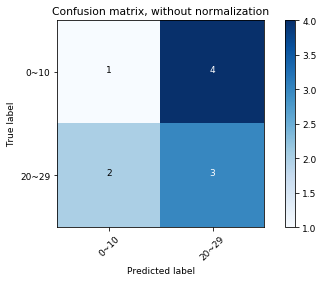

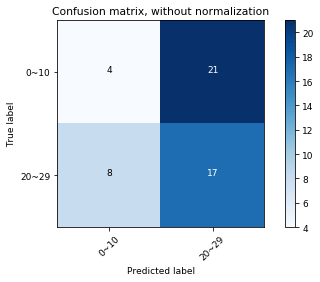

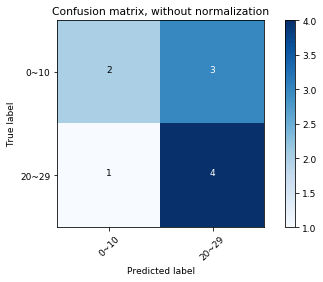

In [42]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] RssL RssR] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [43]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'RssL', 'RssR']

The fuzzy partition coefficient (FPC) 0.9679098521367643


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


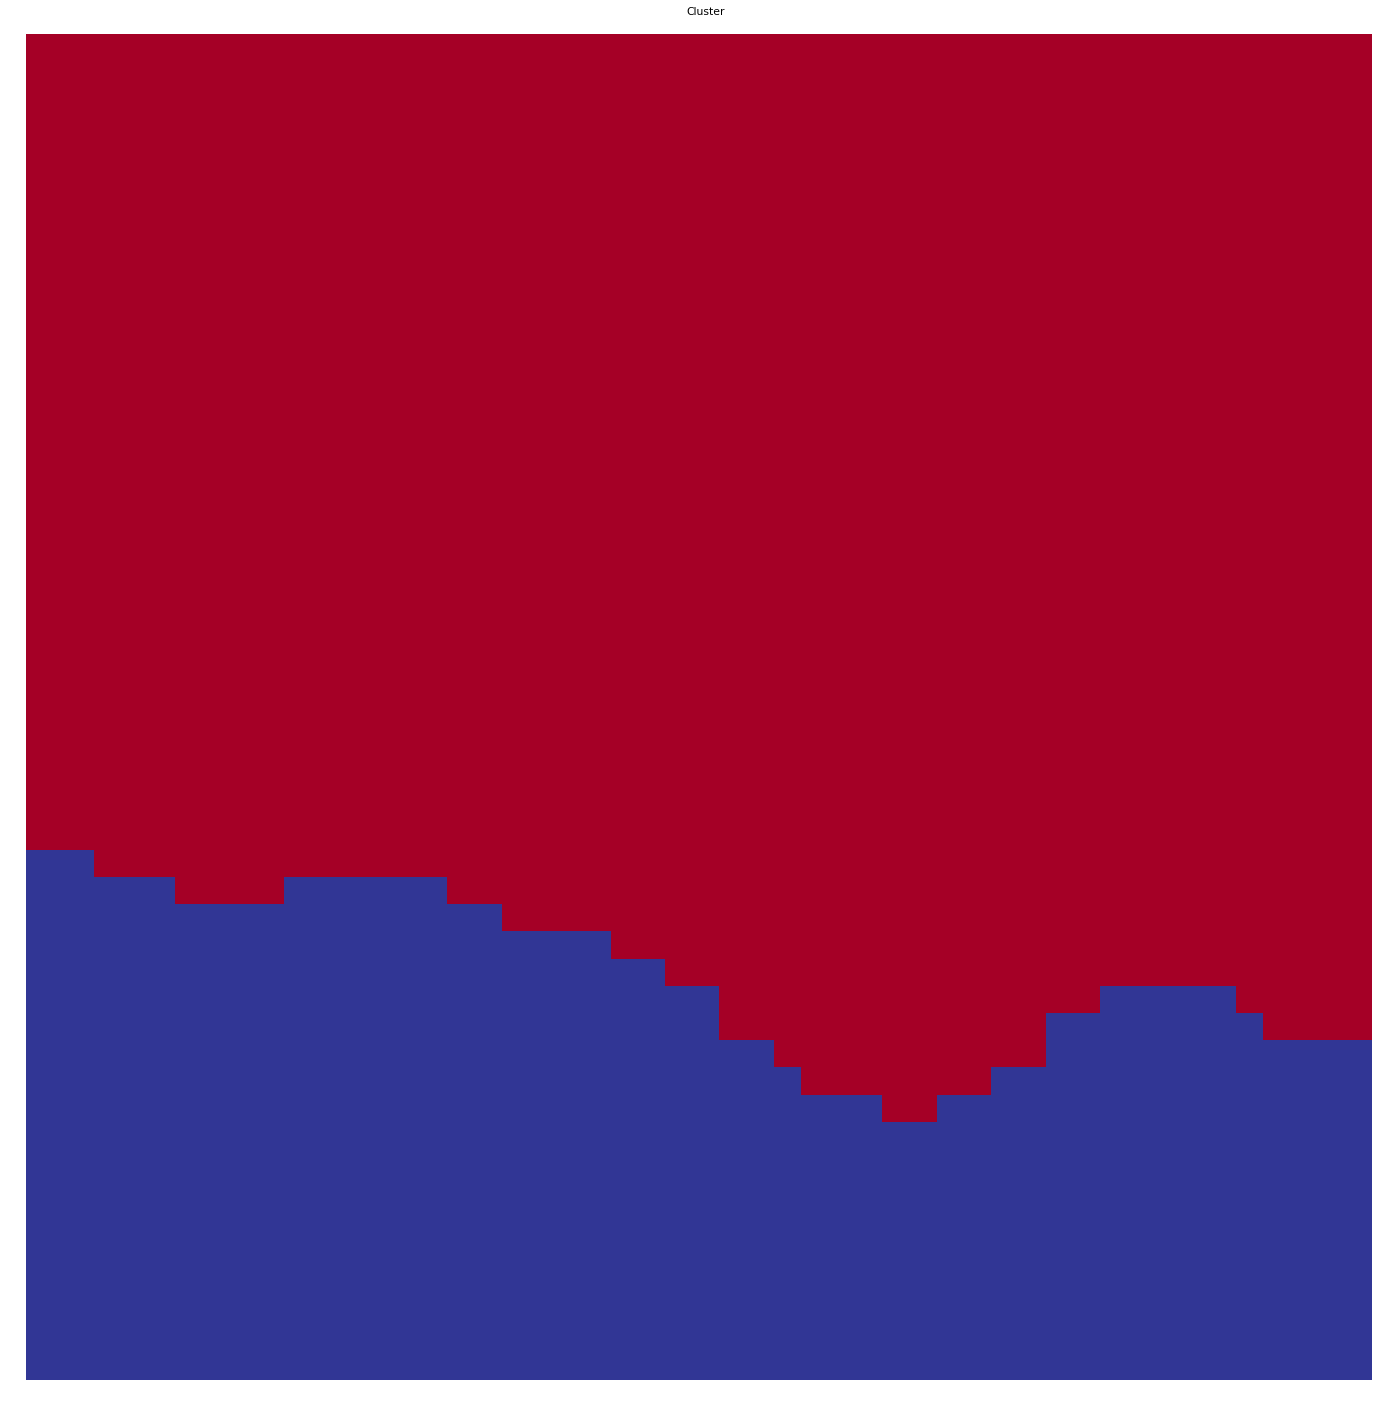

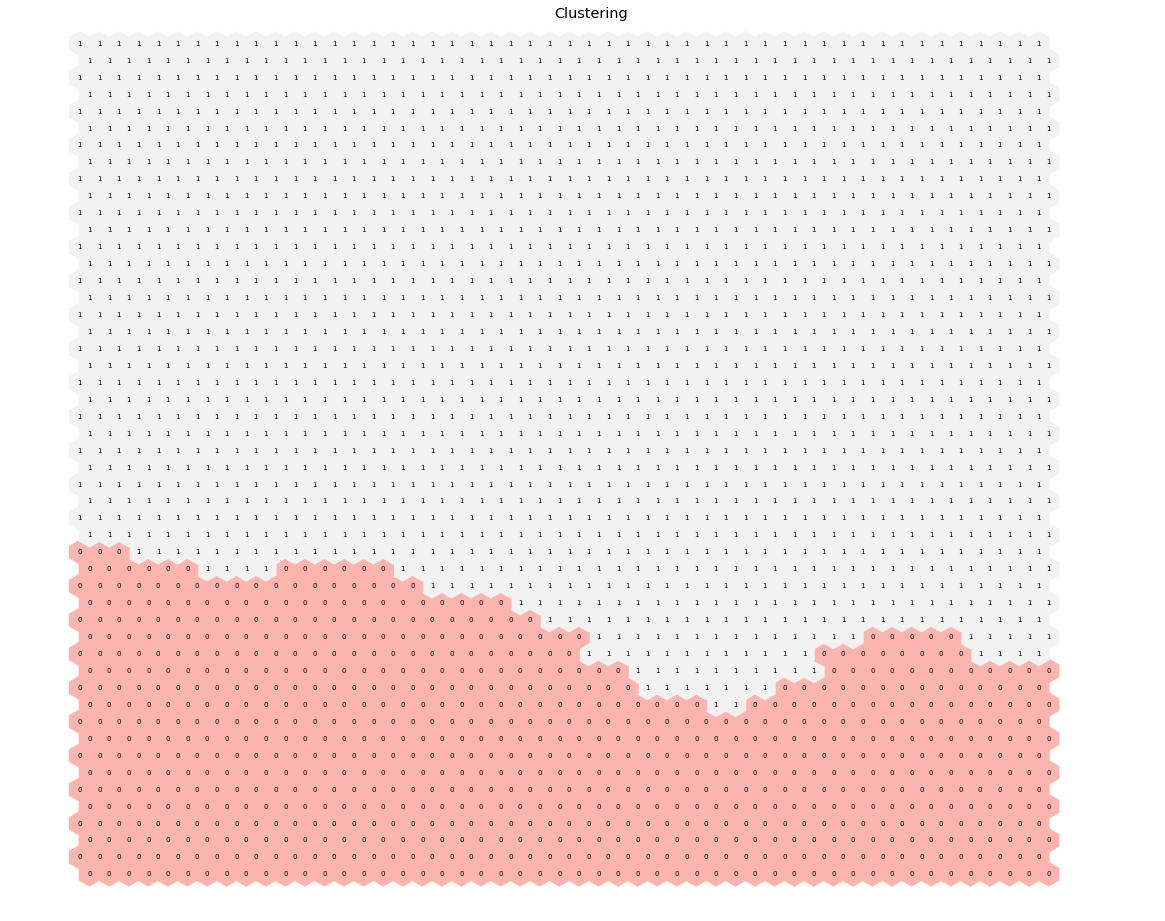

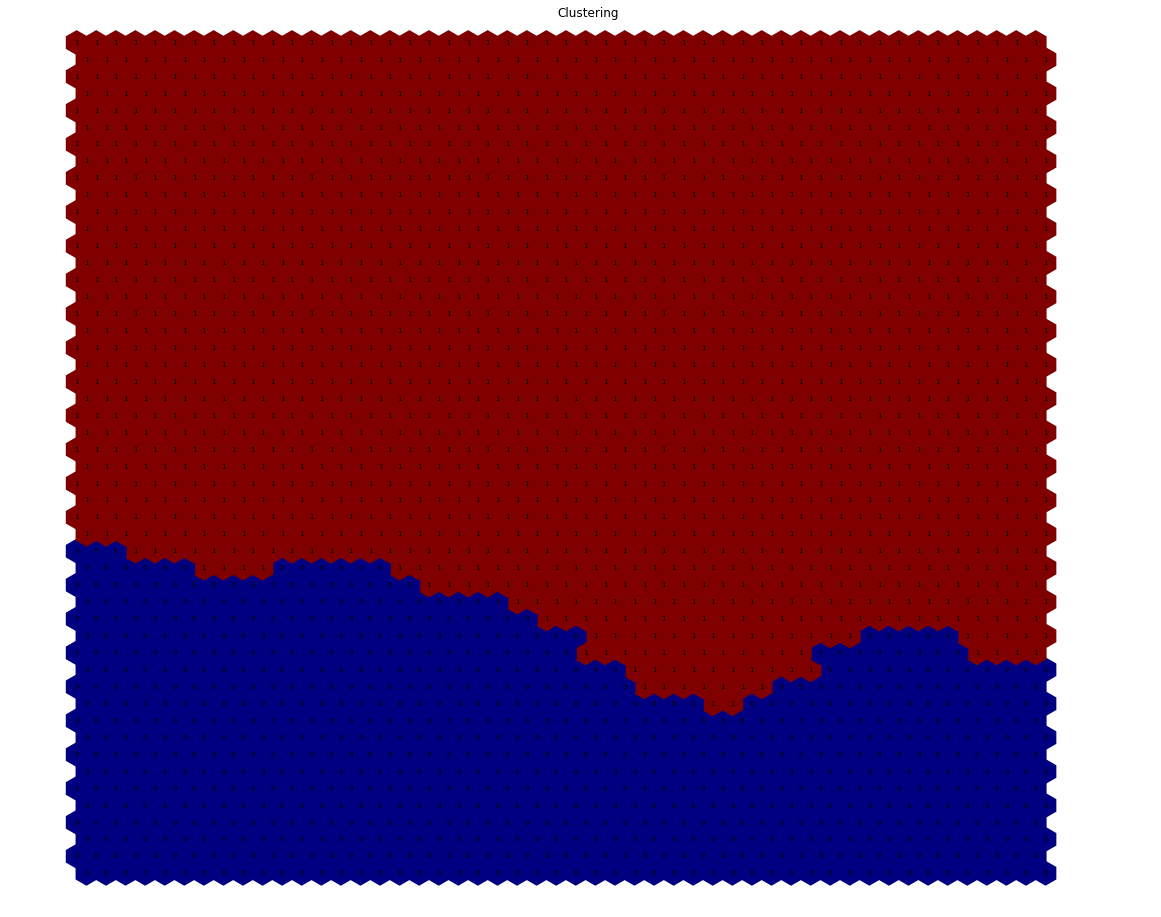

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 9 16]
 [ 8 17]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5222816399286987
Recal:  0.52
F1-Score:  0.5073891625615763
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [3 2]]

true_positives total: 4
false_positives total: 6
false_negatives total: 6

Precision:  0.4
Recal:  0.4
F1-Score:  0.4000000000000001
Accuracy:  0.4
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 8 17]
 [ 9 16]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.47771836007130125
Recal:  0.48
F1-Score:  0.46633825944170765
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion ma

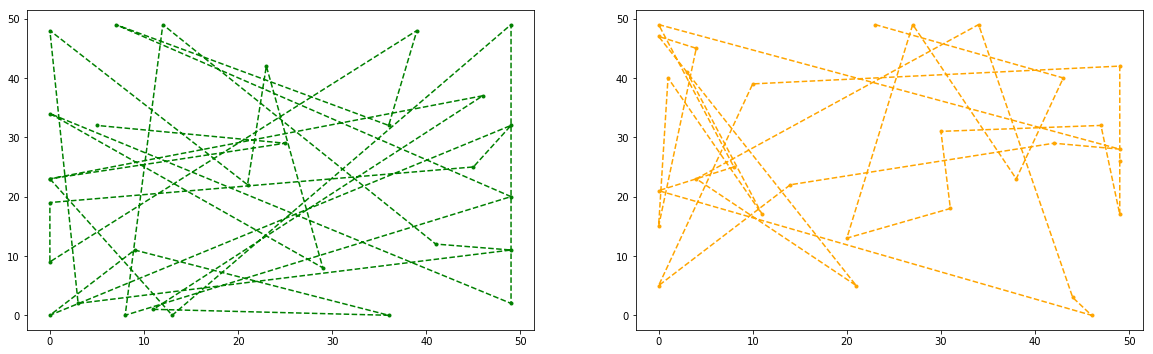

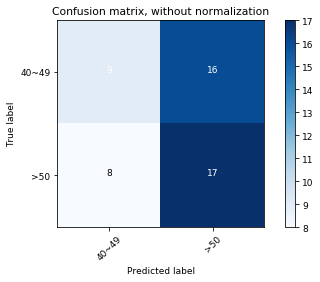

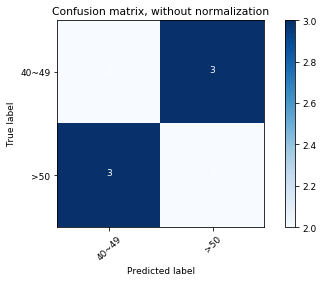

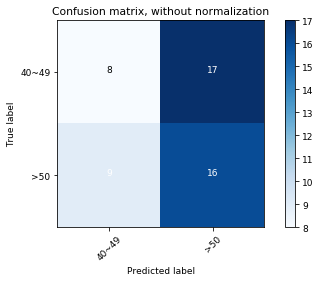

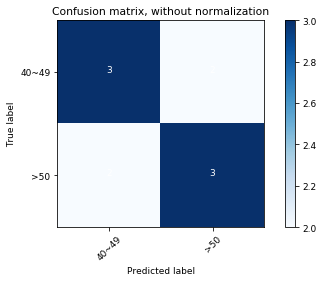

In [44]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [RssL Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [45]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssL', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9574761914302491


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


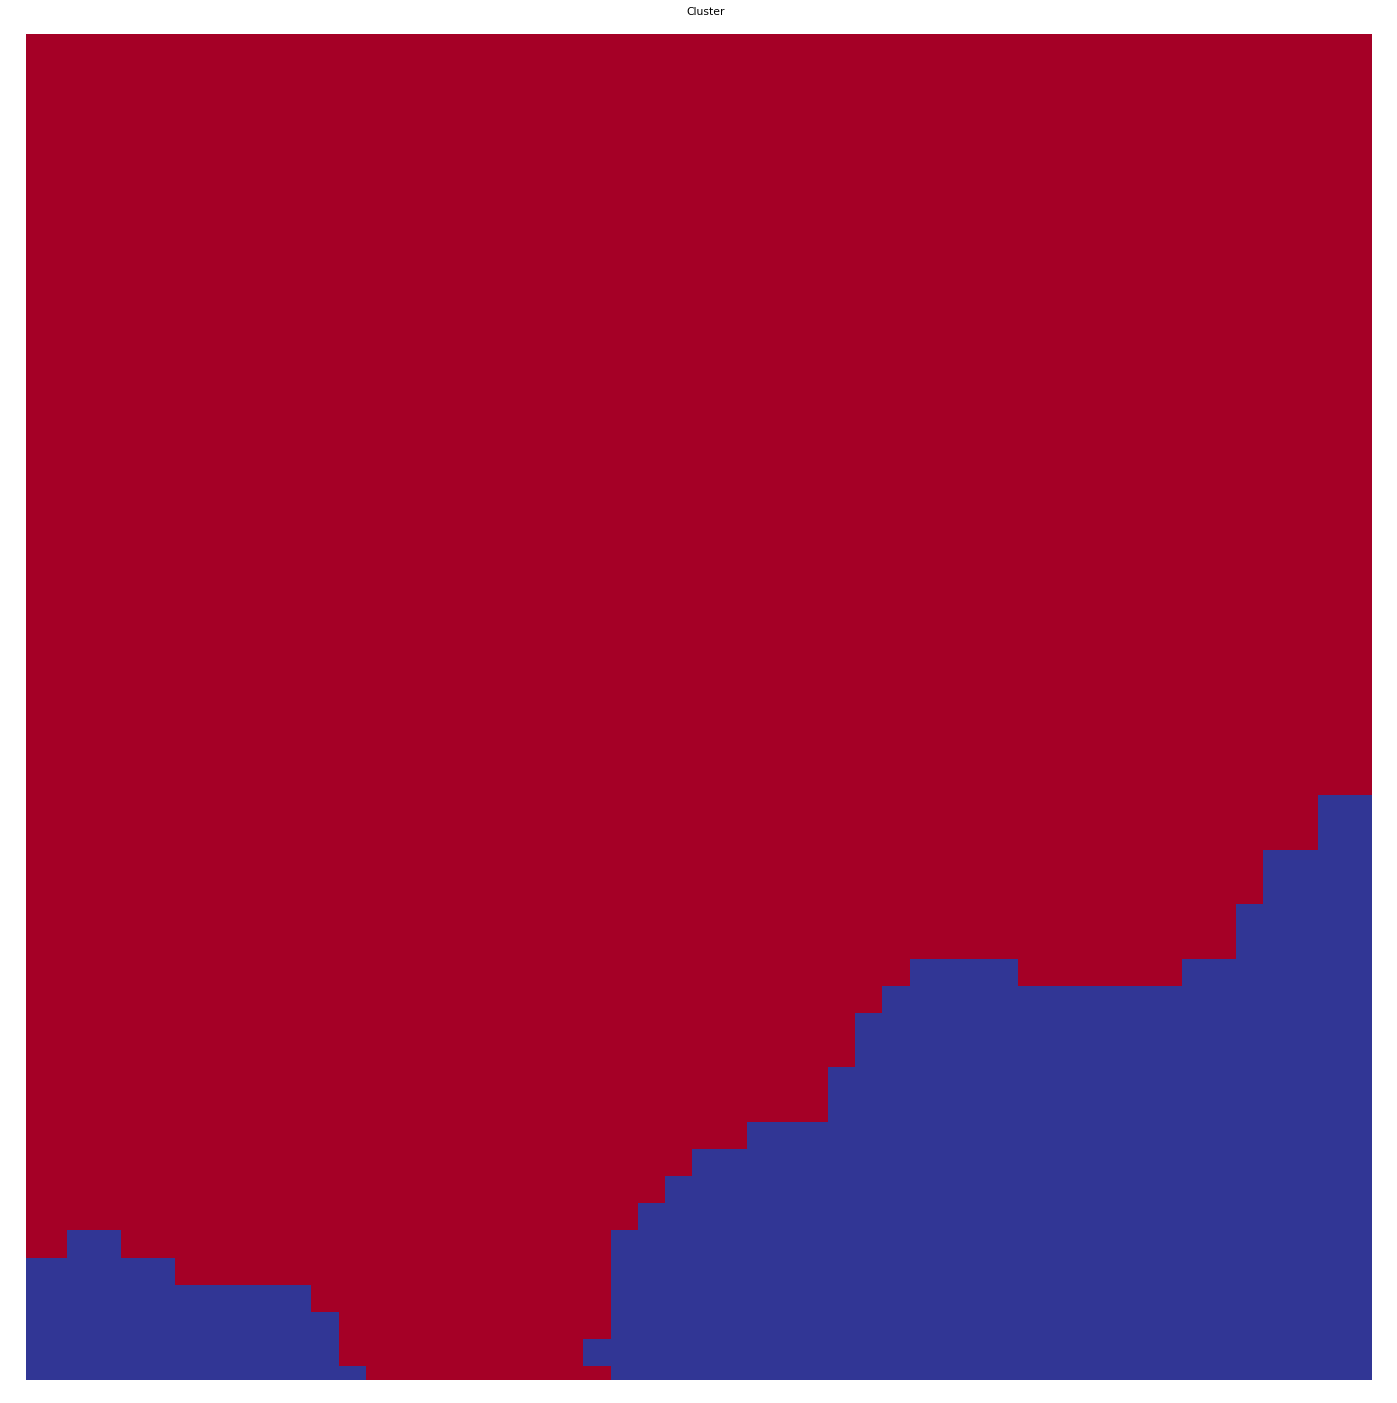

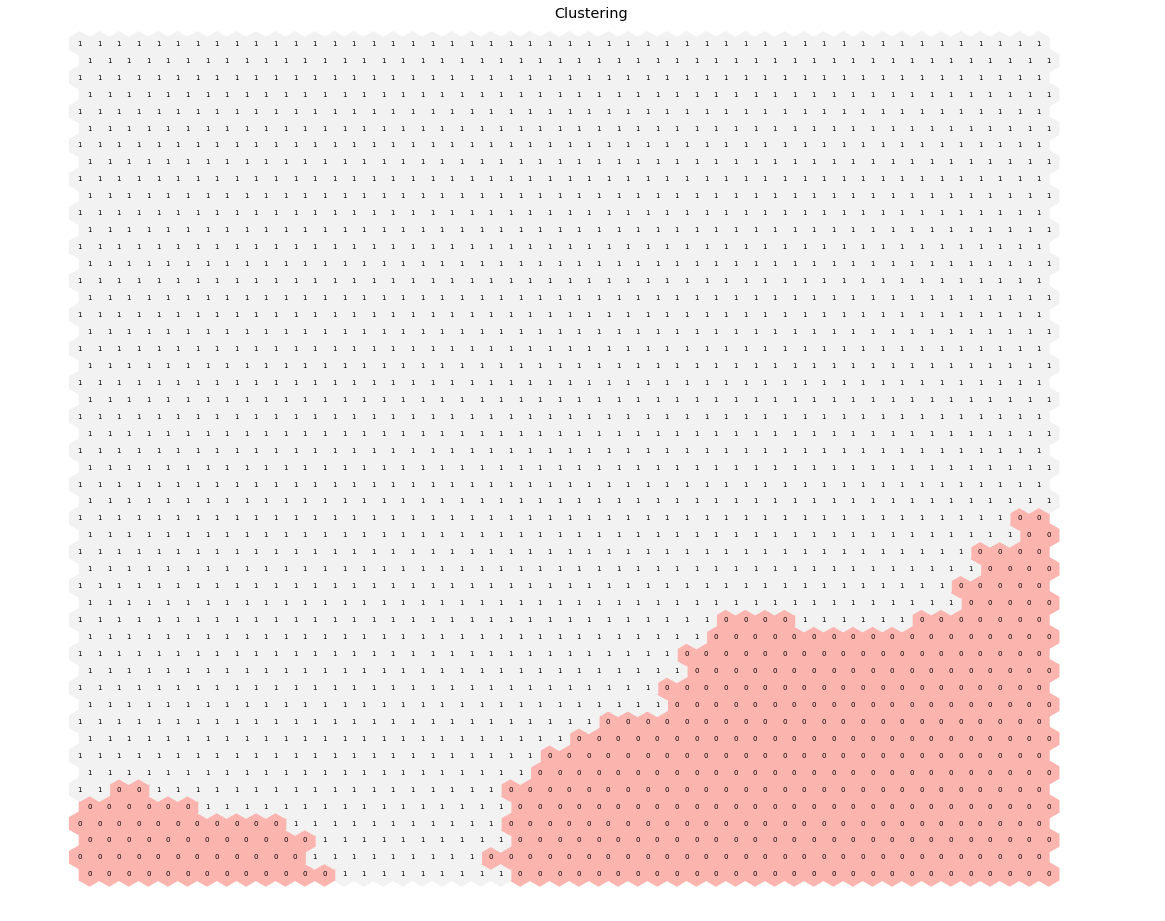

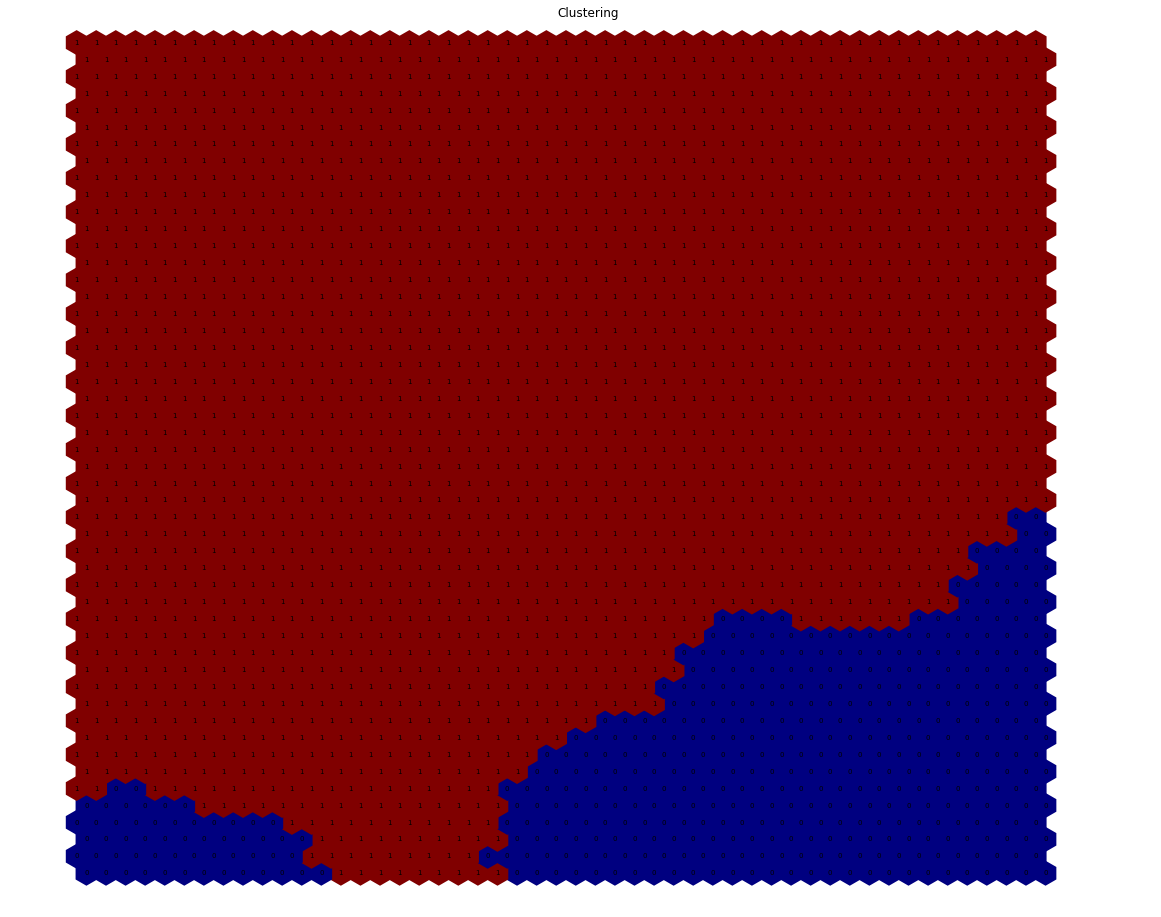

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 3 22]
 [ 0 25]]

true_positives total: 28
false_positives total: 22
false_negatives total: 22

Precision:  0.7659574468085106
Recal:  0.56
F1-Score:  0.45436507936507936
Accuracy:  0.56
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5
-------------------------------------------------------------------------------------------------


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 0 25]
 [ 3 22]]

true_positives total: 22
false_positives total: 28
false_negatives total: 28

Precision:  0.23404255319148937
Recal:  0.44
F1-Score:  0.3055555555555556
Accuracy:  0.44
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [0 5]]

true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.25
Recal:  0.5
F1-Score:  0.3333333333333333
Accuracy:  0.5


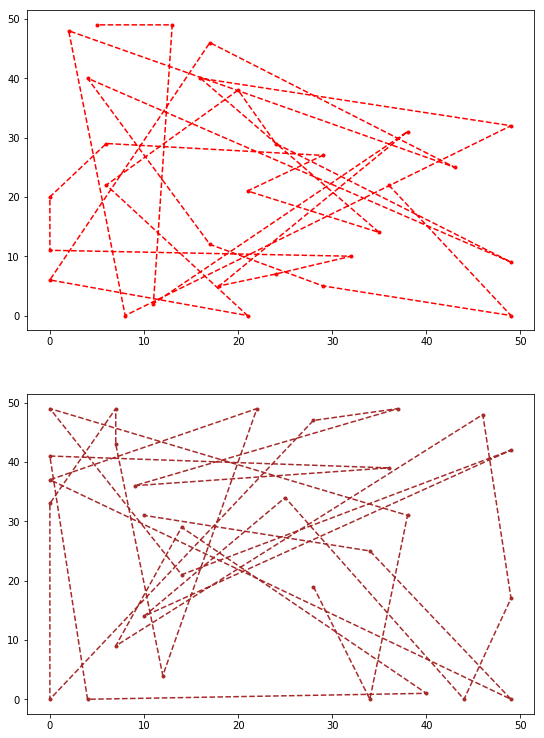

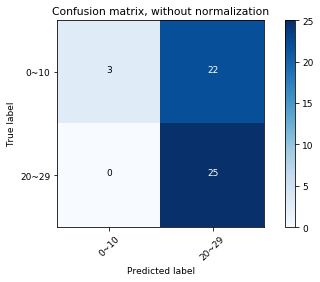

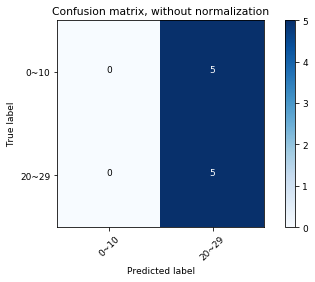

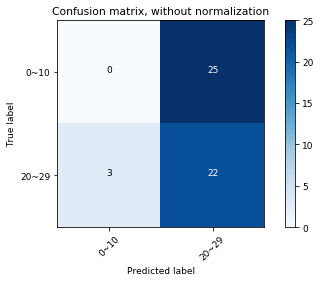

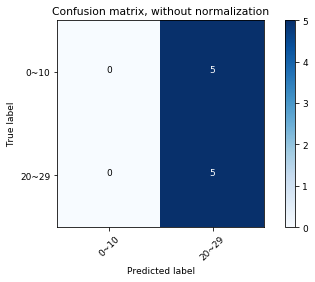

In [46]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [RssL Rst Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [47]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssL', 'Rst', 'Rsw']

The fuzzy partition coefficient (FPC) 0.9614800714129389


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


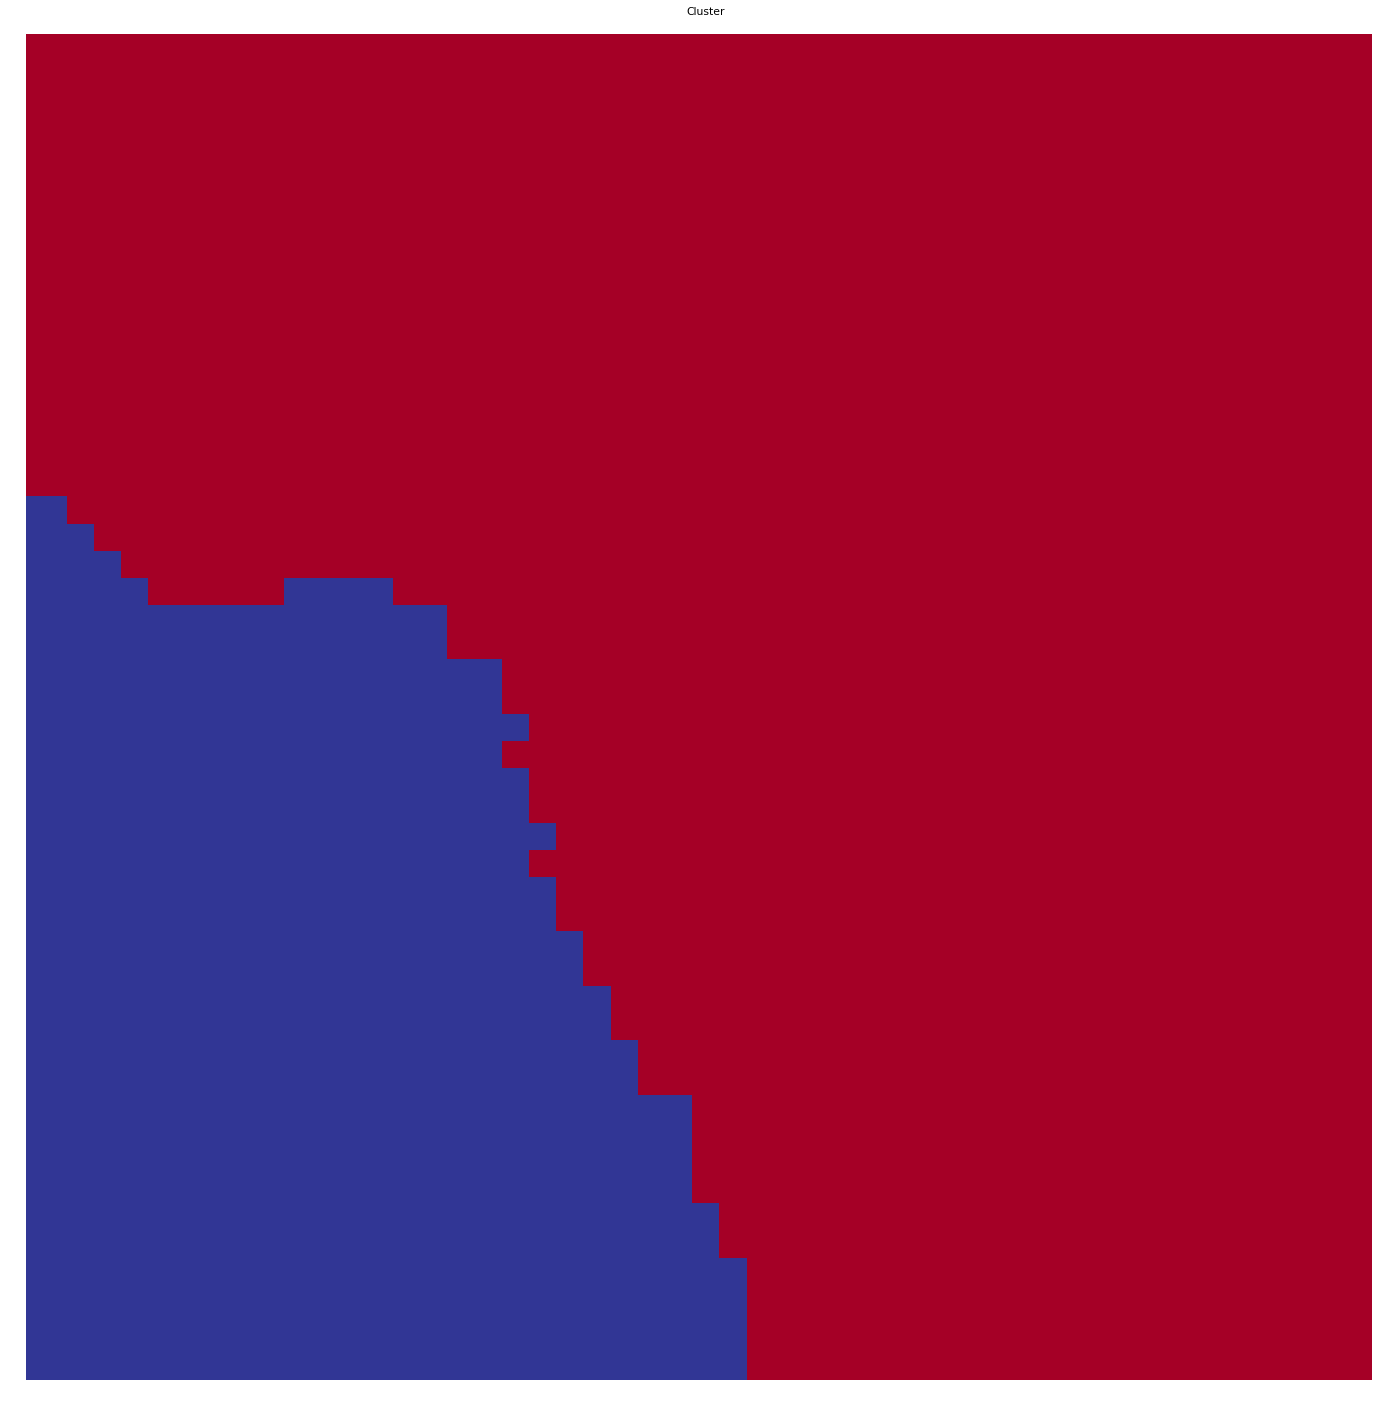

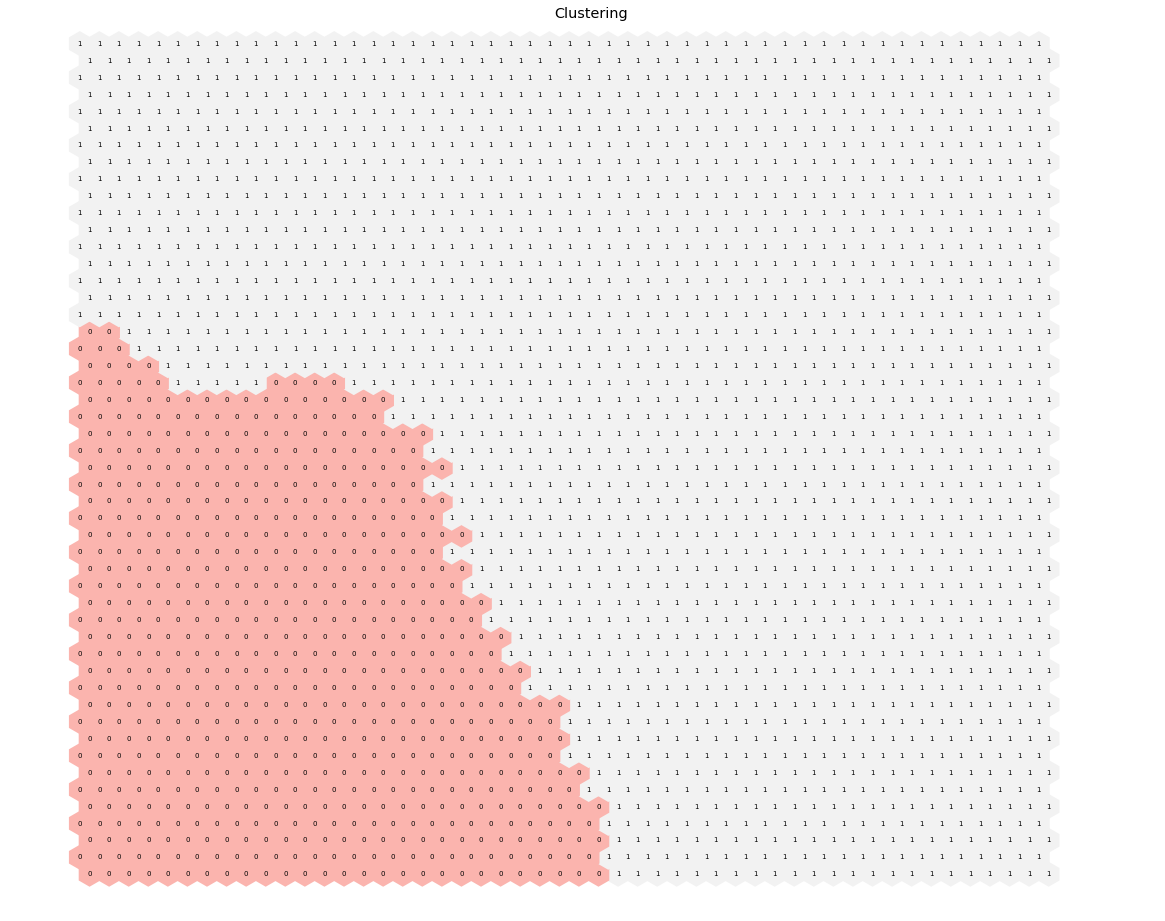

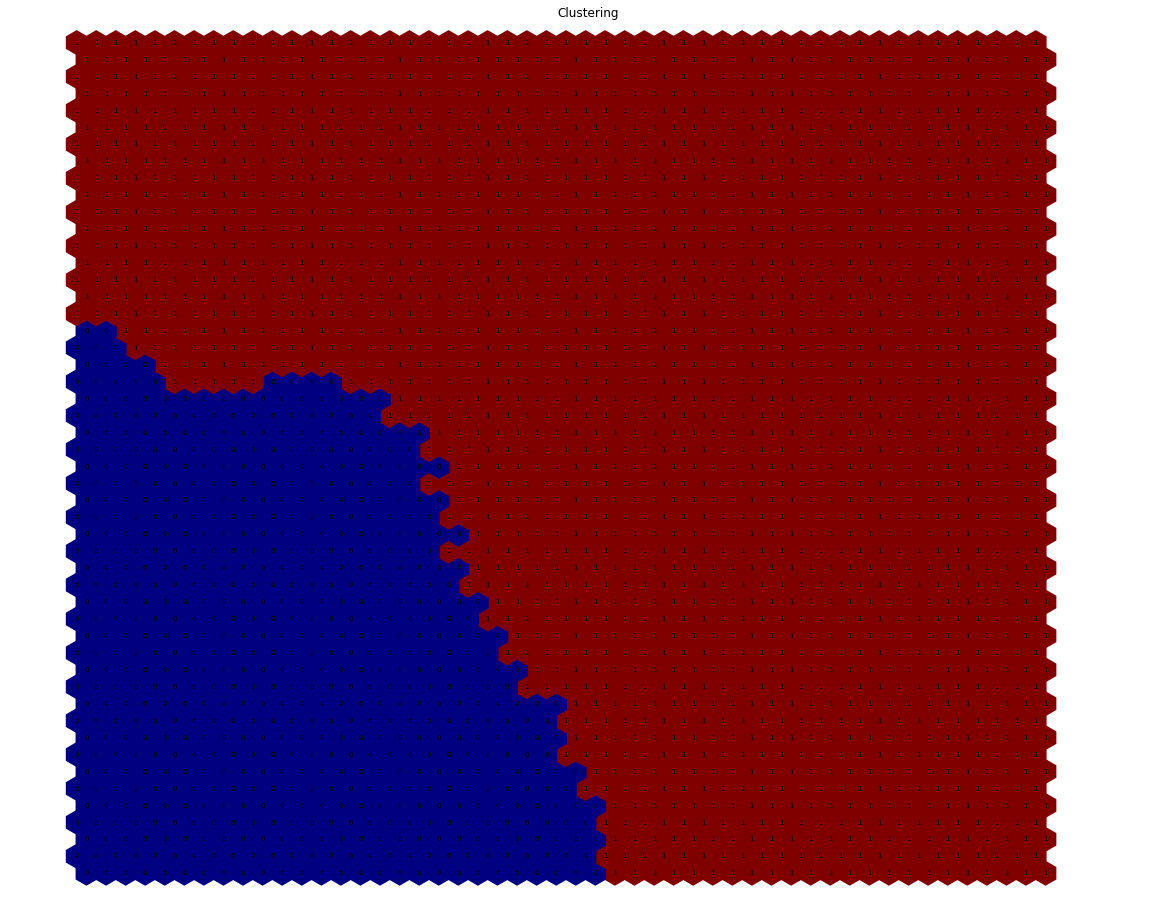

-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 3 22]
 [ 2 23]]

true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5555555555555556
Recal:  0.52
F1-Score:  0.42857142857142855
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [2 3]]

true_positives total: 3
false_positives total: 7
false_negatives total: 7

Precision:  0.1875
Recal:  0.3
F1-Score:  0.23076923076923075
Accuracy:  0.3
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 2 23]
 [ 3 22]]

true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.4444444444444444
Recal:  0.48
F1-Score:  0.38095238095238093
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusio

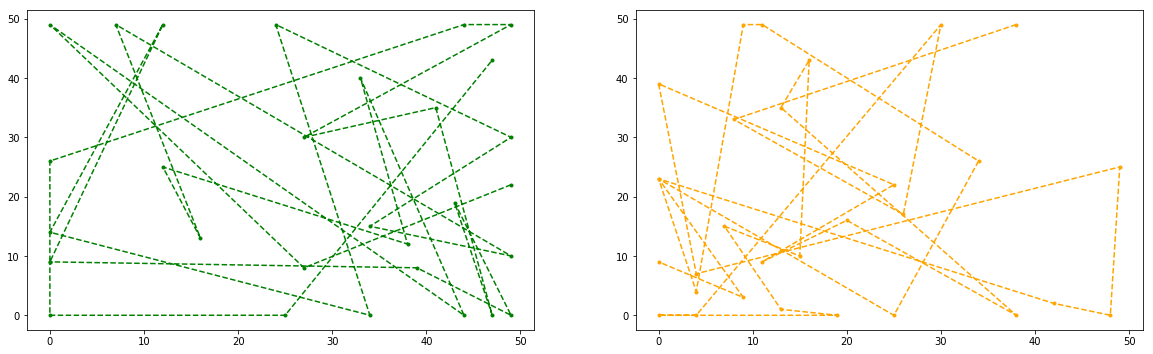

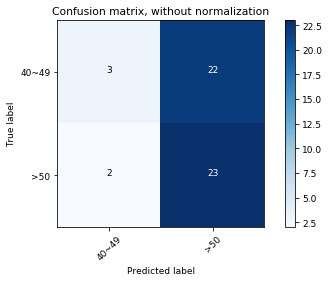

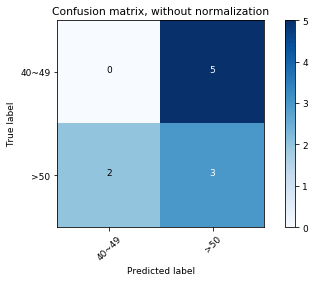

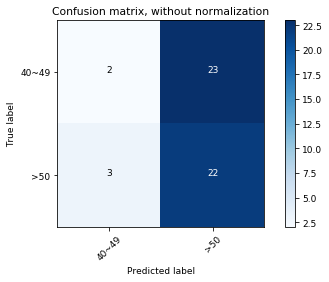

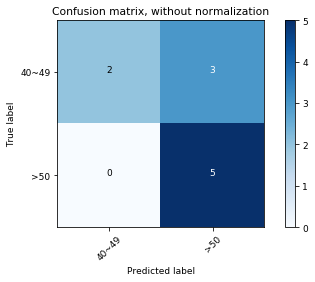

In [48]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Cadence RssL Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [29]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rsw', 'RssL', 'Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

> <ipython-input-26-993fc6c39e46>(6)generate_experiment()
      5     import ipdb; ipdb.set_trace();
----> 6     drop = set(all_features) - set(combinations_to_be_analysed)
      7     drop = list(drop)

ipdb> c

Program interrupted. (Use 'cont' to resume).
> /usr/lib/python3.6/threading.py(296)wait()
    295                 waiter.acquire()
--> 296                 gotit = True
    297             else:

ipdb> c


## [Cadence RssL Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rsw', 'RssL','Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Rs RssR Rsw] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rs', 'Rsw']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Rs RssR Rsw] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rs', 'Rsw']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] RssR Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rst', 'ACT[s]']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] RssR Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssR', 'Rst', 'ACT[s]']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] Rs Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Rst', 'Rs']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Rs Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Rst', 'Rs']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] Rs RssL] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Rs', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Rs RssL] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Rs', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Cadence RssL Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssL', 'Rst', 'Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Cadence RssL Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['RssL', 'Rst', 'Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Cadence Rs Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'Rst', 'Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Cadence Rs Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'Rst', 'Cadence']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [Rs RssL Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'Rst', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [Rs RssL Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['Rs', 'Rst', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] Cadence RssL] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Cadence RssL] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'RssL']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)

## [ACT[s] Cadence Rst] Only 2 features as input & Only 2 groups to classify
- Group 1: 0~10
- Group 2: 20~29

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rst']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=0
)

## [ACT[s] Cadence Rst] Only 2 features as input & Only 2 groups to classify
- Group 5: 40~49
- Group 6: >50

In [ ]:
full_complet_data = data_c.drop('Age', axis=1)
combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rst']

In [ ]:
generate_experiment(
    full_complet_data, combinations_to_be_analysed, complet_train_data, 
    test_dataframe, groups_to_classify=1
)